###### Effective Field Theory

In [1]:
using Revise
using Scattering
includet("./plottinghelp.jl")
using ProgressBars
#using LeastSquaresOptim
#pygui(true)
#%matplotlib inline
updaterc()

0.1

# Dev Tests

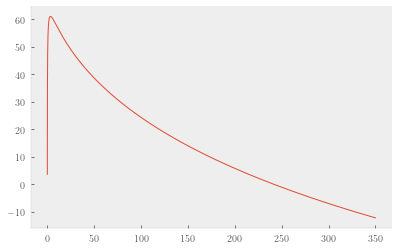

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5e4dbb63d0>

In [2]:
E, reid = reidphase(1e-3, 350)
fig, ax = newfig()
ax.plot(E, reid)
#ax.set_xscale("log")

m = ((2 * (mₙ * mₚ)) / (mₙ + mₙ)) / 197 = 4.767878172588833
k = 

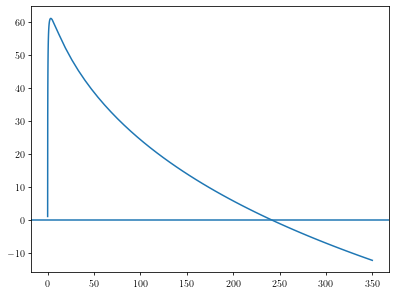

[0.001, 0.03513997322082695, 0.049695426710320845, 0.06086421899508204, 0.0702799464416539, 0.0785753688492913, 0.08607500396609118, 0.09297163021977752, 0.09939085342064169, 0.10541991966248085, 0.11112235229513616, 0.11654610631661955, 0.12172843799016408, 0.12669897526612303, 0.13148174037274565, 0.13609653107043737, 0.1405598928833078, 0.14488582127084554, 0.14908628013096253, 0.15317159214831014, 0.1571507376985826, 0.16103158720316066, 0.16482108419474, 0.16852539130080668, 0.17215000793218235, 0.17569986610413474, 0.1791794091601245, 0.18259265698524613, 0.18594326043955503, 0.1892345471124462, 0.19246956003174387, 0.1956510906097216, 0.19878170684128338, 0.20186377756470913, 0.204899493436794, 0.20789088515039622, 0.2108398393249617, 0.21374811242332903, 0.2166173429864205, 0.21944906242783763, 0.22224470459027232, 0.2250056142330183, 0.22773305459317555, 0.2304282141411913, 0.2330922126332391, 0.23572610654787388, 0.23833089398183363, 0.24090751906933178, 0.24345687598032817, 

PyObject <matplotlib.lines.Line2D object at 0x7f50b57b0b20>

In [21]:
# Use the Reid potential with VPA
V = Reid()
method = KMatrix(30)
# Mass of n+p in MeV in lab frame in units [fm⁻¹]
@show m = 2(mₙ*mₚ)/(mₙ+mₙ) /197
# Want more points near the peak
Mpeaks = 50
Mrest = 50
Mtot = Mpeaks + Mrest
# Compute for energies 0 - 350 MeV
E = [range(0, 5, length=Mpeaks)..., range(5, 2*175, length=Mrest)...] |> vec
k = .√(m/(2*197)*E) |> vec
k[1] += 0.001
@show k

δ = phaseshift(k, m, V, method)
fig, ax = plt.subplots()
ax.plot(E, δ)
ax.axhline(0)

# Pionless Interactions

## Comparisons by region

### Low energy

Fit LO, NLO and NNLO and low energies: 1e-3 to 1e-2 MeV

In [2]:

p = Params(1e-2)
fp = FitParams(p, LO, -1, 1)
fp = FitParams(p, LO, [-1], [1], [0.0], method=:LsqFit)
resLO = fit(fp)
fp = FitParams(p, NLO, [-1, -1], [1, 1], [-0.537, 0.03];
                method=:LBFGS,
                time_limit=60*4, iterations=1e6 |> Int, 
                methodkws=Dict(:alphaguess => LineSearches.InitialHagerZhang(α0=1.0)),
                show_trace=true)
fp = FitParams(p, NLO, [-2, -2], [2, 2], [-0.5, 0.0];
                method=:ParticleSwarm,
                time_limit=60*10, iterations=1e6 |> Int, 
                methodkws=Dict(:n_particles=>100),
                show_trace=true)
fp = FitParams(p, NLO, [-2, -2], [2, 2], [-0.5, 0.0];
                method=:DE,
                MaxTime=60*10, TraceMode=:verbose)
fp = FitParams(p, NLO, [-2, -2], [2, 2], [-0.5, 0.0];
                method=:LsqFit)
resNLO = fit(fp)

@show confidence_interval(resLO.res, 0.05)
@show confidence_interval(resNLO.res, 0.05)

confidence_interval(resLO.res, 0.05) = [(-0.5308986920495616, -0.5308969327628409)]
confidence_interval(resNLO.res, 0.05) = [(-0.540516691820997, -0.5405053693902847), (0.04800947786842614, 0.048066460386731576)]


2-element Array{Tuple{Float64,Float64},1}:
 (-0.540516691820997, -0.5405053693902847)
 (0.04800947786842614, 0.048066460386731576)

In [3]:

fp = FitParams(p, NNLO, [-1, -1, -2, -2], [1, 1, 1, 1], [-0.5, 0.0, 0.0, 0.0];
                method=:GradientDescent,linesearch=LineSearches.BackTracking,
                g_tol=1e-12, time_limit=60*5)

fp = FitParams(p, NNLO, [-1, -1, -2, -2], [1, 1, 1, 1], [-0.5, 0.0, 0.0, 0.0];
                method=:ParticleSwarm,
                time_limit=60*4, iterations=1e6 |> Int, 
                methodkws=Dict(:n_particles=>3),
                show_trace=true)
fp = FitParams(p, NNLO, [-1, -1, -2, -2], [1, 1, 1, 1], [-0.5, 0.0, 0.0, 0.0];
                method=:DE,
                MaxTime=60*10, TraceMode=:compact)
fp = FitParams(p, NNLO,# [-1, -1, -2, -3], [1, 1, 1, 1], [-0.5, 0.4, -0.9, -3];
                C₀ = [-0.5, -0.03, -1.1, -1.8],
                method=:LsqFit)
resNNLO = fit(fp)
@show confidence_interval(resNNLO.res, 0.05)

LoadError: [91mInterruptException:[39m

In [4]:
fp = FitParams(p, NNLO,[-1, -1, -2, -3], [1, 1, 1, 1], [-0.5, 0.4, -0.9, -3];
                method=:LsqFit)
resNNLO_const = fit(fp)

FitResult(FitParams(Params(0.001, 0.01, 50, [0.7]), NNLO, [-1.0, -1.0, -2.0, -3.0], [1.0, 1.0, 1.0, 1.0], [-0.5, 0.4, -0.9, -3.0], :LsqFit, Dict{Any,Any}(), Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}()), LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([-0.5222472965968645, 0.3744601656190388, -1.1831262090677352, -1.8514116011717587], [-2.108487309193663e-7, -2.0856288207582452e-7, -2.0631829800166201e-7, -2.035896500274248e-7, -2.002196253236832e-7, -1.9603511347554559e-7, -1.916796055212444e-7, -1.865282124313694e-7, -1.8047450556224476e-7, -1.7404960761524535e-7  …  2.3770148693813553e-7, 2.151518874171643e-7, 1.8160854864390785e-7, 1.3506322815715066e-7, 7.314537597835624e-8, -6.92025814430508e-9, -1.0799592331522945e-7, -2.3365559442822814e-7, -3.8781295685907935e-7, -5.750075260380072e-7], [-50.730764305899896 -11.170035530207507 -3.1327552105605294 -0.6148620863509362; -51.92553422700401 -11.43316663701943 -3.206

In [5]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
plotphase([resLO, resNLO, resNNLO], 1e-3, 1e2; ax=ax[1])
ploterror([resLO, resNLO, resNNLO], 1e-3, 1e2; ax=ax[2], region=false)
plotphase(resNNLO_const, 1e-3, 1e2; ax=ax[1], label="NNLO Constrained")
ploterror(resNNLO_const, 1e-3, 1e2; ax=ax[2], label="NNLO Constrained")
plotfitregion(resNNLO_const, ax[2])
ax[1].legend()
ax[2].legend()
#savefig(fig, "lowenergy.pdf")

LoadError: [91mUndefVarError: resNNLO not defined[39m

In [6]:
function ci(res)
    co = res.C
    println(res.params.V)
    cis = confidence_interval(res.res, 0.05)
    for (c, (l, h)) in zip(co, cis)
        @show c
        @show h-l
    end
    println()
end
map(ci, [resLO, resNLO, resNNLO, resNNLO_const])
#@show Optim.minimum(resLO.res)
#@show Optim.minimum(resNLO.res)
#@show Optim.minimum(resNNLO.res)
@show resNNLO.C
@show resNNLO.params.minlim
@show resNNLO.params.maxlim
@show resNNLO.params.C₀

LoadError: [91mUndefVarError: resNNLO not defined[39m

### Mid energy

In [63]:
p = Params(1)
fp = FitParams(p, LO, [-1], [1], [0.0], method=:LsqFit)
resLO = fit(fp)

fp = FitParams(p, NLO, [-2, -2], [2, 2], [-0.5, 0.0];
                method=:LsqFit)
resNLO = fit(fp)
@show confidence_interval(resLO.res, 0.05)
@show confidence_interval(resNLO.res, 0.05)

confidence_interval(resLO.res, 0.05) = [(-0.5307685979025001, -0.5307042559449087)]
confidence_interval(resNLO.res, 0.05) = [(-0.5344746303626607, -0.533144871843893), (0.011633031876433352, 0.018069762143867813)]


2-element Array{Tuple{Float64,Float64},1}:
 (-0.5344746303626607, -0.533144871843893)
 (0.011633031876433352, 0.018069762143867813)

In [64]:
fp = FitParams(p, NNLO, [-1, -1, -2, -3], [1, 1, 1, 1], [-0.5, 0.4, -0.9, -3];
                method=:LsqFit)
fp = FitParams(p, NNLO, [-Inf, -Inf, -Inf, -Inf], [Inf, Inf, Inf, Inf], [-0.5, 0.4, -0.9, -3];
                method=:LsqFit)
resNNLO = fit(fp)
println(resNNLO.C)
println(confidence_interval(resNNLO.res, 0.05))

[-0.4677534171930523, 0.44263372087769637, -2.3688803215367673, -1.1323606000590434]
[(-0.6562057072948249, -0.2793011270912797), (0.13234580359949127, 0.7529216381559014), (-5.012951163641267, 0.2751905205677323), (-6.553918493342124, 4.289197293224037)]


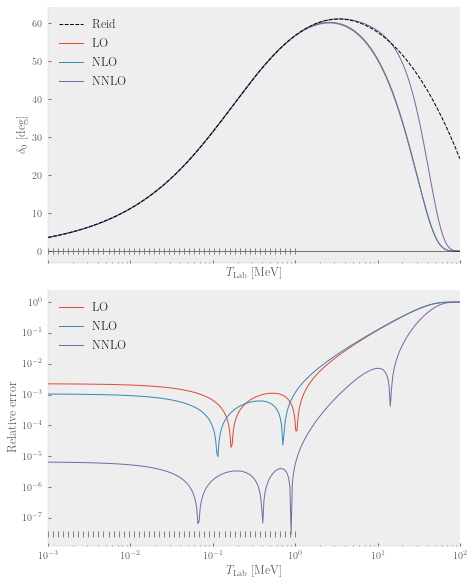

In [65]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
plotphase([resLO, resNLO, resNNLO], 1e-3, 1e2; ax=ax[1])
ploterror([resLO, resNLO, resNNLO], 1e-3, 1e2; ax=ax[2])
savefig(fig, "midenergy.pdf")

In [66]:
function ci(res)
    co = res.C
    println(res.params.V)
    cis = confidence_interval(res.res, 0.05)
    for (c, (l, h)) in zip(co, cis)
        @show c
        @show h-l
    end
    println()
end
map(ci, [resLO, resNLO, resNNLO])
#@show Optim.minimum(resLO.res)
#@show Optim.minimum(resNLO.res)
#@show Optim.minimum(resNNLO.res)
@show resNNLO.C
@show resNNLO.params.minlim
@show resNNLO.params.maxlim
@show resNNLO.params.C₀

LO
c = -0.5307364269237044
h - l = 6.434195759141836e-5

NLO
c = -0.5338097511032769
h - l = 0.0013297585187677097
c = 0.014851397010150582
h - l = 0.006436730267434462

NNLO
c = -0.4677534171930523
h - l = 0.37690458020354517
c = 0.44263372087769637
h - l = 0.6205758345564101
c = -2.3688803215367673
h - l = 5.288141684208999
c = -1.1323606000590434
h - l = 10.84311578656616

resNNLO.C = [-0.4677534171930523, 0.44263372087769637, -2.3688803215367673, -1.1323606000590434]
resNNLO.params.minlim = [-Inf, -Inf, -Inf, -Inf]
resNNLO.params.maxlim = [Inf, Inf, Inf, Inf]
resNNLO.params.C₀ = [-0.5, 0.4, -0.9, -3.0]


4-element Array{Float64,1}:
 -0.5
  0.4
 -0.9
 -3.0

### High energy

In [67]:
p = Params(1e2)
fp = FitParams(p, LO, [-1], [1], [0.0], method=:LsqFit)
resLO = fit(fp)

fp = FitParams(p, NLO, [-2, -2], [2, 2], [-0.5, 0.0];
                method=:LsqFit)
resNLO = fit(fp)
@show confidence_interval(resLO.res, 0.05)
@show confidence_interval(resNLO.res, 0.05)

confidence_interval(resLO.res, 0.05) = [(-0.5492499534703309, -0.5180913362501219)]
confidence_interval(resNLO.res, 0.05) = [(-0.4775726514148069, -0.3181245767113105), (-0.8909326446386672, -0.26211657054770443)]


2-element Array{Tuple{Float64,Float64},1}:
 (-0.4775726514148069, -0.3181245767113105)
 (-0.8909326446386672, -0.26211657054770443)

In [68]:
fp = FitParams(p, NNLO, [-1, -1, -2, -3], [1, 1, 1, 1], [-0.5, 0.4, -0.9, -3];
                method=:LsqFit)
fp = FitParams(p, NNLO, [-Inf, -Inf, -Inf, -Inf], [Inf, Inf, Inf, Inf], [-0.5, 0.4, -0.9, -3];
                method=:LsqFit)
resNNLO = fit(fp)
println(resNNLO.C)
@show confidence_interval(resNNLO.res, 0.05)

[-0.6954995375136857, 1.301504347517411, -2.988602340937581e-7, -9.590527191543789]
confidence_interval(resNNLO.res, 0.05) = [(-1.186693376999519e6, 1.186691986000444e6), (-1.632408789151243e6, 1.6324113921599379e6), (-5.122989939863317e7, 5.122989939863257e7), (-7.998648536271761e7, 7.998646618166323e7)]


4-element Array{Tuple{Float64,Float64},1}:
 (-1.186693376999519e6, 1.186691986000444e6)
 (-1.632408789151243e6, 1.6324113921599379e6)
 (-5.122989939863317e7, 5.122989939863257e7)
 (-7.998648536271761e7, 7.998646618166323e7)

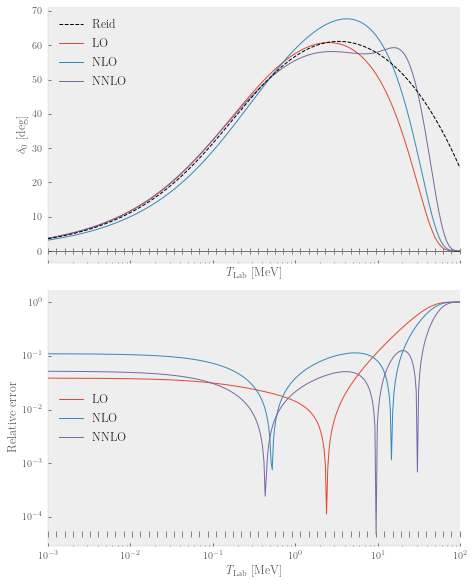

In [71]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
plotphase([resLO, resNLO, resNNLO], 1e-3, 1e2; ax=ax[1])
ploterror([resLO, resNLO, resNNLO], 1e-3, 1e2; ax=ax[2])
savefig(fig, "highenergy.pdf")
#E, d = computephase(regularize(NLO(-0.59, 1.06), 1.2), startpoint=1e-3, endpoint=1e2, length=350)
#ax[1].plot(2E, d)
#plotdiff([resLO, resNLO, resNNLO], 1e-3, 1e2; ax=ax[2])
#ax[2].set_xscale("linear")
#ax[2].set_yscale("linear")

In [70]:
function ci(res)
    co = res.C
    println(res.params.V)
    cis = confidence_interval(res.res, 0.05)
    for (c, (l, h)) in zip(co, cis)
        @show c
        @show h-l
    end
    println()
end
map(ci, [resLO, resNLO, resNNLO])
#@show Optim.minimum(resLO.res)
#@show Optim.minimum(resNLO.res)
#@show Optim.minimum(resNNLO.res)
@show resNNLO.C
@show resNNLO.params.minlim
@show resNNLO.params.maxlim
@show resNNLO.params.C₀

LO
c = -0.5336706448602264
h - l = 0.031158617220208962

NLO
c = -0.3978486140630587
h - l = 0.15944807470349642
c = -0.5765246075931858
h - l = 0.6288160740909627

NNLO
c = -0.6954995375136857
h - l = 2.373385362999963e6
c = 1.301504347517411
h - l = 3.264820181311181e6
c = -2.988602340937581e-7
h - l = 1.0245979879726574e8
c = -9.590527191543789
h - l = 1.5997295154438084e8

resNNLO.C = [-0.6954995375136857, 1.301504347517411, -2.988602340937581e-7, -9.590527191543789]
resNNLO.params.minlim = [-Inf, -Inf, -Inf, -Inf]
resNNLO.params.maxlim = [Inf, Inf, Inf, Inf]
resNNLO.params.C₀ = [-0.5, 0.4, -0.9, -3.0]


4-element Array{Float64,1}:
 -0.5
  0.4
 -0.9
 -3.0

## Find influence on number of fit points

In [18]:
function measuretime(V, coeffs, numpoints; minlim=nothing, maxlim=nothing)
    n = length(coeffs)
    minlim = if isnothing(minlim) fill(-1.0, 2) else minlim end
    maxlim = if isnothing(maxlim) fill(1.0, 2) else maxlim end
    time = Float64[]
    errors = Vector{Float64}[]
    coefficients = Vector{Float64}[]
    full_length = max(100, maximum(numpoints))
    curves = Vector{Float64}[]
    E, reid_full = computephase(Reid(), length=full_length)
    for n in numpoints
        println(n)
        _, reid = computephase(Reid(), length=n)
        erf = makeerrorfunction(V, length=n, fact=reid)
        results = optimize(erf, minlim, maxlim, coeffs, Fminbox(), Optim.Options(time_limit=60.0*4))
        cres = Optim.minimizer(results)
        push!(time, results.time_run)
        push!(coefficients, cres)
        Vfit = V(cres...)
        Vfit = regularize(Vfit, 0.7)
        _, deltas = computephase(Vfit, length=full_length)
        error = @. (reid_full - deltas)/reid_full
        push!(errors, error)
        push!(curves, deltas)
    end
    E, errors, time, coefficients, curves
end

measuretime (generic function with 1 method)

In [19]:
points = [3, 5, 10, 15, 20, 50, 70, 80, 90, 100, 125, 150, 175, 200]
E, errors, time, coefficients, curves = measuretime(NLO, [-0.5, -0.1], points);

3
5


LoadError: [91mInterruptException:[39m

In [72]:
E, reid = computephase(Reid(), endpoint=20, length=350)
Vs = []
for coef in coefficients
    _, V = computephase(regularize(NLO(coef...), 0.7), endpoint=20, length=350)
    push!(Vs, V)
end

LoadError: UndefVarError: coefficients not defined

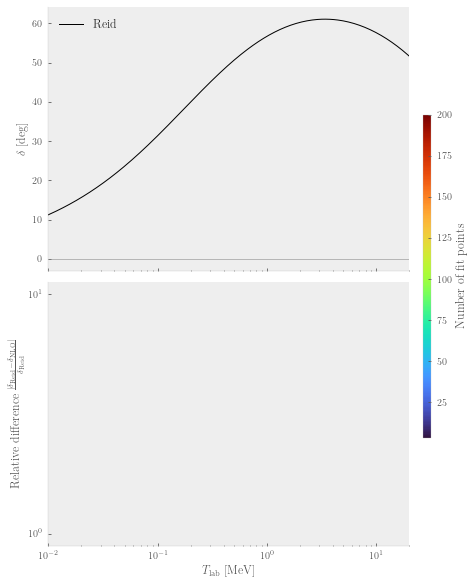

In [73]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
cmap_ = "turbo"
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=plt.matplotlib.pyplot.Normalize(vmin=minimum(points), vmax=maximum(points)))
cm = cmap(cmap_, length(Vs))
ax1.axhline(y=0, c="gray", linewidth=0.5)
for (i, (point, phase)) in zip(points, Vs) |> enumerate
    ax1.plot(E, phase, color=cm[i])
    err = @. abs(reid-phase)/reid
    ax2.plot(E, err, color=cm[i])
end
ax1.plot(E, reid, color="k", label="Reid")
cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel("Number of fit points")
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel(L"Relative difference $\frac{|\delta_{\mathrm{Reid}} - \delta_{\mathrm{NLO}}|}{\delta_{\mathrm{Reid}}}$")
ax1.legend()
ax1.set_xlim(1e-2, 20)
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
savefig(fig, "NLO_points_error.pdf")

In [74]:
fig, ax = newfig(nrows=2, sharex=true, tight_layout=true)
summed = map(x -> abs.(x) |> sum, errors)
summed ./= summed[end]
summed .-= 1
summed *= 100
ax[2].plot(points, summed)
ax[2].set_xlabel("Number of fit points")
ax[2].set_ylabel(L"Error relative to last point [$ \% $]")
ax[1].plot(points, time)
ax[1].set_ylabel("Optimization time [s]")
savefig(fig, "NLO_dependence_time_error.pdf")

LoadError: UndefVarError: errors not defined

In [75]:
fig, ax = newfig(nrows=2, sharex=true, tight_layout=true)
c0, c1 = zip(coefficients...)
ax[1].scatter(points, c0, zorder=100)
ax[2].scatter(points, c1, zorder=100)
ax[end].set_xlabel("Number of fit points")
ax[1].set_ylabel(L"C_0")
ax[2].set_ylabel(L"C_2")

x = range(-10, 250, length=10)
ax[1].fill_between(x, fill((1-10/100)c0[end], length(x)),
    fill((1-1/100)c0[end], length(x)), alpha=0.1,
                  label=L"10\%")
ax[1].fill_between(x, fill((1+10/100)c0[end], length(x)),
    fill((1+1/100)c0[end], length(x)), alpha=0.1, facecolor="C1")
ax[1].fill_between(x, fill((1+1/100)c0[end], length(x)),
    fill((1-1/100)c0[end], length(x)), alpha=0.1, facecolor="C0",
                  label=L"1\%", zorder=100)
ax[1].legend(loc="upper right")
#ax[2].axhline((1+percent/100)c1[end], label=L"10\%")
#ax[2].axhline((1-percent/100)c1[end])
percent=10
#ax[2].axhline((1+percent/100)c1[end], color="C2", label=L"1\%")
#ax[2].axhline((1-percent/100)c1[end], color="C2")
x = range(-10, 250, length=10)
ax[2].fill_between(x, fill((1-percent/100)c1[end], length(x)),
    fill((1-1/100)c1[end], length(x)), alpha=0.1,
                  label=L"10\%")
ax[2].fill_between(x, fill((1+percent/100)c1[end], length(x)),
    fill((1+1/100)c1[end], length(x)), alpha=0.1, facecolor="C1")
percent=1
ax[2].fill_between(x, fill((1+percent/100)c1[end], length(x)),
    fill((1-percent/100)c1[end], length(x)), alpha=0.1, facecolor="C0",
                  label=L"1\%", zorder=100)
ax[2].set_xlim(0, 200)
ax[2].legend(loc="right")
savefig(fig, "NLO_coeff_dependence.pdf")

LoadError: UndefVarError: coefficients not defined

## Dependence on fit region

### LO

In [11]:
 function measureregion(V, coeffs, endpoints; minlim=nothing, maxlim=nothing)
    results = FitResult[]
    for endpoint in endpoints |> tqdm
        p = Params(1e-3, endpoint, 10, m_π/197)
        fp = FitParams(p, V, minlim, maxlim, C₀=coeffs, method=:LsqFit)
        res = fit(fp)
        push!(results, res)
    end
    results
end

measureregion (generic function with 1 method)

In [8]:
points = [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5,
          6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 15, 18, 20, 22, 25, 30, 50, 100]
points = 10 .^(range(log10(1e-2), log10(100), length=100))
res = measureregion(LO, [-0.5], points);

0.0%┣                                          ┫ 0/100 [00:00<00:-5, -20.0 it/s]
1.0%┣▍                                         ┫ 1/100 [00:01<Inf:Inf, 0.0 it/s]
2.0%┣▉                                           ┫ 2/100 [00:02<02:46, 0.6 it/s]
3.0%┣█▎                                          ┫ 3/100 [00:02<01:51, 0.9 it/s]
4.0%┣█▊                                          ┫ 4/100 [00:03<01:32, 1.0 it/s]
5.0%┣██▏                                         ┫ 5/100 [00:04<01:26, 1.1 it/s]
6.0%┣██▋                                         ┫ 6/100 [00:04<01:20, 1.2 it/s]
7.0%┣███                                         ┫ 7/100 [00:05<01:17, 1.2 it/s]
8.0%┣███▌                                        ┫ 8/100 [00:06<01:15, 1.2 it/s]
9.0%┣████                                        ┫ 9/100 [00:06<01:12, 1.3 it/s]
10.0%┣████▏                                     ┫ 10/100 [00:07<01:09, 1.3 it/s]
11.0%┣████▋                                     ┫ 11/100 [00:07<01:07, 1.3 it/s]
12.0%┣█████                 

In [12]:
Vs = Vector{Float64}[]
errp = Vector{Float64}[]
errors = Float64[]
E, reid = reidphase(1e-3, 1e2, length=350)
for (point, fit) in zip(points, res)
    _, δ = phase(fit, 1e-3, 1e2, length=350)
    push!(Vs, δ)
    err = relerr(reid, δ)
    push!(errp, err)
    err = error(fit)[2] |> sum
    push!(errors, err)
end

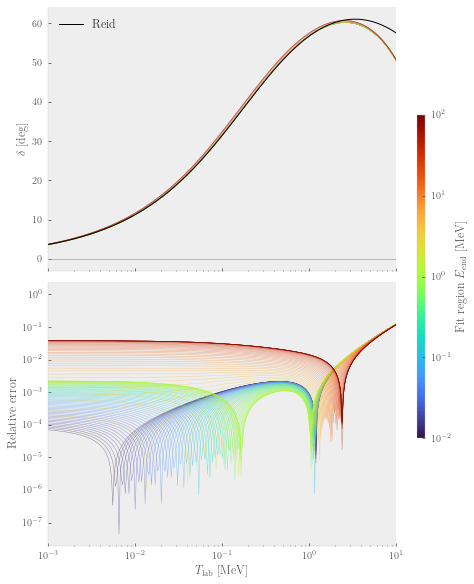

PyObject Text(0.5, 19.155168119551686, '$T_{\\mathrm{lab}}$ [MeV]')

In [15]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
cmap_ = "turbo"
norm = plt.matplotlib.colors.LogNorm(vmin=minimum(points), vmax=maximum(points))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(Vs)) #cmap(sm, length(Vs))
ax1.axhline(y=0, c="gray", linewidth=0.5)
for (i, (point, phase)) in zip(points, Vs) |> enumerate
    ax1.plot(E, phase, color=cm[i], linewidth=0.5, alpha=0.1)
    ax2.plot(E, errp[i], color=cm[i], linewidth=0.5, alpha=0.5)
end
ax1.plot(E, reid, color="k", label="Reid")
cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"Fit region $E_{\mathrm{end}}$ [MeV]")
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative error")
ax1.legend()
ax1.set_xlim(1e-3, 10)
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
#savefig(fig, "LO_region_error.pdf")

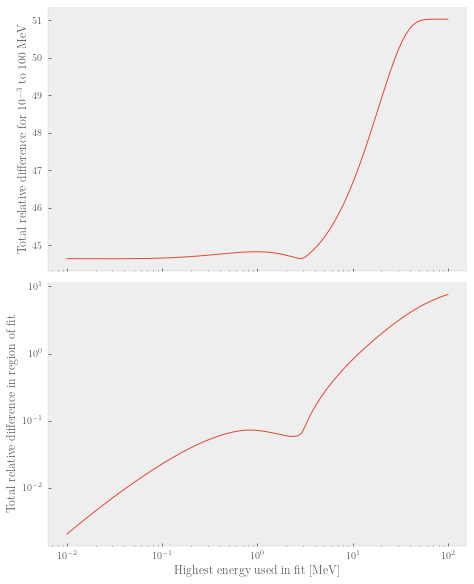

In [14]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
ax[1].plot(points, sum.(errp))
ax[2].plot(points, errors)
ax[2].set_xlabel("Highest energy used in fit [MeV]")
ax[2].set_ylabel("Total relative difference in region of fit")
ax[1].set_ylabel(L"Total relative difference for $10^{-3}$ to $100$ MeV")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
#savefig(fig, "LO_dependence_points_error.pdf")

In [ ]:
fig, ax = newfig()
c0 = [fit.C[1] for fit in resNLO]
c0ci_0, c0ci_1 = zip([confidence_interval(fit.res, 0.05)[1] for fit in resNLO]...)
ax.fill_between(points, c0ci_0, c0ci_1, alpha=0.3)
ax.plot(points, c0)
ax.set_xlabel("Highest energy used in fit [MeV]")
ax.set_xscale("log")
ax.set_ylabel(L"C_0")
#savefig(fig, "LO_coeff_dependence_region.pdf")

### NLO

In [ ]:
points = [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5,
          6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 15, 18, 20, 22, 25, 30, 50, 100]
points = 10 .^(range(log10(1e-2), log10(100), length=100))
resNLO = measureregion(NLO, [-0.5, -0.1], points);

In [ ]:
Vs = Vector{Float64}[]
errp = Vector{Float64}[]
errors = Float64[]
E, reid = reidphase(1e-3, 1e2, length=350)
for (point, fit) in zip(points, resNLO)
    _, δ = phase(fit, 1e-3, 1e2, length=350)
    push!(Vs, δ)
    err = relerr(reid, δ)
    push!(errp, err)
    err = error(fit)[2] |> sum
    push!(errors, err)
end

In [ ]:
emin = argmin(errp .|> sum)
points[emin]

In [ ]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
cmap_ = "turbo"
norm = plt.matplotlib.colors.LogNorm(vmin=minimum(points), vmax=maximum(points))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(Vs)) #cmap(sm, length(Vs))
ax1.axhline(y=0, c="gray", linewidth=0.5)
for (i, (point, phase)) in zip(points, Vs) |> enumerate
    ax1.plot(E, phase, color=cm[i], linewidth=0.5, alpha=1)
    ax2.plot(E, errp[i], color=cm[i], linewidth=0.5)
end
ax1.plot(E, reid, "k--", label="Reid")
ax1.plot(E, Vs[emin], color="k", linewidth=1, alpha=1)
ax2.plot(E, errp[emin], color="k", linewidth=1)

cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"Fit region $E_{\mathrm{end}}$ [MeV]")
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative difference")
ax1.legend()
#ax1.set_xlim(1e-2, 20)
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
savefig(fig, "NLO_region_error.pdf")

In [ ]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
ax[2].plot(points, errors)
ax[2].set_xlabel("Highest energy used in fit [MeV]")
ax[2].set_ylabel("Total relative difference in region of fit")
ax[1].plot(points, sum.(errp))
ax[1].set_xscale("log")
ax[2].set_yscale("log")
ax[1].set_ylabel(L"Total relative difference in [$10^{-3}, 100$] MeV")
savefig(fig, "NLO_dependence_points_error.pdf")

In [ ]:
fig, ax = newfig(nrows=2, sharex=true, tight_layout=true)
c0 = [fit.C[1] for fit in resNLO]
c1 = [fit.C[2] for fit in resNLO]
c0ci_0, c0ci_1 = zip([confidence_interval(fit.res, 0.05)[1] for fit in resNLO]...)
c2ci_0, c2ci_1 = zip([confidence_interval(fit.res, 0.05)[2] for fit in resNLO]...)
ax[1].fill_between(points, c0ci_0, c0ci_1, alpha=0.3)
ax[1].plot(points, c0)
ax[2].fill_between(points, c2ci_0, c2ci_1, alpha=0.3)
ax[2].plot(points, c1)
ax[end].set_xlabel("Highest energy used in fit [MeV]")
ax[end].set_xscale("log")
ax[1].set_ylabel(L"C_0")
ax[2].set_ylabel(L"C_2")
savefig(fig, "NLO_coeff_dependence_region.pdf")

### NNLO

In [ ]:
points = 10 .^(range(log10(1e-3), log10(350), length=100))
resNNLO = measureregion(NNLO, [-0.5, 0.3, 0.3, 0.3], points);

In [ ]:
Vs = Vector{Float64}[]
errp = Vector{Float64}[]
errors = Float64[]
E, reid = reidphase(1e-3, 1e2, length=350)
for (point, fit) in zip(points, resNNLO)
    _, δ = phase(fit, 1e-3, 1e2, length=350)
    push!(Vs, δ)
    err = relerr(reid, δ)
    push!(errp, err)
    err = error(fit)[2] |> sum
    push!(errors, err)
end

In [ ]:
good = map(x -> sum(x) > 0, Vs)
coefficients[good]

In [ ]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
cmap_ = "turbo"
norm = plt.matplotlib.colors.LogNorm(vmin=minimum(points), vmax=maximum(points))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(Vs)) #cmap(sm, length(Vs))
ax1.axhline(y=0, c="gray", linewidth=0.5)
for (i, (point, phase)) in zip(points, Vs) |> enumerate
    ax1.plot(E, phase, color=cm[i], linewidth=0.5, alpha=1)
    ax2.plot(E, errp[i], color=cm[i], linewidth=0.5)
end
ax1.plot(E, reid, "k--", label="Reid")
ax1.plot(E, Vs[emin], color="k", linewidth=1, alpha=1)
ax2.plot(E, errp[emin], color="k", linewidth=1)

cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"Fit region $E_{\mathrm{end}}$ [MeV]")
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative difference")
ax1.legend()
#ax1.set_xlim(1e-2, 20)
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
savefig(fig, "NNLO_region_error.pdf")

In [ ]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
ax[2].plot(points, errors)
ax[2].set_xlabel("Highest energy used in fit [MeV]")
ax[2].set_ylabel("Total relative difference in region of fit")
ax[1].plot(points, sum.(errp))
ax[1].set_xscale("log")
ax[2].set_yscale("log")
ax[1].set_ylabel(L"Total relative difference in [$10^{-3}, 100$] MeV")
savefig(fig, "NNLO_dependence_points_error.pdf")

In [ ]:
stderror(resNNLO[3].res)

In [ ]:
fig, ax = newfig(nrows=2, ncols=2, sharex=true, tight_layout=true)
c0 = [fit.C[1] for fit in resNNLO]
c2 = [fit.C[2] for fit in resNNLO]
c4 = [fit.C[3] for fit in resNNLO]
c5 = [fit.C[4] for fit in resNNLO]
c0ci_0, c0ci_1 = zip([confidence_interval(fit.res, 0.05)[1] for fit in resNNLO]...)
c2ci_0, c2ci_1 = zip([confidence_interval(fit.res, 0.05)[2] for fit in resNNLO]...)
c4ci_0, c4ci_1 = zip([confidence_interval(fit.res, 0.05)[3] for fit in resNNLO]...)
c5ci_0, c5ci_1 = zip([confidence_interval(fit.res, 0.05)[4] for fit in resNNLO]...)
ax[1].fill_between(points, c0ci_0, c0ci_1, alpha=0.3)
ax[1].plot(points, c0)
ax[2].fill_between(points, c2ci_0, c2ci_1, alpha=0.3)
ax[2].plot(points, c2)
ax[3].fill_between(points, c4ci_0, c4ci_1, alpha=0.3)
ax[3].plot(points, c4)
ax[4].fill_between(points, c5ci_0, c5ci_1, alpha=0.3)
ax[4].plot(points, c5)
for (a, c) in zip(ax, [c0, c2, c4, c5])
    min = 1.2minimum(c)
    max = 1.2maximum(c)
    a.set_ylim([min, max])
end
fig.text(0.5, 0.0, "Highest energy used in fit [MeV]", ha="center")
ax[end].set_xscale("log")
ax[1].set_ylabel(L"C_0")
ax[2].set_ylabel(L"C_2")
ax[3].set_ylabel(L"C_4")
ax[4].set_ylabel(L"C_4^\prime")
savefig(fig, "NNLO_coeff_dependence_region.pdf")

## Numerical Stability

In [ ]:
function measurestability(V, coeffs, iterations; minlim=nothing, maxlim=nothing)
    n = length(coeffs)
    minlim = if isnothing(minlim) fill(-1.0, n) else minlim end
    maxlim = if isnothing(maxlim) fill(1.0, n) else maxlim end
    time = Float64[]
    errors = Vector{Float64}[]
    coefficients = Vector{Float64}[]
    curves = Vector{Float64}[]
    E, reid_full = computephase(Reid(), length=50)
    endpoint = 5
    for i in 1:iterations
        println(i)
        C = coeffs .+ (rand(n) .- 0.5)
        _, reid = computephase(Reid(), length=50, endpoint=endpoint)
        erf = makeerrorfunction(V, length=50, fact=reid, endpoint=endpoint)
        results = optimize(erf, minlim, maxlim, C, Fminbox(), Optim.Options(time_limit=3*60.0))
        cres = Optim.minimizer(results)
        push!(time, results.time_run)
        push!(coefficients, cres)
        Vfit = V(cres...)
        Vfit = regularize(Vfit, 0.7)
        _, deltas = computephase(Vfit, length=50)
        push!(curves, deltas)
    end
    E, time, coefficients, curves
end

In [ ]:
E, t, c, curves = measurestability(NLO, [-0.5, -0.1], 50);

In [ ]:
fig, ax = newfig()
for curve in curves[good]
    ax.plot(E, curve)
end
_, reid = computephase(Reid())
ax.plot(E, reid)

In [ ]:
good = map(x -> sum(x) > 0, curves) |> collect

In [ ]:
fig, ax = newfig()
time = t[good]
i = 1:length(time)
ax.hist(time, bins=20);

In [ ]:
fig, ax = newfig(nrows=2, sharex=false, constrained_layout=true)
c0, c1 = zip(c[good]...)
@show length(c0), length(i)
ax[1].hist(c0, bins=10)
ax[2].hist(c1, bins=10)
ax[end].set_xlabel("Highest energy used in fit [MeV]")
ax[1].set_ylabel(L"C_0")
ax[2].set_ylabel(L"C_2")

In [ ]:
fig, ax = newfig()
ax.hist2d(c0, c1)
@show mean(c0), std(c0)
@show mean(c1), std(c1)

## Find influence of $\Lambda$

### Setup

In [7]:
function measurelambda(V, coeffs, lambdas; endpoint=3, minlim=nothing, maxlim=nothing)
    results = FitResult[]
    for Λ in lambdas |> tqdm
        p = Params(1e-3, endpoint, 50,[Λ])
        fp = FitParams(p, V, minlim, maxlim, C₀=coeffs, method=:LsqFit)
        res = fit(fp)
        push!(results, res)
    end
    results
end

function computerrors(res::Vector{FitResult})
    V = Vector{Float64}[]
    errp = Vector{Float64}[]
    errors = Float64[]
    E, reid = reidphase(1e-3, 1e2, length=350)
    for fit in res
        _, δ = phase(fit, 1e-3, 1e2, length=350)
        push!(V, δ)
        err = relerr(reid, δ)
        push!(errp, err)
        err = error(fit)[2] |> sum
        push!(errors, err)
    end
    E, reid, V, errp, errors
end

function plotfit(iter, E, reid, phases, errp)
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
cmap_ = "turbo"
norm = plt.matplotlib.colors.Normalize(vmin=minimum(iter), vmax=maximum(iter))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(phases)) #cmap(sm, length(Vs))
ax1.axhline(y=0, c="gray", linewidth=0.5)
for (i, (point, phase)) in zip(iter, phases) |> enumerate
    ax1.plot(E, phase, color=cm[i], linewidth=0.5, alpha=1)
    ax2.plot(E, errp[i], color=cm[i], linewidth=0.5)
end

cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"$\Lambda$ [fm-1]")
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative difference")
ax1.legend()
#ax1.set_xlim(1e-2, 20)
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
    [ax1, ax2], cbar
end

plotfit (generic function with 1 method)

### LO

In [2]:
lambdasLO = range(50, 300, length=50)/197
#lambdasLO = range(0.01, 2000, length=20)
#lambdasLO = range(0.1, 1.0, length=20)
@show lambdasLO[1], lambdasLO[end]
resLO = measurelambda(LO, [-0.5], lambdasLO);

(lambdasLO[1], lambdasLO[end]) = (0.25380710659898476, 1.5228426395939085)
0.0%┣                                           ┫ 0/50 [00:00<00:-3, -20.0 it/s]
2.0%┣▉                                          ┫ 1/50 [00:07<Inf:Inf, 0.0 it/s]
4.0%┣█▉                                           ┫ 2/50 [00:07<05:33, 0.1 it/s]
6.0%┣██▊                                          ┫ 3/50 [00:07<02:46, 0.3 it/s]
8.0%┣███▋                                         ┫ 4/50 [00:07<01:50, 0.4 it/s]
10.0%┣████▍                                       ┫ 5/50 [00:07<01:22, 0.5 it/s]
12.0%┣█████▎                                      ┫ 6/50 [00:07<01:05, 0.7 it/s]
14.0%┣██████▏                                     ┫ 7/50 [00:08<00:54, 0.8 it/s]
16.0%┣███████                                     ┫ 8/50 [00:08<00:46, 0.9 it/s]
18.0%┣████████                                    ┫ 9/50 [00:08<00:40, 1.0 it/s]
20.0%┣████████▋                                  ┫ 10/50 [00:08<00:35, 1.1 it/s]
22.0%┣█████████▌                  

In [3]:
E, reid, VLO, errpLO, errorLO = computerrors(resLO);

In [4]:
eminLO = argmin(errorLO)
@show errorLO[eminLO]
@show bestlambda = 197lambdasLO[eminLO]

errorLO[eminLO] = 0.0001880424971150672
bestlambda = 197 * lambdasLO[eminLO] = 131.6326530612245


131.6326530612245

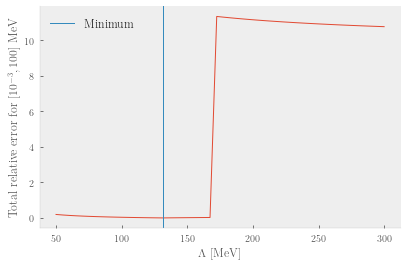

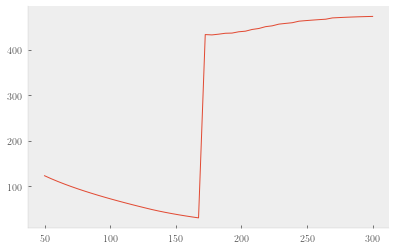

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f77383f72e0>

In [5]:
lambda = 197lambdasLO# .|> toenergy
fig, ax = newfig()
#ax2 = twinscale(ax, func=tomomentum)
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
ax.plot(lambda, errorLO)
ax.axvline(lambda[eminLO], color="C1", label="Minimum")
ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
ax.set_xlabel(L"$\Lambda$ [MeV]")
ax.legend()
#savefig(fig, "lambda_LO.pdf")
fig, ax = newfig()
ax.plot(lambda, errpLO .|> sum)

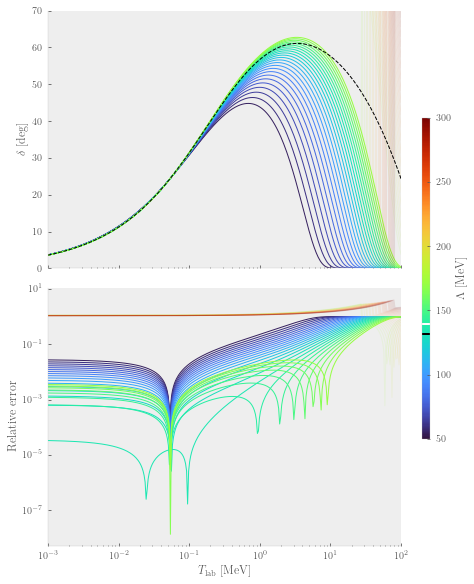

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f77380a1eb0>

In [6]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
#ax2 = twinscale(ax, func=x->196/(x))
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
cmap_ = "turbo"
norm = plt.matplotlib.colors.Normalize(vmin=minimum(lambda), vmax=maximum(lambda))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(lambda)) #cmap(sm, length(Vs))
alphas = map(x -> if findjump(x) 0.1 else 1.0 end, VLO)

for (i, v) in VLO |> enumerate
    ax1.plot(E, v, color=cm[i], alpha=alphas[i])
end
ax1.plot(E, reid, "k--", lw=1)

for (i, err) in errpLO |> enumerate
    ax2.plot(E, err, color=cm[i], alpha=alphas[i])
end
ax1.set_ylim(0, 70)
ax1.set_xlim(1e-3, 100)
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative error")
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"$\Lambda$ [MeV]")
cbarxlim = cbar.ax.get_xlim()
cbar.ax.plot(cbarxlim, [139.6, 139.6], "w", lw=2)
cbar.ax.plot(cbarxlim, [bestlambda, bestlambda], "k-", lw=2)
#ax.axvline(lambdasLO[eminLO], color="C1", label="Minimum")
#ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
#ax.set_xlabel(L"$\Lambda$ [fm$^{-1}$]")
#savefig(fig, "lambda_LO.pdf")

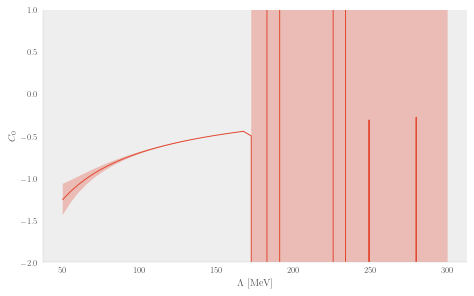

In [293]:
fig, ax1 = newfig(nrows=1, sharex=true, constrained_layout=true)
plotci(resLO, 1, ax1, lambda)
ax1.set_xlabel(L"$\Lambda$ [MeV]")
ax1.set_ylabel(L"C_0")
ax1.set_ylim((-2, 1))
savefig(fig, "lambda_coeff_LO.pdf")

### NLO

In [392]:
start = 50
stop = 300
lambdasNLO, E, reid, VNLO, errpNLO, errorNLO, emin = fitlambdas(NLO, [-0.5, -0.03]; 
                                            start, stop, length=50)

0.0%┣                                           ┫ 0/50 [00:00<00:-3, -20.0 it/s]
2.0%┣▉                                          ┫ 1/50 [00:00<Inf:Inf, 0.0 it/s]
4.0%┣█▉                                           ┫ 2/50 [00:01<00:36, 1.3 it/s]
6.0%┣██▊                                          ┫ 3/50 [00:01<00:24, 1.9 it/s]
8.0%┣███▋                                         ┫ 4/50 [00:01<00:20, 2.3 it/s]
10.0%┣████▍                                       ┫ 5/50 [00:02<00:18, 2.5 it/s]
12.0%┣█████▎                                      ┫ 6/50 [00:02<00:16, 2.7 it/s]
14.0%┣██████▏                                     ┫ 7/50 [00:02<00:15, 2.9 it/s]
16.0%┣███████                                     ┫ 8/50 [00:02<00:14, 3.1 it/s]
18.0%┣████████                                    ┫ 9/50 [00:03<00:13, 3.2 it/s]
20.0%┣████████▋                                  ┫ 10/50 [00:03<00:12, 3.3 it/s]
22.0%┣█████████▌                                 ┫ 11/50 [00:03<00:12, 3.3 it/s]
24.0%┣██████████▎           

([50.0, 55.10204081632653, 60.20408163265306, 65.3061224489796, 70.40816326530613, 75.51020408163265, 80.61224489795919, 85.71428571428572, 90.81632653061224, 95.91836734693878  …  254.0816326530612, 259.18367346938777, 264.2857142857143, 269.3877551020408, 274.48979591836735, 279.59183673469386, 284.69387755102036, 289.7959183673469, 294.89795918367344, 300.0], [0.001, 0.0010335384727275683, 0.0010682017746080335, 0.001104027630693265, 0.001141055031275752, 0.0011793242743228483, 0.0012188770093341833, 0.001259756282669998, 0.0013020065843997086, 0.0013456738967217111  …  74.31220910475925, 76.80452710314452, 79.38043364074709, 82.04273214950979, 84.79432008420127, 87.63819207579792, 90.57744319062546, 93.61527229880708, 96.75498555568446, 100.0], [3.596300385931303, 3.655912021085248, 3.716505036914008, 3.7780952496776736, 3.8406987140605264, 3.904331723950067, 3.9690108175248935, 4.0347527779874035, 4.101574637179944, 4.169493677760547  …  30.971619127995442, 30.27123307974462, 29.5

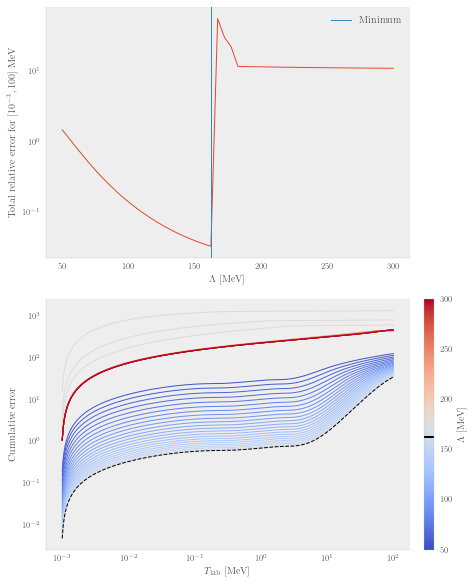

In [394]:
fig = plotlambdaerror(lambdasNLO, emin, errpNLO, errorNLO)
savefig(fig, "lambdas_errors_NLO.pdf")

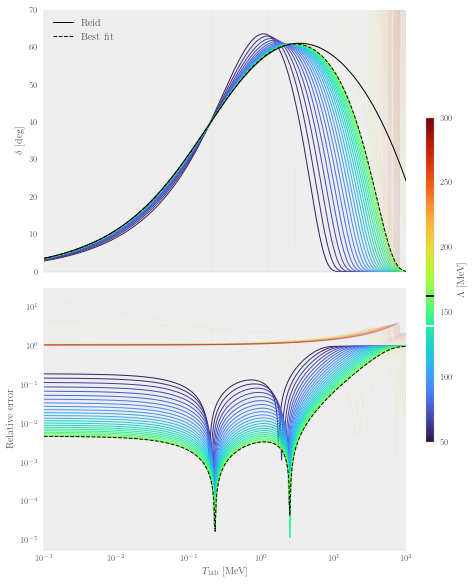

In [396]:
fig = plotlambdafit(E, reid, lambdasNLO, VNLO, errpNLO, emin)
savefig(fig, "lambda_NLO.pdf")

In [397]:
printci(resNLO, 1, eminNLO) |> println
printci(resNLO, 2, eminNLO) |> println

(low, high) = (-0.49639367666594464, -0.49350535475026874)
("{-0.495}^{0.001}_{0.001}", "\\num{-0.495 +- 0.001}")
(low, high) = (0.11791221256807459, 0.12839524744585445)
("{0.123}^{0.005}_{0.005}", "\\num{0.123 +- 0.005}")


### NNLO

In [398]:
lambdasNNLO = range(50, 200, length=50)/197
resNNLO = measurelambda(NNLO, [-0.5, -0.03, 0.1, 0.1], lambdasNNLO);

0.0%┣                                           ┫ 0/50 [00:00<00:-3, -20.0 it/s]
2.0%┣▉                                          ┫ 1/50 [00:04<Inf:Inf, 0.0 it/s]
4.0%┣█▉                                           ┫ 2/50 [00:04<03:24, 0.2 it/s]
6.0%┣██▊                                          ┫ 3/50 [00:06<02:22, 0.3 it/s]
8.0%┣███▋                                         ┫ 4/50 [00:08<02:08, 0.4 it/s]
10.0%┣████▍                                       ┫ 5/50 [00:11<02:03, 0.4 it/s]
12.0%┣█████▎                                      ┫ 6/50 [00:15<02:12, 0.3 it/s]
14.0%┣██████▏                                     ┫ 7/50 [00:18<02:12, 0.3 it/s]
16.0%┣███████                                     ┫ 8/50 [00:21<02:07, 0.3 it/s]
18.0%┣████████                                    ┫ 9/50 [00:25<02:10, 0.3 it/s]
20.0%┣████████▋                                  ┫ 10/50 [00:32<02:20, 0.3 it/s]
22.0%┣█████████▌                                 ┫ 11/50 [00:40<02:36, 0.2 it/s]
24.0%┣██████████▎           

In [399]:
E, reid, VNNLO, errpNNLO, errorNNLO = computerrors(resNNLO);
eminNNLO = argmin(errpNNLO)
@show lambdasNNLO[eminNNLO]
@show bestlambda = 197lambdasNNLO[eminNNLO]

lambdasNNLO[eminNNLO] = 0.5956697399772092
bestlambda = 197 * lambdasNNLO[eminNNLO] = 117.34693877551021


117.34693877551021

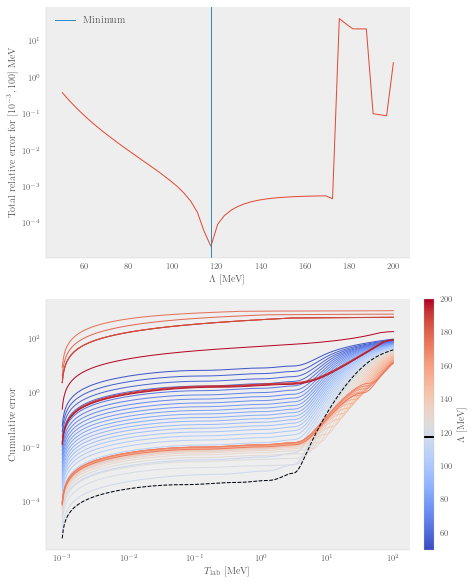

In [405]:
fig = plotlambdaerror(lambdasNNLO*197, eminNNLO, errpNNLO, errorNNLO);
savefig(fig, "lambdas_errors_NNLO.pdf")

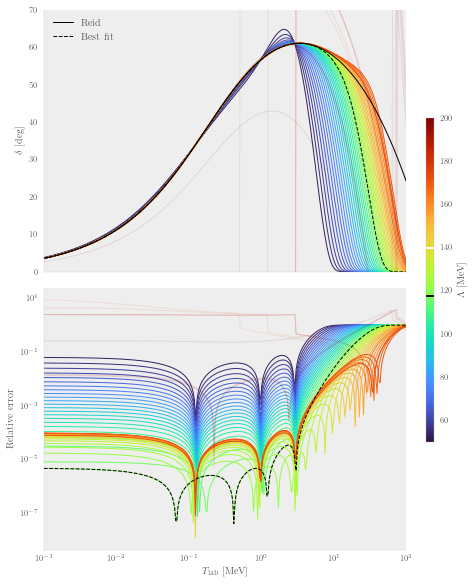

In [408]:
fig = plotlambdafit(E, reid, 197lambdasNNLO, VNNLO, errpNNLO, eminNNLO)
savefig(fig, "lambda_NNLO.pdf")

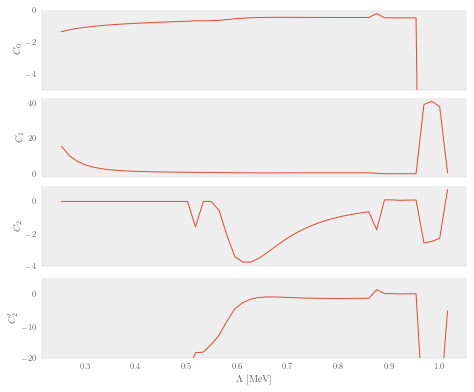

In [409]:
fig, (ax1, ax2, ax3, ax4) = newfig(nrows=4, sharex=true, constrained_layout=true, height=1/3)
plotci(resNNLO, 1, ax1, lambdasNNLO; bounds=false)
plotci(resNNLO, 2, ax2, lambdasNNLO; bounds=false)
plotci(resNNLO, 3, ax3, lambdasNNLO; bounds=false)
plotci(resNNLO, 4, ax4, lambdasNNLO; bounds=false)
ax4.set_xlabel(L"$\Lambda$ [MeV]")
ax1.set_ylabel(L"C_0")
ax2.set_ylabel(L"C_1")
ax1.set_ylim(-5, 0)
#ax2.set_ylim(-0.5, 0.5)
#ax3.set_ylim(-0.5, 0)
ax4.set_ylim(-20, 5)
ax3.set_ylabel(L"C_2")
ax4.set_ylabel(L"C_2^{\prime}")
#ax1.set_ylim((-2, 1))
savefig(fig, "lambda_coeff_NNLO.pdf")

In [403]:
printci(resNNLO, 1, eminNNLO) |> println
printci(resNNLO, 2, eminNNLO) |> println
printci(resNNLO, 3, eminNNLO) |> println
printci(resNNLO, 4, eminNNLO) |> println

(low, high) = (-0.5693837702464988, -0.5428903183995533)
("{-0.56}^{0.01}_{0.01}", "\\num{-0.56 +- 0.01}")
(low, high) = (0.4978411666270766, 0.5458945427942314)
("{0.52}^{0.02}_{0.02}", "\\num{0.52 +- 0.02}")
(low, high) = (-3.8565809946869516, -3.0212801060400043)
("{-3.4}^{0.4}_{0.4}", "\\num{-3.4 +- 0.4}")
(low, high) = (-5.436900582337346, -3.8687149064318174)
("{-4.7}^{0.8}_{0.8}", "\\num{-4.7 +- 0.8}")


## Summary

### Old method

Do a line search for different value of $\Lambda$ for the NLO potential

In [ ]:
function lambda_search(V::Type{<:Potential}, coeffs, Λrange; minlim=nothing, maxlim=nothing, kwargs...)
    if isnothing(minlim)
        minlim = fill(-1, length(coeffs))
    end
    if isnothing(maxlim)
        maxlim = fill(1, length(coeffs))
    end
    maxlim = if length(maxlim) == 1 maxlim[1]  else maxlim end
    minlim = if length(minlim) == 1 minlim[1] else minlim end
    _, reid = computephase(Reid(); kwargs...)
    coefficients = []
    for λ in Λrange |> tqdm
        erf = makeerrorfunction(V, Λ=λ, fact=reid; kwargs...)
        inner = LBFGS(;linesearch=LineSearches.BackTracking())
        results = optimize(erf, minlim, maxlim, coeffs, Fminbox(inner), Optim.Options(time_limit=3*60.0))
        #results = optimize(erf, minlim, maxlim, coeffs, Fminbox())
        #@show results.time_run
        Cs = Optim.minimizer(results)
        push!(coefficients, Cs)
    end
    coefficients
end

function lambdasearchLO(Λrange;kwargs...)
    _, reid = computephase(Reid(); kwargs...)
    minlim = -10.0
    maxlim = 10.0
    coefficients = []
    for λ in tqdm(Λrange)
        erf = makeerrorfunction(LO, Λ=λ, fact=reid; kwargs...)
        results = optimize(erf, minlim, maxlim)
        #results = optimize(erf, minlim, maxlim, coeffs, Fminbox())
        Cs = Optim.minimizer(results)
        push!(coefficients, Cs)
    end
    coefficients
end

In [ ]:
lambdas_LO = range(0.2, 2, length=500)
coefficients_LO = lambdasearchLO(lambdas_LO, endpoint=1e0)

In [ ]:
lambdas = [range(0.68, 0.69, length=2)..., range(0.695, 0.705, length=3)..., 
           range(0.71, 0.72, length=2)...]
lambdas = range(0.69, 0.71, length=100)
coefficients_ = lambda_search(NLO, [-0.53, -0.052], lambdas);

In [ ]:
lambdas_NNLO = range(0.66, 0.8, length=20)
coefficients_NNLO = lambda_search(NNLO, [-0.5, 0.3, -0.2], lambdas_NNLO,
    minlim=[-0.6, -0.3, -2.0], maxlim=[-0.4, 1.0, 2.0], endpoint=1.0);

In [ ]:
function constructphase(V, coefficients, lambdas, endpoint, N)
    curves = [computephase(regularize(V(c...), λ), endpoint=endpoint, length=N)[2] 
              for (c, λ) in zip(coefficients, lambdas)]
    E, reid = computephase(Reid(), endpoint=endpoint, length=N)
    errs_pointwise = map(x -> relerr(reid, x), curves)
    errs = map(sum, errs_pointwise)
    E, reid, curves, errs_pointwise, errs
end
maxE = 10
N = 200

In [ ]:
E, reid, curves_NNLO, pointwise_NNLO, errors_NNLO = constructphase(NNLO, coefficients_NNLO, 
    lambdas_NNLO, 0.1, N);
emin_NNLO = argmin(errors_NNLO)

In [ ]:
E, reid, curves_LO, pointwise_LO, errors_LO = constructphase(LO, coefficients_LO, lambdas_LO, 100, N)
emin_LO = argmin(errors_LO)
@show lambdas_LO[emin_LO], 197*lambdas_LO[emin_LO]

In [ ]:
coefficients_NNLO

In [ ]:
fig, ax = newfig()
ax2 = twinscale(ax, func=x->197*x)
ax2.set_xlabel(L"$\Lambda$ [MeV]")
ax.plot(lambdas_LO, errors_LO, label="LO")
#ax.plot(lambdas, errors_NNLO, label="NNLO")
ax.axvline(lambdas_LO[emin_LO], color="C1", label="Minimum")
ax.set_ylabel(L"Total relative error for [$10^{-3}, 1$] MeV")
#ax.set_yscale("log")
#ax.set_xlim(minimum(lambdas), maximum(lambdas))
ax.set_xlabel(L"$\Lambda$ [fm$^{-1}$]")
ax.legend()
savefig(fig, "lambda_LO.pdf")

In [ ]:
fig, ax = newfig()
ax2 = twinscale(ax, func=x->197*x)
ax2.set_xlabel(L"$\Lambda$ [MeV]")
#ax.plot(lambdas_LO, errors_LO, label="LO")
ax.plot(lambdas, errs, label="NLO")
#ax.plot(lambdas, errors_NNLO, label="NNLO")
ax.axvline(lambdas[emin], color="C1", label="Minimum")
ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
#ax.set_yscale("log")
#ax.set_xlim(minimum(lambdas), maximum(lambdas))
ax.set_xlabel(L"$\Lambda$ [fm$^{-1}$]")
ax.legend()
savefig(fig, "lambda_NLO.pdf")

In [ ]:
fig, ax = newfig(nrows=2, constrained_layout=true, sharex=true)
cmap_ = "turbo"
norm =  plt.matplotlib.pyplot.Normalize(vmin=minimum(lambdas_LO), vmax=maximum(lambdas_LO))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(cmap_, length(lambdas_LO))
for i in 1:length(lambdas_LO)
    λ = lambdas_LO[i]
    curve = curves_LO[i]
    err = pointwise_LO[i]
    if i == emin_LO
        ax[1].plot(E, curve, linewidth=1, "k--", zorder=200, label="Best fit")
        ax[2].plot(E, err, linewidth=1, "k--", alpha=1, zorder=200)
    else
        ax[2].plot(E, err, linewidth=0.5, color=cm[i÷2 + 1], alpha=1)
        ax[1].plot(E, curve, linewidth=0.5, color=cm[i÷2 + 1])
    end
end
ax[1].plot(E, reid, "k-", linewidth=1, label="Reid")
ax[2].set_yscale("log")
cbar = fig.colorbar(sm, ax=ax, shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L" $\Lambda$ [fm$^{-1}$]")
ax[1].set_xscale("log")
ax[end].set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
ax[1].set_ylabel(L"$\delta$ [deg]")
ax[2].set_ylabel(L"Total relative error for [$10^{-3}, 1$] MeV")
ax[1].set_ylim(0, 70)
ax[1].set_xlim(1e-3, 1e0)
ax[1].legend()
savefig(fig, "lambda_LO_fit.pdf")

In [ ]:
fig, ax = newfig()
ax2 = twinscale(ax, func=x->197*x)
ax2.set_xlabel(L"$\Lambda$ [MeV]")
#ax.plot(lambdas, errs)
ax.plot(lambdas_NNLO, errors_NNLO, label="NNLO")
ax.axvline(lambdas_NNLO[emin_NNLO], color="C1")
ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
#ax.set_yscale("log")
#ax.set_xlim(0.7, 0.72)
ax.set_xlabel(L"$\Lambda$ [fm$^{-1}$]")
#savefig(fig, "lambda_NNLO.pdf")

In [ ]:
fig, ax = newfig(nrows=2, constrained_layout=true, sharex=true)
cmap_ = "turbo"
norm =  plt.matplotlib.pyplot.Normalize(vmin=minimum(lambdas_NNLO), vmax=maximum(lambdas_NNLO))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(cmap_, length(lambdas_NNLO))
for i in 1:length(lambdas_NNLO)
    λ = lambdas_NNLO[i]
    curve = curves_NNLO[i]
    err = pointwise_NNLO[i]
    if i == emin
        ax[1].plot(E, curve, linewidth=1, "k--", zorder=200, label="Best fit")
        ax[2].plot(E, err, linewidth=1, "k--", alpha=1, zorder=200)
    else
        ax[2].plot(E, err, linewidth=0.5, color=cm[i], alpha=1)
        ax[1].plot(E, curve, linewidth=0.5, color=cm[i])
    end
end
ax[1].plot(E, reid, "k-", linewidth=1, label="Reid")
ax[2].set_yscale("log")
cbar = fig.colorbar(sm, ax=ax, shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L" $\Lambda$ [fm$^{-1}$]")
ax[1].set_xscale("log")
ax[end].set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
ax[1].set_ylabel(L"$\delta$ [deg]")
ax[2].set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
ax[1].set_ylim(0, 65)
ax[1].set_xlim(1e-3, 1e2)
ax[1].legend()
#savefig(fig, "lambda_NNLO_fit.pdf")

In [ ]:
fig, ax = newfig(nrows=2, constrained_layout=true, sharex=true)
cmap_ = "turbo"
norm =  plt.matplotlib.pyplot.Normalize(vmin=minimum(lambdas_NLO), vmax=maximum(lambdas_NLO))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(cmap_, length(lambdas_NLO))
for i in 1:length(lambdas)
    λ = lambdas[i]
    curve = curves[i]
    err = errs_pointwise[i]
    if i == emin
        ax[1].plot(E, curve, linewidth=1, "k--", zorder=200, label="Best fit")
        ax[2].plot(E, err, linewidth=1, "k--", alpha=1, zorder=200)
    else
        ax[2].plot(E, err, linewidth=0.5, color=cm[i], alpha=1)
        ax[1].plot(E, curve, linewidth=0.5, color=cm[i])
    end
end
ax[1].plot(E, reid, "k-", linewidth=1, label="Reid")
ax[2].set_yscale("log")
cbar = fig.colorbar(sm, ax=ax, shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L" $\Lambda$ [fm$^{-1}$]")
ax[1].set_xscale("log")
ax[end].set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
ax[1].set_ylabel(L"$\delta$ [deg]")
ax[2].set_ylabel(L"Total relative error for [$10^{-3}, 200$] MeV")
ax[1].set_ylim(0, 65)
ax[1].legend()
savefig(fig, "lambda_NLO_fit.pdf")

In [ ]:
fig, ax = newfig(constrained_layout=true)
c0 = coefficients_LO
@show mean(c0), std(c0)
ax.plot(lambdas_LO, c0)

In [ ]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
c0, c2 = zip(coefficients_...)
@show mean(c0), std(c0)
@show mean(c2), std(c2)
ax[1].scatter(lambdas, c0)
ax[2].scatter(lambdas, c2)

In [ ]:
fig, ax = newfig(nrows=3, sharex=true, constrained_layout=true)
c0, c2, c4 = zip(coefficients_NNLO...)
@show mean(c0), std(c0)
@show mean(c2), std(c2)
@show mean(c4), std(c4)
ax[1].scatter(lambdas_NNLO, c0)
ax[2].scatter(lambdas_NNLO, c2)
ax[3].scatter(lambdas_NNLO, c4)

# Pion interaction

## Dependence on fit region

In [8]:
 function measureregionpion(V, coeffs, Cpi, endpoints; minlim=nothing, maxlim=nothing)
    results = FitResult[]
    for endpoint in endpoints |> tqdm
        p = Params(1e-3, endpoint, 10, [218/197])
        fp = FitParamsPion(p, V, coeffs, Cpi, minlim=minlim, maxlim=maxlim, method=:LsqFit)
        res = fit(fp)
        push!(results, res)
    end
    results
end

measureregionpion (generic function with 1 method)

In [28]:
function computeerrors(res::Vector{FitResult}; start=1e-3, stop=1e2, length=350)
    V = Vector{Float64}[]
    errp = Vector{Float64}[]
    errors = Float64[]
    E, reid = reidphase(start, stop, length=length)
    for fit in res
        _, δ = phase(fit, start, stop, length=length)
        push!(V, δ)
        err = relerr(reid, δ)
        push!(errp, err)
        err = error(fit)[2] |> sum
        push!(errors, err)
    end
    E, reid, V, errp, errors
end


function ploteendfit(iter, E, reid, δs, errorp; alpha=1)
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
cmap_ = "turbo"
norm = plt.matplotlib.colors.LogNorm(vmin=minimum(iter), vmax=maximum(iter))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(δs)) #cmap(sm, length(Vs))
ax1.axhline(y=0, c="gray", linewidth=0.5)
    
    alphas = map(x -> if findjump(x) 0.1 else 1.0 end, δs)
    @show alphas
for (i, phase) in δs |> enumerate
    ax1.plot(E, phase, color=cm[i], alpha=alphas[i])
    ax2.plot(E, errorp[i], color=cm[i], alpha=alphas[i])
end
ax1.set_ylim(0, 70)
ax1.plot(E, reid, color="k", label="Reid")
cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"Fit region $E_{\mathrm{end}}$ [MeV]")
ax1.set_xlim(1e-3, 1e2)
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative difference")
ax1.legend()
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
fig
end

ploteendfit (generic function with 1 method)

### LO

In [436]:
points = 10 .^(range(log10(1e-2), log10(100), length=10))
resLOP = measureregionpion(LO, [-0.5], [0.1], points,  minlim=[-2.0, -1.0], maxlim=[2.0, 1.0]);

0.0%┣                                           ┫ 0/10 [00:00<00:-1, -20.0 it/s]
10.0%┣████▏                                     ┫ 1/10 [00:12<Inf:Inf, 0.0 it/s]
20.0%┣████████▉                                   ┫ 2/10 [00:16<02:05, 0.1 it/s]
30.0%┣█████████████▏                              ┫ 3/10 [00:18<01:04, 0.1 it/s]
40.0%┣█████████████████▋                          ┫ 4/10 [00:19<00:38, 0.2 it/s]
50.0%┣██████████████████████                      ┫ 5/10 [00:20<00:25, 0.2 it/s]
60.0%┣██████████████████████████▍                 ┫ 6/10 [00:20<00:16, 0.2 it/s]
70.0%┣██████████████████████████████▉             ┫ 7/10 [00:21<00:10, 0.3 it/s]
80.0%┣███████████████████████████████████▏        ┫ 8/10 [00:21<00:06, 0.3 it/s]
90.0%┣███████████████████████████████████████▋    ┫ 9/10 [00:21<00:03, 0.4 it/s]
100.0%┣██████████████████████████████████████████┫ 10/10 [00:22<00:00, 0.4 it/s]
100.0%┣██████████████████████████████████████████┫ 10/10 [00:22<00:00, 0.4 it/s]



In [437]:
E, reid, VLOP, errpLOP, errorsLOP = computeerrors(resLOP, stop=1e2);

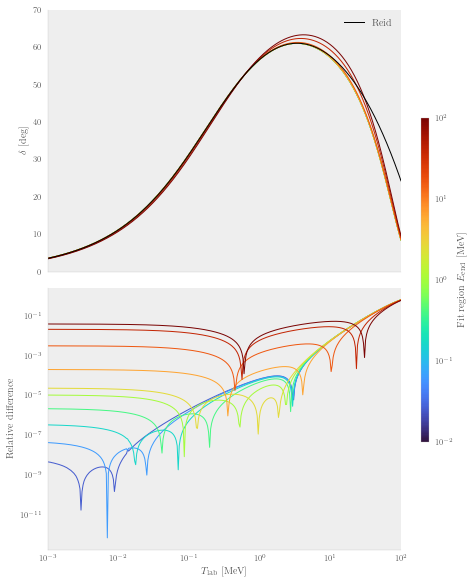

In [466]:
fig = ploteendfit(points, E, reid, VLOP, errpLOP)
savefig(fig, "LOP_pion_region_error.pdf")

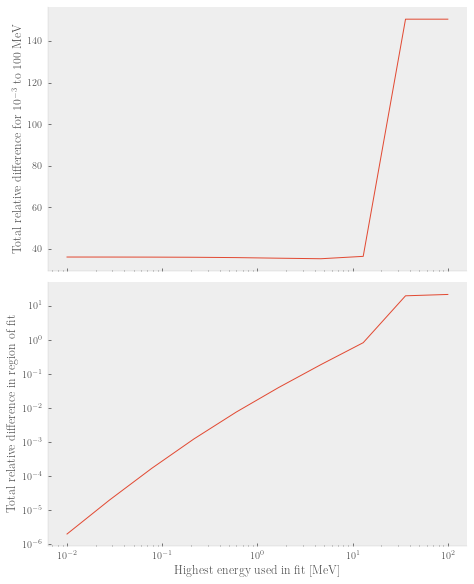

In [19]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
ax[1].plot(points, sum.(errpLOP))
ax[2].plot(points, errorsLOP)
ax[2].set_xlabel("Highest energy used in fit [MeV]")
ax[2].set_ylabel("Total relative difference in region of fit")
ax[1].set_ylabel(L"Total relative difference for $10^{-3}$ to $100$ MeV")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
#savefig(fig, "LO_dependence_points_error.pdf")

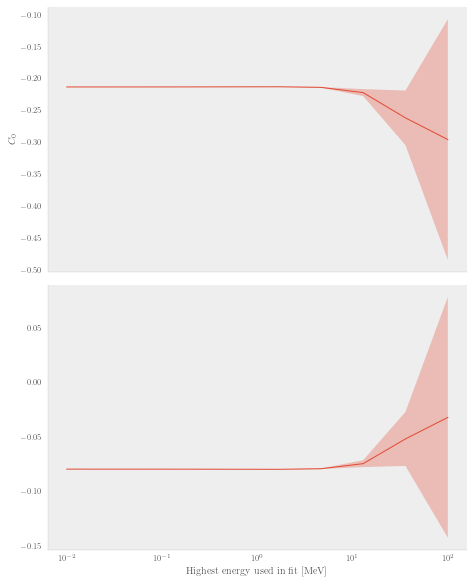

c0 = [fit.C[1] for fit = resLOP] = [-0.21425122603454377, -0.21424331799430352, -0.21422200357174034, -0.21416911107506556, -0.21406083602644393, -0.21397083308034145, -0.2148728328400013, -0.22312722686961334, -0.2628031491506183, -0.2968230630458174]
vpi = [fit.C[2] for fit = resLOP] = [-0.07997750995257552, -0.0799819341838847, -0.07999386305950335, -0.0800234904101956, -0.08008424485611107, -0.08013487963749208, -0.07962511187743478, -0.07493399570101386, -0.052135133633454976, -0.032317559709030656]


PyObject Text(16.055676710382944, 0.5, '$C_0$')

In [445]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
@show c0 = [fit.C[1] for fit in resLOP]
@show vpi = [fit.C[2] for fit in resLOP]
c0ci_0, c0ci_1 = zip([confidence_interval(fit.res, 0.05)[1] for fit in resLOP]...)
vpici_0, vpici_1 = zip([confidence_interval(fit.res, 0.05)[2] for fit in resLOP]...)
ax[1].fill_between(points, c0ci_0, c0ci_1, alpha=0.3)
ax[1].plot(points, c0)
ax[2].fill_between(points, vpici_0, vpici_1, alpha=0.3)
ax[2].plot(points, vpi)
ax[2].set_xlabel("Highest energy used in fit [MeV]")
ax[2].set_xscale("log")
ax[1].set_ylabel(L"C_0")
#savefig(fig, "LO_coeff_dependence_region.pdf")

### NLO

In [21]:
points = 10 .^(range(log10(1e-2), log10(10), length=20))
resNLOP = measureregionpion(NLO, [-0.5, 0.3], [0.1], points, 
    minlim=[-2, -2, 0.01], maxlim=[2, 2, 0.5]);

0.0%┣                                           ┫ 0/20 [00:00<00:-1, -20.0 it/s]
5.0%┣██▏                                        ┫ 1/20 [00:23<Inf:Inf, 0.0 it/s]
10.0%┣████▍                                       ┫ 2/20 [00:45<13:27, 0.0 it/s]
15.0%┣██████▋                                     ┫ 3/20 [01:07<09:26, 0.0 it/s]
20.0%┣████████▉                                   ┫ 4/20 [01:30<08:01, 0.0 it/s]
25.0%┣███████████                                 ┫ 5/20 [01:52<07:00, 0.0 it/s]
30.0%┣█████████████▏                              ┫ 6/20 [02:14<06:16, 0.0 it/s]
35.0%┣███████████████▍                            ┫ 7/20 [02:37<05:40, 0.0 it/s]
40.0%┣█████████████████▋                          ┫ 8/20 [02:45<04:43, 0.0 it/s]
45.0%┣███████████████████▉                        ┫ 9/20 [03:07<04:17, 0.0 it/s]
50.0%┣█████████████████████▌                     ┫ 10/20 [03:30<03:54, 0.0 it/s]
55.0%┣███████████████████████▋                   ┫ 11/20 [03:40<03:18, 0.0 it/s]
60.0%┣██████████████████████

In [22]:
for (point, res) in zip(points, resNLOP)
    @show point, res.C
end

(point, res.C) = (0.01, [-0.5605187990702021, 0.30468728032019493, 0.03710078052145167])
(point, res.C) = (0.01438449888287663, [-0.5598477221695672, 0.30720852392985465, 0.03623079444066899])
(point, res.C) = (0.0206913808111479, [-0.5510359988600146, 0.2987253690001342, 0.03330516285251466])
(point, res.C) = (0.029763514416313176, [-0.5545652478655717, 0.30195702372906474, 0.034510124877143666])
(point, res.C) = (0.04281332398719394, [-0.533893899200438, 0.2822096685543051, 0.0276352862027498])
(point, res.C) = (0.06158482110660264, [-0.5489092152445187, 0.29615177160210704, 0.03270839217151041])
(point, res.C) = (0.08858667904100828, [-0.506632202655375, 0.2561664074207371, 0.018623238316865392])
(point, res.C) = (0.12742749857031338, [-2.0, 2.0, 0.01])
(point, res.C) = (0.1832980710832436, [-0.8938576709850974, 0.739293479514604, 0.13724780337109305])
(point, res.C) = (0.26366508987303583, [-0.9033317093529051, 0.6569101136602583, 0.15216767218117935])
(point, res.C) = (0.379269019

In [23]:
E, reid, VNLOP, errpNLOP, errorsNLOP = computeerrors(resNLOP, stop=1e2);

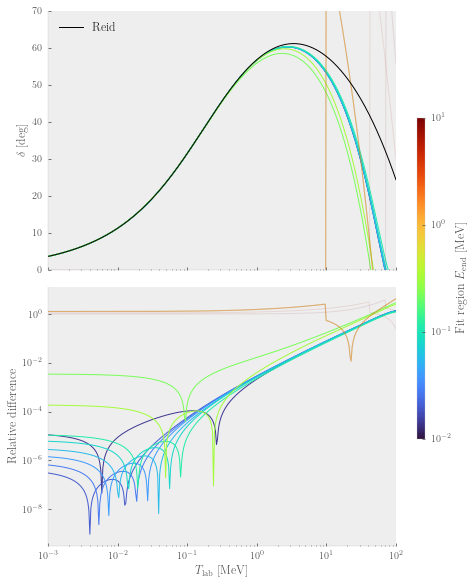

alphas = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1, 1.0, 1.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [31]:
fig = ploteendfit(points, E, reid, VNLOP, errpNLOP)
savefig(fig, "NLOP_region_error.pdf")

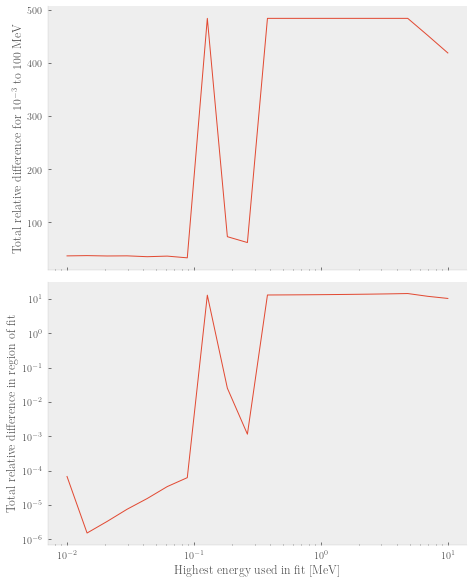

In [34]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
ax[1].plot(points, sum.(errpNLOP))
ax[2].plot(points, cumsum.(errorsNLOP))
ax[2].set_xlabel("Highest energy used in fit [MeV]")
ax[2].set_ylabel("Total relative difference in region of fit")
ax[1].set_ylabel(L"Total relative difference for $10^{-3}$ to $100$ MeV")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
#savefig(fig, "LO_dependence_points_error.pdf")

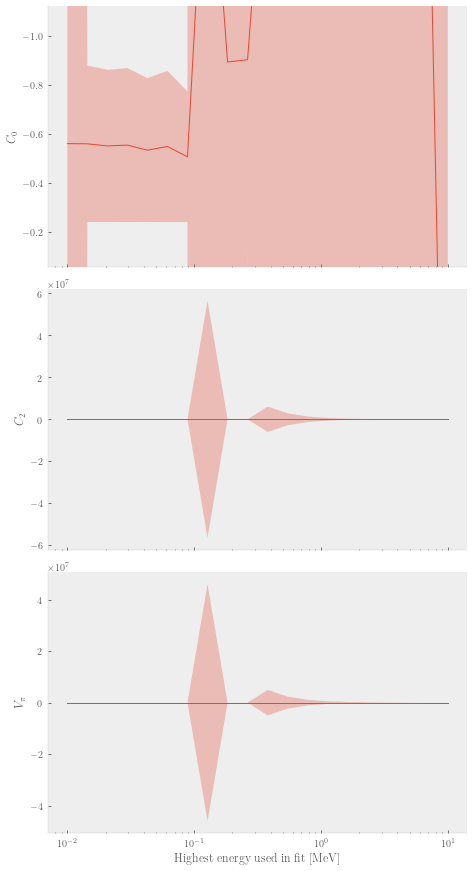

c0 = [fit.C[1] for fit = resNLOP] = [-0.5605187990702021, -0.5598477221695672, -0.5510359988600146, -0.5545652478655717, -0.533893899200438, -0.5489092152445187, -0.506632202655375, -2.0, -0.8938576709850974, -0.9033317093529051, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 2.0]
c2 = [fit.C[2] for fit = resNLOP] = [0.30468728032019493, 0.30720852392985465, 0.2987253690001342, 0.30195702372906474, 0.2822096685543051, 0.29615177160210704, 0.2561664074207371, 2.0, 0.739293479514604, 0.6569101136602583, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0]
vpi = [fit.C[end] for fit = resNLOP] = [0.03710078052145167, 0.03623079444066899, 0.03330516285251466, 0.034510124877143666, 0.0276352862027498, 0.03270839217151041, 0.018623238316865392, 0.01, 0.13724780337109305, 0.15216767218117935, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


(-0.05605187990702021, -1.1210375981404042)

In [41]:
fig, ax = newfig(nrows=3, sharex=true, constrained_layout=true)
@show c0 = [fit.C[1] for fit in resNLOP]
@show c2 = [fit.C[2] for fit in resNLOP]
@show vpi = [fit.C[end] for fit in resNLOP]
c0ci_0, c0ci_1 = zip([confidence_interval(fit.res, 0.05)[1] for fit in resNLOP]...)
c2ci_0, c2ci_1 = zip([confidence_interval(fit.res, 0.05)[2] for fit in resNLOP]...)
vpici_0, vpici_1 = zip([confidence_interval(fit.res, 0.05)[end] for fit in resNLOP]...)
ax[1].fill_between(points, c0ci_0, c0ci_1, alpha=0.3)
ax[1].plot(points, c0)
ax[2].fill_between(points, c2ci_0, c2ci_1, alpha=0.3)
ax[2].plot(points, c2)
ax[end].fill_between(points, vpici_0, vpici_1, alpha=0.3)
ax[end].plot(points, vpi)
ax[end].set_xlabel("Highest energy used in fit [MeV]")
ax[end].set_xscale("log")
ax[1].set_ylabel(L"C_0")
ax[2].set_ylabel(L"C_2")
ax[end].set_ylabel(L"V_{\pi}")
ax[1].set_ylim(0.1c0[1], 2c0[1])
#savefig(fig, "LO_coeff_dependence_region.pdf")

### NNLO

In [ ]:
E_fit, δReid_fit = computephase(Reid());
MSE(x, y) = mean((x.-y).^2)

function makeerrorfunctionpion(V; method::Scattering.Method=KMatrix(50), Λ=0.8)
    function error(coeffs)::Float64
        C = coeffs[1:end-1]
        Vπ = coeffs[end]
        W = regularize(V(C...) + Pion(Vπ), Λ)
        _, δ = computephase(W, method)
        MSE(δ, δReid_fit)
    end
    return error
end
makeerrorfunctionpion(V::Potential, m::Scattering.Method; kwargs...) = makeerrorfunctionpion(V; method=m, kwargs...)

Study the impact of $V_{\pi}$

In [ ]:
Vπs = -0.1:0.01:0.1
δs = []
for Vπ in Vπs
    V = regularize(LO(C0) + Pion(Vπ), 0.8)
    E, δ = rmatrix(V, endpoint=5)
    push!(δs, δ)
end

In [ ]:
fig, ax = plt.subplots()
cm = cmap("RdBu", length(Vπs))
E, δReid = rmatrix(Reid(), endpoint=5)
E, δLO = rmatrix(regularize(LO(C0), 0.8), endpoint=5)
E, δLO2 = rmatrix(regularize(LO(-0.53), 0.7), endpoint=5)

ax.plot(E, δReid, color="k", "-", label="Reid")
ax.plot(E, δLO2, color="k", "--", zorder=10, label="LO 0.7")
ax.plot(E, δLO, color="k", "-.", zorder=10, label="LO 0.8")
for i in 1:length(Vπs)
    ax.plot(E, δs[i], color=cm[i])
end
ax.set_ylim((0, 70))
ax.legend()
mpl = pyimport("matplotlib")
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=mpl.colors.Normalize(vmin=minimum(Vπs), vmax=maximum(Vπs)))
plt.colorbar(sm, ax=ax, label=L"$V_{\pi}$") 

## Dependence on $\Lambda$

### Setup

### LO

In [164]:
lambdasLOPion = range(50, 300, length=50)/197
resLOPion = measurelambda(LO, [-0.5], [0.1], lambdasLOPion);

0.0%┣                                           ┫ 0/50 [00:00<00:-3, -20.0 it/s]
2.0%┣▉                                          ┫ 1/50 [00:01<Inf:Inf, 0.0 it/s]
4.0%┣█▉                                           ┫ 2/50 [00:01<01:01, 0.8 it/s]
6.0%┣██▊                                          ┫ 3/50 [00:02<00:41, 1.1 it/s]
8.0%┣███▋                                         ┫ 4/50 [00:02<00:35, 1.3 it/s]
10.0%┣████▍                                       ┫ 5/50 [00:03<00:31, 1.4 it/s]
12.0%┣█████▎                                      ┫ 6/50 [00:03<00:28, 1.5 it/s]
14.0%┣██████▏                                     ┫ 7/50 [00:04<00:26, 1.6 it/s]
16.0%┣███████                                     ┫ 8/50 [00:04<00:25, 1.7 it/s]
18.0%┣████████                                    ┫ 9/50 [00:05<00:24, 1.7 it/s]
20.0%┣████████▋                                  ┫ 10/50 [00:05<00:24, 1.7 it/s]
22.0%┣█████████▌                                 ┫ 11/50 [00:06<00:23, 1.7 it/s]
24.0%┣██████████▎           

In [180]:
E, reid, VLOP, errpLOp, errorLOp = computerrors(resLOPion);
eminLOp = argmin(errorLOp)
@show 197errorLOp[eminLOp]
@show bestlambda = 197lambdasLOPion[eminLOp]

197 * errorLOp[eminLOp] = 0.03302518615644774
bestlambda = 197 * lambdasLOPion[eminLOp] = 218.3673469387755


218.3673469387755

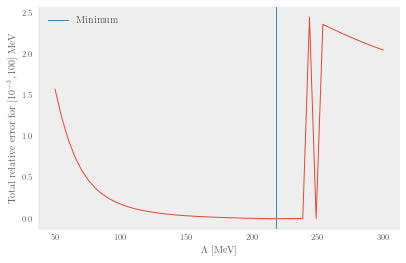

In [184]:
lambda = 197lambdasLOPion# .|> toenergy
fig, ax = newfig()
#ax2 = twinscale(ax, func=tomomentum)
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
ax.plot(lambda, errorLOp)
ax.axvline(lambda[eminLOp], color="C1", label="Minimum")
ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
ax.set_xlabel(L"$\Lambda$ [MeV]")
ax.legend()
savefig(fig, "lambda_LO_pion_err.pdf")
#fig, ax = newfig()
#ax.plot(lambda, errpLO .|> sum)

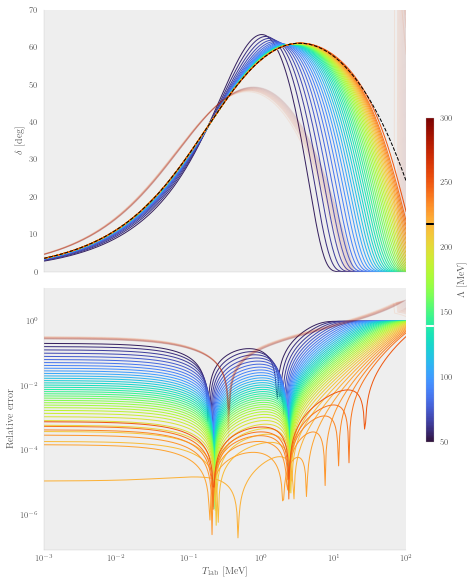

In [185]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
#ax2 = twinscale(ax, func=x->196/(x))
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
cmap_ = "turbo"
norm = plt.matplotlib.colors.Normalize(vmin=minimum(lambda), vmax=maximum(lambda))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(lambda)) #cmap(sm, length(Vs))
alphas = map(x -> if findjump(x) 0.1 else 1.0 end, VLOP)

for (i, v) in VLOP |> enumerate
    ax1.plot(E, v, color=cm[i], alpha=alphas[i])
end
ax1.plot(E, reid, "k--", lw=1)

for (i, err) in errpLOp |> enumerate
    ax2.plot(E, err, color=cm[i], alpha=alphas[i])
end
ax1.set_ylim(0, 70)
ax1.set_xlim(1e-3, 100)
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative error")
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"$\Lambda$ [MeV]")
cbarxlim = cbar.ax.get_xlim()
cbar.ax.plot(cbarxlim, [139.6, 139.6], "w", lw=2)
cbar.ax.plot(cbarxlim, [bestlambda, bestlambda], "k-", lw=2)
#ax.axvline(lambdasLO[eminLO], color="C1", label="Minimum")
#ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
#ax.set_xlabel(L"$\Lambda$ [fm$^{-1}$]")
savefig(fig, "lambda_LO_pion.pdf")

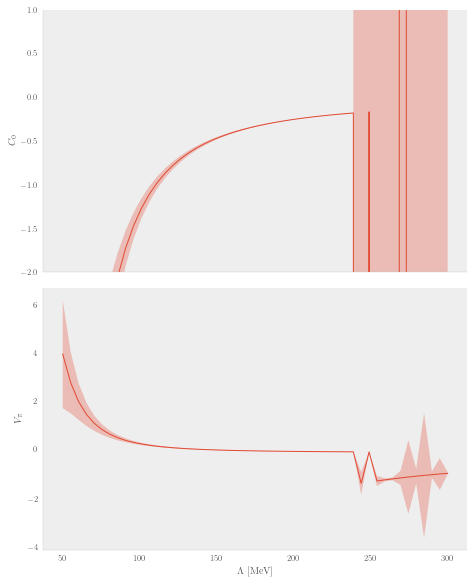

In [173]:
fig, (ax1, ax2) = newfig(nrows=2, sharex=true, constrained_layout=true)
plotci(resLOPion, 1, ax1, lambda)
plotci(resLOPion, 2, ax2, lambda)
ax2.set_xlabel(L"$\Lambda$ [MeV]")
ax1.set_ylabel(L"C_0")
ax2.set_ylabel(L"V_\pi")
ax1.set_ylim((-2, 1))
savefig(fig, "lambda_coeff_LO_pion.pdf")

In [189]:
printci(resLOPion, 1, eminLOp) |> println
printci(resLOPion, 2, eminLOp) |> println

(low, high) = (-0.21359211715100207, -0.21340095617218735)
("{-0.21350}^{0.00010}_{0.00010}", "\\num{-0.21350 +- 0.00010}")
(low, high) = (-0.08023642295590279, -0.08012780489633912)
("{-0.08018}^{0.00005}_{0.00005}", "\\num{-0.08018 +- 0.00005}")


### NLO

In [174]:
lambdasNLOPion = range(100, 500, length=10)/197
resNLOPion = measurelambda(NLO, [-0.5, 0.3], [0.1], lambdasNLOPion);

0.0%┣                                           ┫ 0/10 [00:00<00:-1, -20.0 it/s]
10.0%┣████▏                                     ┫ 1/10 [00:01<Inf:Inf, 0.0 it/s]
20.0%┣████████▉                                   ┫ 2/10 [00:02<00:13, 0.6 it/s]
30.0%┣█████████████▏                              ┫ 3/10 [00:03<00:09, 0.8 it/s]
40.0%┣█████████████████▋                          ┫ 4/10 [00:06<00:11, 0.5 it/s]
50.0%┣██████████████████████                      ┫ 5/10 [00:12<00:15, 0.3 it/s]
60.0%┣██████████████████████████▍                 ┫ 6/10 [00:30<00:24, 0.2 it/s]
70.0%┣██████████████████████████████▉             ┫ 7/10 [00:52<00:26, 0.1 it/s]
80.0%┣███████████████████████████████████▏        ┫ 8/10 [01:22<00:23, 0.1 it/s]
90.0%┣███████████████████████████████████████▋    ┫ 9/10 [01:23<00:10, 0.1 it/s]
100.0%┣██████████████████████████████████████████┫ 10/10 [01:23<00:00, 0.1 it/s]
100.0%┣██████████████████████████████████████████┫ 10/10 [01:23<00:00, 0.1 it/s]



In [175]:
E, reid, VNLOP, errpNLOp, errorNLOp = computerrors(resNLOPion);
eminNLOp = argmin(errorNLOp)
@show errorLOp[eminNLOp]
@show bestlambda = 197lambdasNLOPion[eminNLOp]

errorLOp[eminNLOp] = 0.3028206829877571
bestlambda = 197 * lambdasNLOPion[eminNLOp] = 411.1111111111111


411.1111111111111

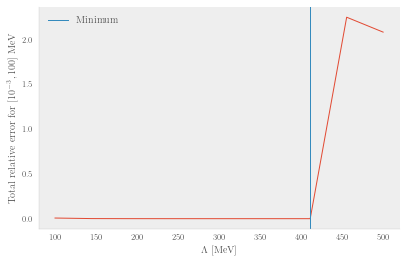

In [207]:
lambda = 197lambdasNLOPion# .|> toenergy
fig, ax = newfig()
#ax2 = twinscale(ax, func=tomomentum)
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
ax.plot(lambda, errorNLOp)
ax.axvline(lambda[eminNLOp], color="C1", label="Minimum")
ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
ax.set_xlabel(L"$\Lambda$ [MeV]")
ax.legend()
savefig(fig, "lambda_NLO_pion_err.pdf")

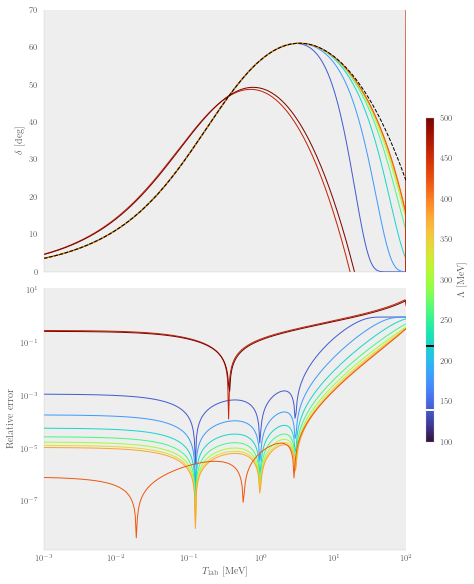

In [183]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
#ax2 = twinscale(ax, func=x->196/(x))
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
cmap_ = "turbo"
norm = plt.matplotlib.colors.Normalize(vmin=minimum(lambda), vmax=maximum(lambda))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(lambda)) #cmap(sm, length(Vs))
alphas = map(x -> if findjump(x) 1.0 else 1.0 end, VNLOP)

for (i, v) in VNLOP |> enumerate
    ax1.plot(E, v, color=cm[i], alpha=alphas[i])
end
ax1.plot(E, reid, "k--", lw=1)

for (i, err) in errpNLOp |> enumerate
    ax2.plot(E, err, color=cm[i], alpha=alphas[i])
end
ax1.set_ylim(0, 70)
ax1.set_xlim(1e-3, 100)
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative error")
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"$\Lambda$ [MeV]")
cbarxlim = cbar.ax.get_xlim()
cbar.ax.plot(cbarxlim, [139.6, 139.6], "w", lw=2)
cbar.ax.plot(cbarxlim, [bestlambda, bestlambda], "k-", lw=2)
#ax.axvline(lambdasLO[eminLO], color="C1", label="Minimum")
#ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
#ax.set_xlabel(L"$\Lambda$ [fm$^{-1}$]")
savefig(fig, "lambda_NLO_pion.pdf")

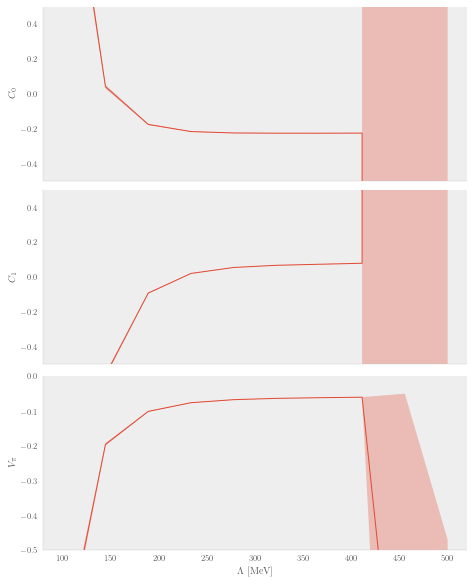

In [208]:
fig, (ax1, ax2, ax3) = newfig(nrows=3, sharex=true, constrained_layout=true, height=2/3)
plotci(resNLOPion, 1, ax1, lambda)
plotci(resNLOPion, 2, ax2, lambda)
plotci(resNLOPion, 3, ax3, lambda)
ax3.set_xlabel(L"$\Lambda$ [MeV]")
ax1.set_ylabel(L"C_0")
ax2.set_ylabel(L"C_1")
ax1.set_ylim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)
ax3.set_ylim(-0.5, 0)
ax3.set_ylabel(L"V_\pi")
#ax1.set_ylim((-2, 1))
savefig(fig, "lambda_coeff_NLO_pion.pdf")

In [188]:
printci(resNLOPion, 1, eminNLOp) |> println
printci(resNLOPion, 2, eminNLOp) |> println
printci(resNLOPion, 3, eminNLOp) |> println

(low, high) = (-0.22690945757439582, -0.2253403690834607)
("{-0.2261}^{0.0008}_{0.0008}", "\\num{-0.2261 +- 0.0008}")
(low, high) = (0.07915411011826773, 0.08031104660711055)
("{0.0797}^{0.0006}_{0.0006}", "\\num{0.0797 +- 0.0006}")
(low, high) = (-0.06035204750800998, -0.059781364715354536)
("{-0.0601}^{0.0003}_{0.0003}", "\\num{-0.0601 +- 0.0003}")


In [117]:
plt.matplotlib.style.use("rapport")

### NNLO

In [279]:
lambdasNNLOPion = range(100, 1000, length=20)/197
resNNLOPion = measurelambda(NNLO, [-0.5, 0.3, 0.1, 0.1], [0.1], lambdasNNLOPion, endpoint=10);

0.0%┣                                           ┫ 0/20 [00:00<00:-1, -20.0 it/s]
5.0%┣██▏                                        ┫ 1/20 [00:05<Inf:Inf, 0.0 it/s]
10.0%┣████▍                                       ┫ 2/20 [00:52<15:31, 0.0 it/s]
15.0%┣██████▋                                     ┫ 3/20 [01:50<15:36, 0.0 it/s]
20.0%┣████████▉                                   ┫ 4/20 [02:37<13:56, 0.0 it/s]
25.0%┣███████████                                 ┫ 5/20 [03:10<11:52, 0.0 it/s]
30.0%┣█████████████▏                              ┫ 6/20 [03:12<08:57, 0.0 it/s]
35.0%┣███████████████▍                            ┫ 7/20 [03:54<08:28, 0.0 it/s]
40.0%┣█████████████████▋                          ┫ 8/20 [04:21<07:27, 0.0 it/s]
45.0%┣███████████████████▉                        ┫ 9/20 [05:18<07:17, 0.0 it/s]
50.0%┣█████████████████████▌                     ┫ 10/20 [05:20<05:55, 0.0 it/s]
55.0%┣███████████████████████▋                   ┫ 11/20 [06:10<05:33, 0.0 it/s]
60.0%┣██████████████████████

In [225]:
E, reid, VNNLOP, errpNNLOp, errorNNLOp = computerrors(resNNLOPion);
eminNNLOp = argmin(errorNNLOp)
@show errorLOp[eminNNLOp]
@show bestlambda = 197lambdasNNLOPion[eminNNLOp]

errorLOp[eminNNLOp] = 1.2311145165588218
bestlambda = 197 * lambdasNNLOPion[eminNNLOp] = 147.3684210526316


147.3684210526316

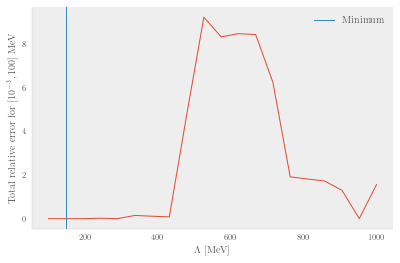

In [226]:

lambda = 197lambdasNNLOPion# .|> toenergy
fig, ax = newfig()
#ax2 = twinscale(ax, func=tomomentum)
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
ax.plot(lambda, errorNNLOp)
ax.axvline(lambda[eminNNLOp], color="C1", label="Minimum")
ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
ax.set_xlabel(L"$\Lambda$ [MeV]")
ax.legend()
savefig(fig, "lambda_NNLO_pion_err.pdf")

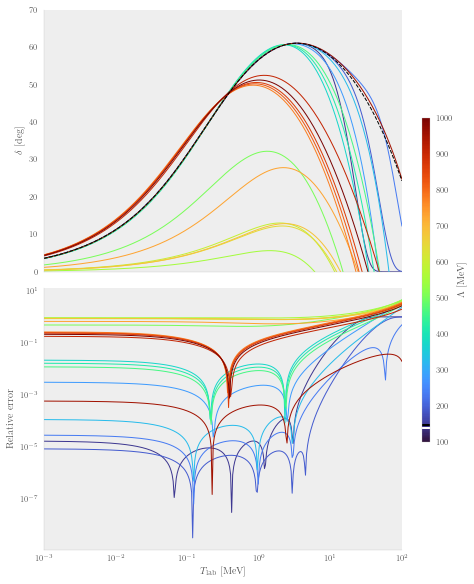

In [227]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
#ax2 = twinscale(ax, func=x->196/(x))
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
cmap_ = "turbo"
norm = plt.matplotlib.colors.Normalize(vmin=minimum(lambda), vmax=maximum(lambda))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(lambda)) #cmap(sm, length(Vs))
alphas = map(x -> if findjump(x) 1.0 else 1.0 end, VNNLOP)

for (i, v) in VNNLOP |> enumerate
    ax1.plot(E, v, color=cm[i], alpha=alphas[i])
end
ax1.plot(E, reid, "k--", lw=1)

for (i, err) in errpNNLOp |> enumerate
    ax2.plot(E, err, color=cm[i], alpha=alphas[i])
end
ax1.set_ylim(0, 70)
ax1.set_xlim(1e-3, 100)
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative error")
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"$\Lambda$ [MeV]")
cbarxlim = cbar.ax.get_xlim()
cbar.ax.plot(cbarxlim, [139.6, 139.6], "w", lw=2)
cbar.ax.plot(cbarxlim, [bestlambda, bestlambda], "k-", lw=2)
#ax.axvline(lambdasLO[eminLO], color="C1", label="Minimum")
#ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
#ax.set_xlabel(L"$\Lambda$ [fm$^{-1}$]")
savefig(fig, "lambda_NNLO_pion.pdf")

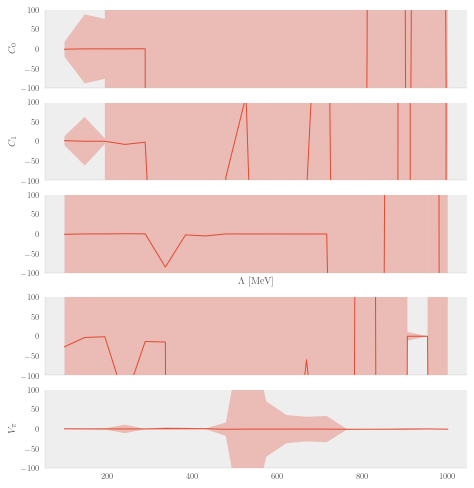

In [230]:
fig, (ax1, ax2, ax3, ax4, ax5) = newfig(nrows=5, sharex=true, constrained_layout=true, height=1/3)
plotci(resNNLOPion, 1, ax1, lambda)
plotci(resNNLOPion, 2, ax2, lambda)
plotci(resNNLOPion, 3, ax3, lambda)
plotci(resNNLOPion, 4, ax4, lambda)
plotci(resNNLOPion, 5, ax5, lambda)
ax3.set_xlabel(L"$\Lambda$ [MeV]")
ax1.set_ylabel(L"C_0")
ax2.set_ylabel(L"C_1")
n  = 100
ax1.set_ylim(-n, n)
ax2.set_ylim(-n, n)
ax3.set_ylim(-n, n)
ax4.set_ylim(-n, n)
ax5.set_ylim(-n, n)
ax5.set_ylabel(L"V_\pi")
#ax1.set_ylim((-2, 1))
savefig(fig, "lambda_coeff_NNLO_pion.pdf")

### Pure Pion

In [198]:
lambdasPion = range(50, 1500, length=100)/197
resPion = measurelambda(Pion, [0.1], lambdasPion);

0.0%┣                                          ┫ 0/100 [00:00<00:-5, -20.0 it/s]
1.0%┣▍                                         ┫ 1/100 [00:00<Inf:Inf, 0.0 it/s]
2.0%┣▉                                           ┫ 2/100 [00:00<00:48, 2.1 it/s]
3.0%┣█▎                                          ┫ 3/100 [00:01<00:32, 3.0 it/s]
4.0%┣█▊                                          ┫ 4/100 [00:01<00:27, 3.5 it/s]
5.0%┣██▏                                         ┫ 5/100 [00:01<00:25, 3.7 it/s]
6.0%┣██▋                                         ┫ 6/100 [00:01<00:25, 3.8 it/s]
7.0%┣███                                         ┫ 7/100 [00:02<00:23, 4.0 it/s]
8.0%┣███▌                                        ┫ 8/100 [00:02<00:22, 4.1 it/s]
9.0%┣████                                        ┫ 9/100 [00:02<00:22, 4.1 it/s]
10.0%┣████▏                                     ┫ 10/100 [00:02<00:21, 4.2 it/s]
11.0%┣████▋                                     ┫ 11/100 [00:02<00:21, 4.2 it/s]
12.0%┣█████                 

In [211]:
E, reid, VP, errpP, errorP = computerrors(resPion);
eminP = argmin(errorP)
@show errorP[eminP]
@show bestlambda = 197lambdasPion[eminP]

errorP[eminP] = 0.2410889170663249
bestlambda = 197 * lambdasPion[eminP] = 1500.0


1500.0

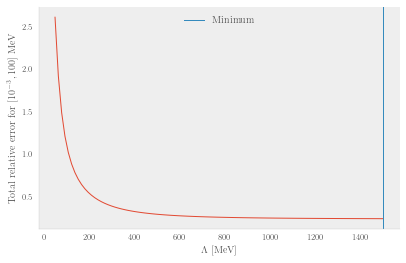

In [212]:
lambda = 197lambdasPion# .|> toenergy
fig, ax = newfig()
#ax2 = twinscale(ax, func=tomomentum)
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
ax.plot(lambda, errorP)
ax.axvline(lambda[eminP], color="C1", label="Minimum")
ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
ax.set_xlabel(L"$\Lambda$ [MeV]")
ax.legend()
savefig(fig, "lambda_pion_err.pdf")

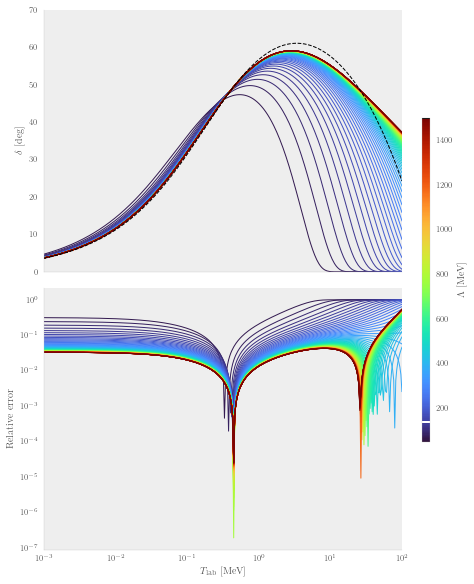

In [213]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
#ax2 = twinscale(ax, func=x->196/(x))
#ax2.set_xlabel(L"$\Lambda$ [MeV]")
cmap_ = "turbo"
norm = plt.matplotlib.colors.Normalize(vmin=minimum(lambda), vmax=maximum(lambda))
sm = plt.cm.ScalarMappable(cmap=cmap_, norm=norm)
cm = cmap(sm.cmap, length(lambda)) #cmap(sm, length(Vs))
alphas = map(x -> if findjump(x) 1.0 else 1.0 end, VP)

for (i, v) in VP |> enumerate
    ax1.plot(E, v, color=cm[i], alpha=alphas[i])
end
ax1.plot(E, reid, "k--", lw=1)

for (i, err) in errpP |> enumerate
    ax2.plot(E, err, color=cm[i], alpha=alphas[i])
end
ax1.set_ylim(0, 70)
ax1.set_xlim(1e-3, 100)
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative error")
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
cbar = fig.colorbar(sm, ax=(ax1, ax2), shrink=0.6)#, location="right")
cbar.ax.set_ylabel(L"$\Lambda$ [MeV]")
cbarxlim = cbar.ax.get_xlim()
cbar.ax.plot(cbarxlim, [139.6, 139.6], "w", lw=2)
cbar.ax.plot(cbarxlim, [bestlambda, bestlambda], "k-", lw=2)
#ax.axvline(lambdasLO[eminLO], color="C1", label="Minimum")
#ax.set_ylabel(L"Total relative error for [$10^{-3}, 100$] MeV")
#ax.set_xlabel(L"$\Lambda$ [fm$^{-1}$]")
savefig(fig, "lambda_pion.pdf")

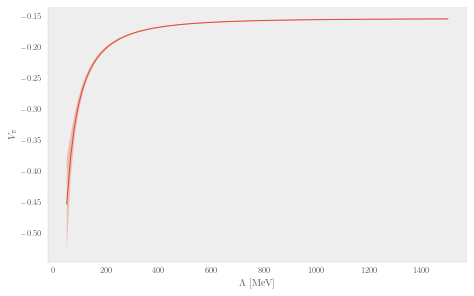

In [215]:
fig, ax = newfig(nrows=1, sharex=true, constrained_layout=true)
plotci(resPion, 1, ax, lambda)
ax.set_xlabel(L"$\Lambda$ [MeV]")
ax.set_ylabel(L"V_\pi")
#ax1.set_ylim((-2, 1))
savefig(fig, "lambda_coeff_pion.pdf")

In [206]:
printci(resPion, 1, eminP) |> println

(low, high) = (-0.15727635978346655, -0.15622945425179208)
("{-0.1568}^{0.0005}_{0.0005}", "\\num{-0.1568 +- 0.0005}")


### Summary

#### Common Lambda

In [274]:
Λ = 218/197
endpoint = 1e-1
p = Params(1e-3, endpoint, 10, [Λ])
Cpi = [0.1]
LOfp = FitParamsPion(p, LO, [-0.5], Cpi, method=:LsqFit)
NLOfp = FitParamsPion(p, NLO, [-0.2, 0.08], Cpi, method=:LsqFit)
Pionfp = FitParamsPurePion(p, Cpi)
#NNLOfp = FitParams(p, NNLO, coeffs, Cpi, method=:LsqFit)
resLO = fit(LOfp)
resNLO = fit(NLOfp)
resPion = fit(Pionfp);


In [275]:
E, reid, V, err, errors = computerrors([resPion, resLO, resNLO]);

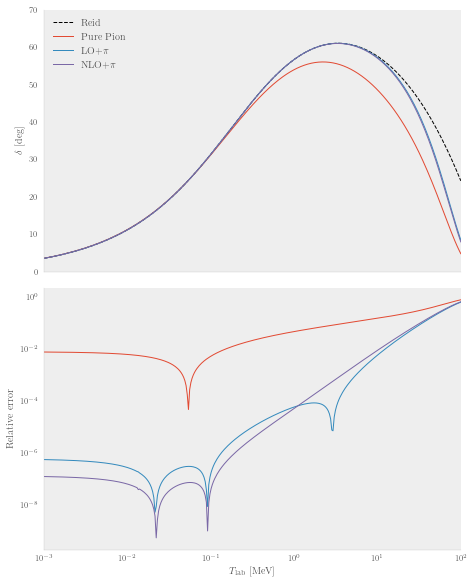

In [276]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
ax1.plot(E, reid, "k--", label="Reid")
ax1.plot(E, V[1], label="Pure Pion")
ax1.plot(E, V[2], label=L"LO+$\pi$")
ax1.plot(E, V[3], label=L"NLO+$\pi$")

ax2.plot(E, err[1], label="Pure Pion")
ax2.plot(E, err[2], label=L"LO+$\pi$")
ax2.plot(E, err[3], label=L"NLO+$\pi$")

ax1.set_ylim(0, 70)
ax1.set_xlim(1e-3, 100)
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative error")
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
ax1.legend()
savefig(fig, "summary_pion_common.pdf")

#### Best Lambdas

In [277]:
endpoint = 1e-2
pPion = Params(1e-3, endpoint, 10, [10])
pLO = Params(1e-3, endpoint, 10, [218.3/197])
pNLO = Params(1e-3, endpoint, 10, [411.1/197])
Cpi = [0.1]
LOfp = FitParamsPion(pLO, LO, [-0.5], Cpi, method=:LsqFit)
NLOfp = FitParamsPion(pNLO, NLO, [-0.2, 0.08], Cpi, method=:LsqFit)
Pionfp = FitParamsPurePion(pPion, Cpi)
#NNLOfp = FitParams(p, NNLO, coeffs, Cpi, method=:LsqFit)
resLO = fit(LOfp)
resNLO = fit(NLOfp)
resPion = fit(Pionfp);
E, reid, V, err, errors = computerrors([resPion, resLO, resNLO]);

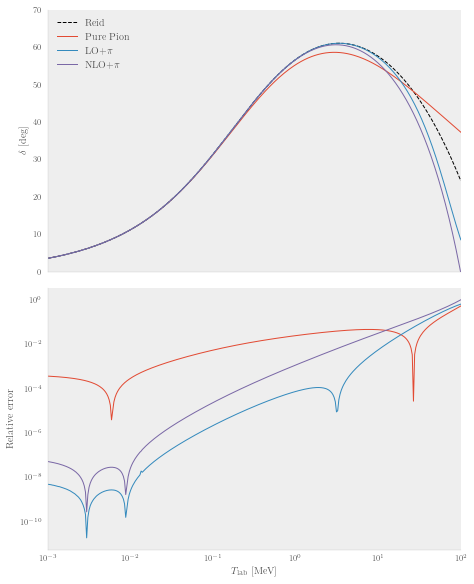

In [278]:
fig, (ax1, ax2) = newfig(nrows=2, constrained_layout=true, sharex=true)
ax1.plot(E, reid, "k--", label="Reid")
ax1.plot(E, V[1], label="Pure Pion")
ax1.plot(E, V[2], label=L"LO+$\pi$")
ax1.plot(E, V[3], label=L"NLO+$\pi$")

ax2.plot(E, err[1], label="Pure Pion")
ax2.plot(E, err[2], label=L"LO+$\pi$")
ax2.plot(E, err[3], label=L"NLO+$\pi$")

ax1.set_ylim(0, 70)
ax1.set_xlim(1e-3, 100)
ax1.set_xscale("log")
ax2.set_yscale("log")
ax1.set_ylabel(L"$\delta$ [deg]")
ax2.set_ylabel("Relative error")
ax2.set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
ax1.legend()
savefig(fig, "summary_pion_best.pdf")

# Actual Plots

## Dependence on fit region

### Some 

In [2]:
p = Params(1e-2)
fp = FitParams(p, LO, -1, 1)
fp = FitParams(p, LO, [-1], [1], [0.0], method=:LsqFit)
resLO = fit(fp)

fp = FitParams(p, NLO, [-2, -2], [2, 2], [-0.5, 0.0];
                method=:LsqFit)
resNLO = fit(fp)

@show confidence_interval(resLO.res, 0.05)
@show confidence_interval(resNLO.res, 0.05)

confidence_interval(resLO.res, 0.05) = [(-0.5308986920495616, -0.5308969327628409)]
confidence_interval(resNLO.res, 0.05) = [(-0.5405166923015016, -0.5405053698706098), (0.04800948028597335, 0.0480664628052222)]


2-element Vector{Tuple{Float64, Float64}}:
 (-0.5405166923015016, -0.5405053698706098)
 (0.04800948028597335, 0.0480664628052222)

In [3]:
fp = FitParams(p, NNLO,# [-1, -1, -2, -3], [1, 1, 1, 1], [-0.5, 0.4, -0.9, -3];
                C₀ = [-0.5, -0.03, -1.1, -1.8],
                method=:LsqFit)
resNNLO = fit(fp)
@show confidence_interval(resNNLO.res, 0.05)

confidence_interval(resNNLO.res, 0.05) = [(-24.561148039686895, 23.56756841717147), (-49.79156306283708, 49.90063847690555), (-380.67486482403973, 378.7000987331938), (-807.019978650022, 808.7696004168711)]


4-element Vector{Tuple{Float64, Float64}}:
 (-24.561148039686895, 23.56756841717147)
 (-49.79156306283708, 49.90063847690555)
 (-380.67486482403973, 378.7000987331938)
 (-807.019978650022, 808.7696004168711)

In [4]:
fp = FitParams(p, NNLO,[-1, -1, -2, -3], [1, 1, 1, 1], [-0.5, 0.4, -0.9, -3];
                method=:LsqFit)
resNNLO_const = fit(fp)

FitResult(FitParams(Params(0.001, 0.01, 50, [0.7]), NNLO, [-1.0, -1.0, -2.0, -3.0], [1.0, 1.0, 1.0, 1.0], [-0.5, 0.4, -0.9, -3.0], :LsqFit, Dict{Any, Any}(), Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()), LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([-0.5222472968105957, 0.37446016317704994, -1.1831261989960933, -1.8514115904894488], [-2.1084902224188795e-7, -2.0856317695105986e-7, -2.063185999823247e-7, -2.0358995911351485e-7, -2.0021994329155746e-7, -1.9603543766066878e-7, -1.9167993947633022e-7, -1.8652855526823942e-7, -1.804748546163637e-7, -1.7404996377479165e-7  …  2.3770076751361557e-7, 2.1515116088721697e-7, 1.8160779902132163e-7, 1.3506245366556868e-7, 7.314458727591955e-8, -6.921064610310168e-9, -1.0799675465023029e-7, -2.3365644352679737e-7, -3.878138254975738e-7, -5.750084213218543e-7], [-50.73076427630839 -11.170035514476707 -3.1327552039734536 -0.6148620849669564; -51.92553419664247 -11.4331666212519

In [6]:
p = Params(1e-3, 1e-2, 10, [1500/197])
fp = FitParamsPurePion(p, [0.1], method=:LsqFit)
res_pion = fit(fp)

FitResult(FitParamsPurePion(Params(0.001, 0.01, 10, [7.614213197969543]), Pion, [-Inf], [Inf], [0.1], :LsqFit, Dict{Any, Any}(), Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()), LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([-0.15624127602983529], [0.0013548827018254883, 0.0014478853077326548, 0.001511012926098232, 0.0015206476922271506, 0.001441134655847165, 0.0012192995797928319, 0.0007766662146657666, -1.4679616775481463e-6, -0.00128113937229557, -0.003300213339780811], [-224.0589507358457; -254.29028107383147; … ; -604.5154691801332; -680.0935056453751], true, Float64[]), [-0.15624127602983529])

In [7]:
p = Params(1e-3, 1e-2, 10, [218/197])
fp = FitParamsPion(p, LO, [-0.53], [0.1], method=:LsqFit)
resLO_pion = fit(fp)
p = Params(1e-3, 1e-2, 10, [400/197])
fp = FitParamsPion(p, NLO, [-0.5, 0.3], [0.1], method=:LsqFit)
    #minlim=[-2, -2, 0.01], maxlim=[2, 2, 0.5]);
resNLO_pion = fit(fp)

FitResult(FitParamsPion(Params(0.001, 0.01, 10, [2.030456852791878]), NLO, [-Inf, -Inf, -Inf], [Inf, Inf, Inf], [-0.5, 0.3], [0.1], :LsqFit, Dict{Any, Any}(), Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()), LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([-0.2761855215319374, 0.2656077971111694, -0.008739319504060426], [-2.168503261401611e-7, -2.0210648088436756e-7, -1.693872349051162e-7, -1.1297221202966057e-7, -2.8171653454478474e-8, 8.38968814420582e-8, 2.0707635428607318e-7, 2.9013501645636097e-7, 2.072241969131028e-7, -3.2024066420888175e-7], [-64.57379095043368 77.69470824526744 -160.44176745872218; -73.28921295940495 88.18080833497032 -182.09491246868174; … ; -174.36780356826583 209.78532701691242 -433.16050016737245; -196.22039059149927 236.07180886931664 -487.4166723949175], false, Float64[]), [-0.2761855215319374, 0.2656077971111694, -0.008739319504060426])

In [8]:
p = Params(1e-3, 1e-2, 50, [200/197])
fp = FitParamsPion(p, NNLO, [-0.5, 0.3, 0.1, 0.1], [0.1], method=:LsqFit)
    #minlim=[-0.5, -3, -0.1, -0.1, 0.01], maxlim=[2, 2, 1, 1, 0.5]);
resNNLO_pion = fit(fp)

FitResult(FitParamsPion(Params(0.001, 0.01, 50, [1.015228426395939]), NNLO, [-Inf, -Inf, -Inf, -Inf, -Inf], [Inf, Inf, Inf, Inf, Inf], [-0.5, 0.3, 0.1, 0.1], [0.1], :LsqFit, Dict{Any, Any}(), Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()), LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([-0.5604040928976933, 0.2843699213392889, -0.12563942128413563, 0.24715712186622765, 0.04131960080276375], [-4.6299630440671535e-7, -4.58477607878649e-7, -4.534451218951574e-7, -4.47335873232646e-7, -4.399534749843781e-7, -4.3108574043770886e-7, -4.2133463473703614e-7, -4.1003455297783375e-7, -3.970371329486966e-7, -3.828320238596916e-7  …  5.180119622139046e-7, 4.685511409974197e-7, 3.949697156002685e-7, 2.9283394731294266e-7, 1.5699473010499787e-7, -1.8501154386285634e-8, -2.4014537025607297e-7, -5.156502123071505e-7, -8.53642076137362e-7, -1.2640202928793087e-6], [-75.89135965120245 -29.149755861461667 … -2.799094248327595 -144.2680

In [9]:
@show confidence_interval(resLO_pion.res, 0.05)
@show confidence_interval(resNLO_pion.res, 0.05);
@show confidence_interval(resNNLO_pion.res, 0.05);

confidence_interval(resLO_pion.res, 0.05) = [(-0.2142520269840589, -0.2142504250852699), (-0.07997795803229964, -0.07997706187271646)]
confidence_interval(resNLO_pion.res, 0.05) = [(-0.5119510665804206, -0.040419976483454134), (-0.029158885513072774, 0.5603744797354115), (-0.05659180101648704, 0.03911316200836618)]
confidence_interval(resNNLO_pion.res, 0.05) = [(-78.21067535252797, 77.08986716673257), (-223.77965764555256, 224.34839748823111), (-619.0516824501559, 618.8004036075876), (-593.4992608960538, 593.9935751397863), (-45.3650592867307, 45.44769848833623)]


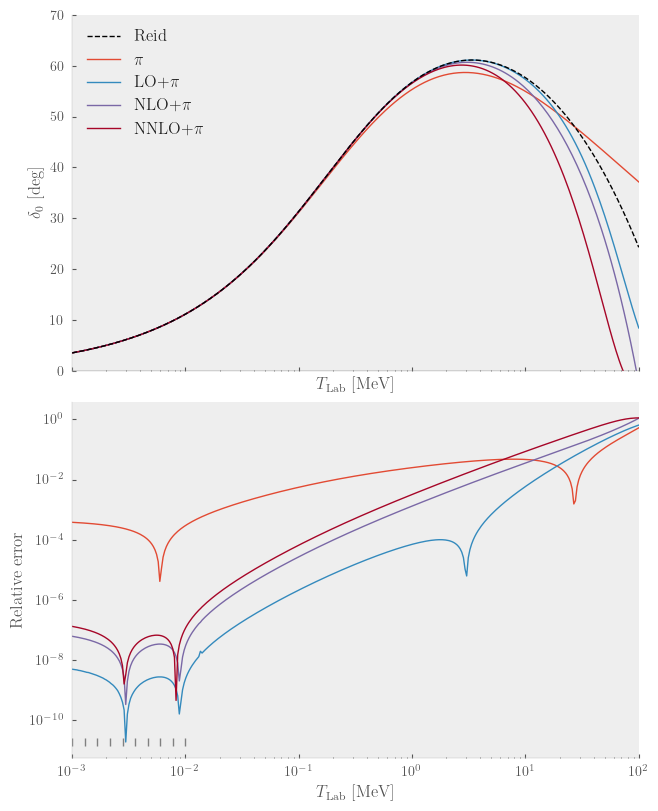

In [12]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
plotphase([res_pion, resLO_pion, resNLO_pion, resNNLO_pion], 1e-3, 1e2; ax=ax[1])
ploterror([res_pion, resLO_pion, resNLO_pion, resNNLO_pion], 1e-3, 1e2; ax=ax[2], region=false)
#plotphase(resNNLO_const, 1e-3, 1e2; ax=ax[1], label="NNLO Constrained")
#ploterror(resNNLO_const, 1e-3, 1e2; ax=ax[2], label="NNLO Constrained")
plotfitregion(resNLO_pion, ax[2])
ax[1].set_ylim([0, 70])
ax[1].legend(["Reid", L"\pi", L"LO$+\pi$", L"NLO$+\pi$", L"NNLO$+\pi$"])
ax[2].get_legend().remove()
savefig(fig, "low_energies.pdf")

In [16]:
function findO(res)
    E, d = error(res, 1e-3, 1e2)
    start = argmin(abs.(E.-1e-1))
    stop = argmin(abs.(E.-1e1))
    y = d[start:stop] .|> log10
    x = E[start:stop] .|> log10;
    (a, b, _) = scipy.linregress(x, y)
    @show a
    fig, ax = newfig()
    ax.plot(E, d)
    ax.plot(E, @. E^a * 10^b)
    ax.set_xscale("log")
    ax.set_yscale("log")
end
findO(resNLO)

LoadError: [91mUndefVarError: scipy not defined[39m

### Low

In [36]:
p = Params(1e-1)
fp = FitParams(p, LO, -1, 1)
fp = FitParams(p, LO, [-1], [1], [0.0], method=:LsqFit)
resLO = fit(fp)

fp = FitParams(p, NLO, [-2, -2], [2, 2], [-0.5, 0.0];
                method=:LsqFit)
resNLO = fit(fp)

@show confidence_interval(resLO.res, 0.05)
@show confidence_interval(resNLO.res, 0.05)

confidence_interval(resLO.res, 0.05) = [(-0.5308626265989727, -0.5308445738492307)]
confidence_interval(resNLO.res, 0.05) = [(-0.5398462576224211, -0.5397195340323252), (0.04406392513540006, 0.044697884250871685)]


2-element Vector{Tuple{Float64, Float64}}:
 (-0.5398462576224211, -0.5397195340323252)
 (0.04406392513540006, 0.044697884250871685)

In [37]:
fp = FitParams(p, NNLO,# [-1, -1, -2, -3], [1, 1, 1, 1], [-0.5, 0.4, -0.9, -3];
                C₀ = [-0.5, -0.03, -1.1, -1.8],
                method=:LsqFit)
resNNLO = fit(fp)
@show confidence_interval(resNNLO.res, 0.05)

confidence_interval(resNNLO.res, 0.05) = [(-122.01512620545046, 121.01876455003753), (-203.47300765712134, 204.18977902474074), (-1898.560990246324, 1895.305865924079), (-3849.105697214456, 3846.663053025163)]


4-element Vector{Tuple{Float64, Float64}}:
 (-122.01512620545046, 121.01876455003753)
 (-203.47300765712134, 204.18977902474074)
 (-1898.560990246324, 1895.305865924079)
 (-3849.105697214456, 3846.663053025163)

In [38]:
fp = FitParams(p, NNLO,[-1, -1, -2, -3], [1, 1, 1, 1], [-0.5, 0.4, -0.9, -3];
                method=:LsqFit)
resNNLO_const = fit(fp)

FitResult(FitParams(Params(0.001, 0.1, 50, [0.7]), NNLO, [-1.0, -1.0, -2.0, -3.0], [1.0, 1.0, 1.0, 1.0], [-0.5, 0.4, -0.9, -3.0], :LsqFit, Dict{Any, Any}(), Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()), LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([-0.5247373344211452, 0.49409665459239405, -1.406023565780764, -2.669243940105152], [-6.927942080903193e-6, -7.211140019780515e-6, -7.501023771894211e-6, -7.7962126949771e-6, -8.095798832208345e-6, -8.398897714201325e-6, -8.70403780783846e-6, -9.009237869506137e-6, -9.312817228490644e-6, -9.612003182724038e-6  …  2.1128751740207008e-5, 2.286022025188572e-5, 2.3659424982724886e-5, 2.3106592738741938e-5, 2.066891693885964e-5, 1.567719214889962e-5, 7.299150489359363e-6, -5.4945068477252335e-6, -2.3948250017724604e-5, -4.959397543302657e-5], [-51.38566069658664 -11.519719159115693 -3.281179438288629 -0.6456272448183673; -53.83401872143396 -12.068734328188134 -3.437535520412

In [6]:
p = Params(1e-3, 1e-1, 10, [1500/197])
fp = FitParamsPurePion(p, [0.1], method=:LsqFit)
res_pion = fit(fp)

FitResult(FitParamsPurePion(Params(0.001, 0.1, 10, [7.614213197969543]), Pion, [-Inf], [Inf], [0.1], :LsqFit, Dict{Any, Any}(), Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()), LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([-0.15629905407229644], [0.01434346010735199, 0.01823430555714367, 0.022928780560957485, 0.028292486461684696, 0.03375877138535088, 0.03782648733331406, 0.0371474059379473, 0.025096420704407763, -0.009903406221649647, -0.08510775829330441], [-225.54610999607928; -290.39630326471183; … ; -1369.160725622546; -1542.4482877319458], true, Float64[]), [-0.15629905407229644])

In [2]:
p = Params(1e-3, 1e-1, 10, [250/197])
fp = FitParamsPion(p, LO, [-0.53], [0.1], method=:LsqFit)
resLO_pion = fit(fp)
p = Params(1e-3, 1e-1, 10, [250/197])
fp = FitParamsPion(p, NLO, [-0.5, 0.3], [0.1], method=:LsqFit)
    #minlim=[-2, -2, 0.01], maxlim=[2, 2, 0.5]);
resNLO_pion = fit(fp)

FitResult(FitParamsPion(Params(0.001, 0.1, 10, [1.2690355329949239]), NLO, [-Inf, -Inf, -Inf], [Inf, Inf, Inf], [-0.5, 0.3], [0.1], :LsqFit, Dict{Any, Any}(), Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()), LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([-0.47575746231609917, 0.245594243434267, 0.012772048184996656], [-4.202041676037993e-5, -5.197450115534963e-5, -6.229317555650482e-5, -7.04407331051371e-5, -7.080774259726752e-5, -5.2822775051808435e-5, -1.1227754654896671e-6, 9.160821089437832e-5, 0.00016508203392007204, -0.0001015392888419342], [-88.36570629790157 -39.76785777007658 -159.4302685275414; -113.78510145545779 -51.20898083885853 -205.2882463743792; … ; -540.2383738789187 -243.73433635833095 -973.0572154764235; -610.4740860260898 -275.8879294230492 -1098.3064720142486], false, Float64[]), [-0.47575746231609917, 0.245594243434267, 0.012772048184996656])

In [8]:
p = Params(1e-3, 1e-1, 50, [250/197])
fp = FitParamsPion(p, NNLO, [-0.2, -0.868, -0.095, 0.045], [-0.05], method=:LsqFit)
    #minlim=[-0.5, -3, -0.1, -0.1, 0.01], maxlim=[2, 2, 1, 1, 0.5]);
resNNLO_pion = fit(fp)

FitResult(FitParamsPion(Params(0.001, 0.1, 50, [1.2690355329949239]), NNLO, [-Inf, -Inf, -Inf, -Inf, -Inf], [Inf, Inf, Inf, Inf, Inf], [-0.2, -0.868, -0.095, 0.045], [-0.05], :LsqFit, Dict{Any, Any}(), Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()), LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([-78571.2165449641, -165.53191719555323, 531.8054537210405, -6.753080003209703, 1.5189487273996818], [-0.0003863195911506523, -0.0004021317734839158, -0.000418294352856563, -0.000434763649798775, -0.00045148642770431735, -0.00046839858742853124, -0.0004854196258028409, -0.0005024543238949519, -0.0005193896426627376, -0.0005360918330765685  …  0.0011818882184400081, 0.001279022374038874, 0.0013238935518344874, 0.0012928327604626588, 0.001155743714292612, 0.0008747372680595333, 0.00040258677834614787, -0.00031912050646454304, -0.0013618696724968515, -0.0028128851732418525], [-0.0007326154976341247 -0.2780274987945391 … -26.3778

In [42]:
@show confidence_interval(resLO_pion.res, 0.05)
@show confidence_interval(resNLO_pion.res, 0.05);
@show confidence_interval(resNNLO_pion.res, 0.05);

confidence_interval(resLO_pion.res, 0.05) = [(-0.21422080942966407, -0.21420463911350293), (-0.08000358823252397, -0.07999452822255311)]
confidence_interval(resNLO_pion.res, 0.05) = [(-0.5119510665804206, -0.040419976483454134), (-0.029158885513072774, 0.5603744797354115), (-0.05659180101648704, 0.03911316200836618)]
confidence_interval(resNNLO_pion.res, 0.05) = [(-668.7480395896704, 667.6533962143272), (-905.4156987742984, 906.0826901708916), (-2699.416433602803, 2699.0951714442567), (-6523.738643208504, 6523.5663182858025), (-18.152660799586243, 18.221979527396584)]


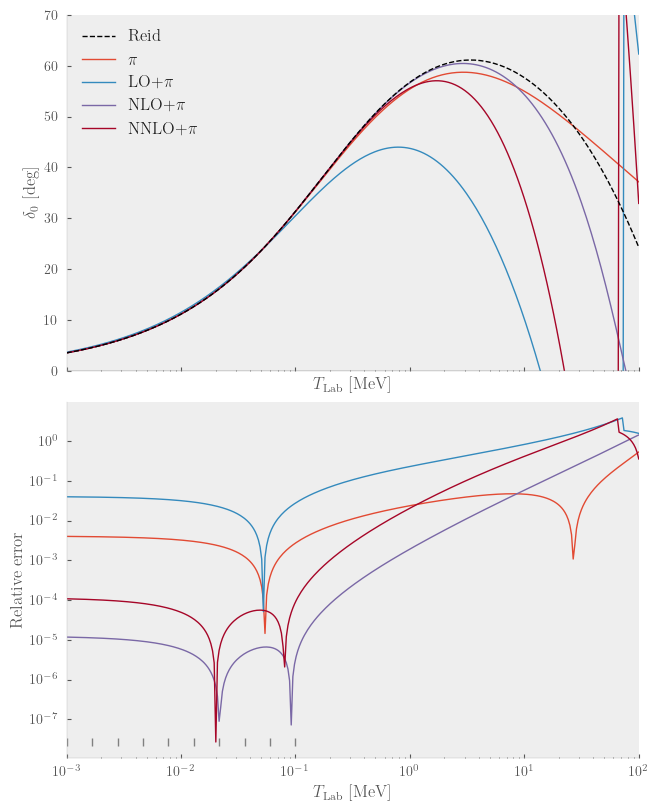

In [9]:
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
plotphase([res_pion, resLO_pion, resNLO_pion, resNNLO_pion], 1e-3, 1e2; ax=ax[1])
ploterror([res_pion, resLO_pion, resNLO_pion, resNNLO_pion], 1e-3, 1e2; ax=ax[2], region=false)
#plotphase(resNNLO_const, 1e-3, 1e2; ax=ax[1], label="NNLO Constrained")
#ploterror(resNNLO_const, 1e-3, 1e2; ax=ax[2], label="NNLO Constrained")
plotfitregion(resNLO_pion, ax[2])
ax[1].set_ylim([0, 70])
ax[1].legend(["Reid", L"\pi", L"LO$+\pi$", L"NLO$+\pi$", L"NNLO$+\pi$"])
ax[2].get_legend().remove()
#savefig(fig, "med_energies.pdf")

In [21]:
size(errorNLO)

(50,)

## Lambda

In [10]:
start = 50
stop = 400
resNLO = fitlambdas(NLO, [-0.3, 0.1];
                    #minlim=[intp((50, -1.0), (150, -0.5), atmost=-0.5), 
                    #        intp((50, -7.5), (150, 0.1), atmost=0.1)],
                    #maxlim=[Inf, 0.2],
                    start, stop, length=50);

0.0%┣                                           ┫ 0/50 [00:00<00:-3, -20.0 it/s]
minlim = nothing
maxlim = nothing
2.0%┣▉                                          ┫ 1/50 [00:01<Inf:Inf, 0.0 it/s]
minlim = nothing
maxlim = nothing
4.0%┣█▉                                           ┫ 2/50 [00:02<01:20, 0.6 it/s]
minlim = nothing
maxlim = nothing
6.0%┣██▊                                          ┫ 3/50 [00:02<00:48, 1.0 it/s]
minlim = nothing
maxlim = nothing
8.0%┣███▋                                         ┫ 4/50 [00:02<00:38, 1.2 it/s]
minlim = nothing
maxlim = nothing
10.0%┣████▍                                       ┫ 5/50 [00:03<00:33, 1.4 it/s]
minlim = nothing
maxlim = nothing
12.0%┣█████▎                                      ┫ 6/50 [00:03<00:29, 1.5 it/s]
minlim = nothing
maxlim = nothing
14.0%┣██████▏                                     ┫ 7/50 [00:04<00:27, 1.6 it/s]
minlim = nothing
maxlim = nothing
16.0%┣███████                                     ┫ 8/50 [00:04<00:26, 1.6 it/s]

N = 2
(low, high) = (-0.3922070358185353, -0.3921256427841591)


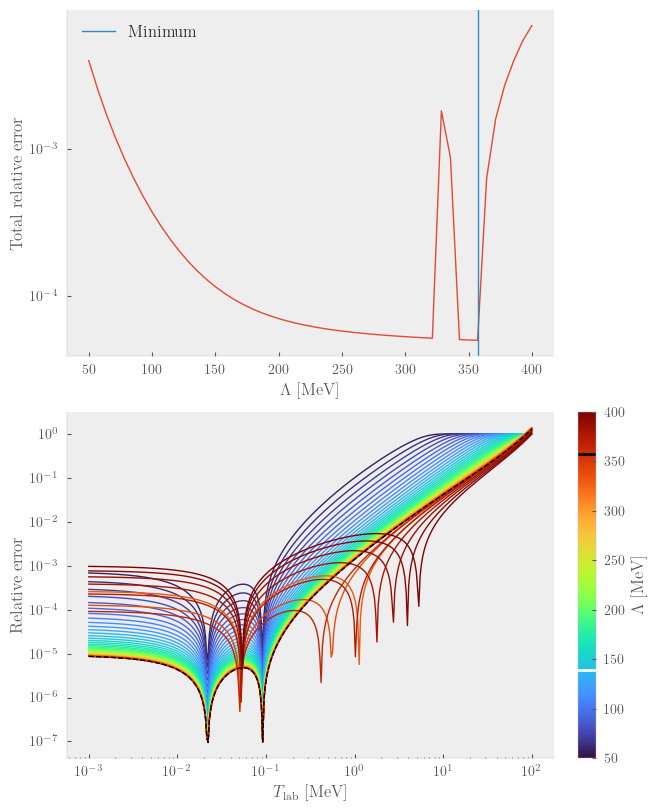

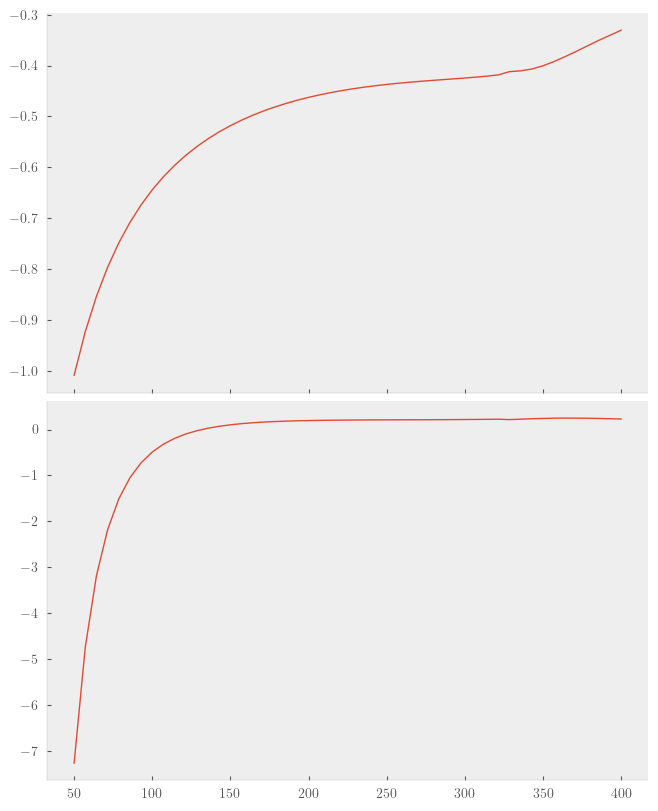

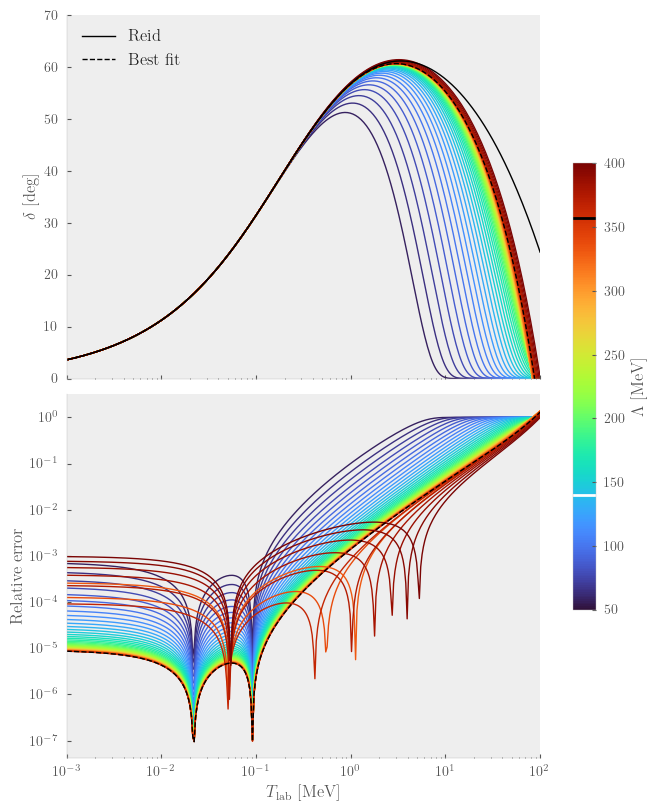

("{-0.39217}^{0.00004}_{0.00004}", "\\num{-0.39217 +- 0.00004}")
(low, high) = (0.24791535140091314, 0.24856803514083814)
("{0.2482}^{0.0003}_{0.0003}", "\\num{0.2482 +- 0.0003}")


In [11]:
fig = plotlambdaerror(resNLO);
ax = plotci(resNLO, bounds=false)
#ax[1].set_ylim(-3.0, 0.0)
#ax[2].set_ylim(-1.0, 0.1)
plotlambdafit(resNLO);
printci(resNLO)

In [12]:
(-0.4246794817536509, -0.42447735624443617)
("{-0.4246}^{0.0001}_{0.0001}", "\\num{-0.4246 +- 0.0001}")
(low, high) = (0.21882425781984294, 0.21928835635202631)
("{0.2191}^{0.0002}_{0.0002}", "\\num{0.2191 +- 0.0002}")

("{0.2191}^{0.0002}_{0.0002}", "\\num{0.2191 +- 0.0002}")

In [13]:
start = 50
stop = 200
resLO = fitlambdas(LO, [-0.5]; start, stop, length=50);

0.0%┣                                           ┫ 0/50 [00:00<00:-3, -20.0 it/s]
minlim = nothing
maxlim = nothing
2.0%┣▉                                          ┫ 1/50 [00:00<Inf:Inf, 0.0 it/s]
minlim = nothing
maxlim = nothing
4.0%┣█▉                                           ┫ 2/50 [00:00<00:17, 2.8 it/s]
minlim = nothing
maxlim = nothing
6.0%┣██▊                                          ┫ 3/50 [00:00<00:11, 4.4 it/s]
minlim = nothing
maxlim = nothing
8.0%┣███▋                                         ┫ 4/50 [00:01<00:08, 5.4 it/s]
minlim = nothing
maxlim = nothing
10.0%┣████▍                                       ┫ 5/50 [00:01<00:07, 6.2 it/s]
minlim = nothing
maxlim = nothing
12.0%┣█████▎                                      ┫ 6/50 [00:01<00:07, 6.8 it/s]
minlim = nothing
maxlim = nothing
14.0%┣██████▏                                     ┫ 7/50 [00:01<00:06, 6.9 it/s]
minlim = nothing
maxlim = nothing
16.0%┣███████                                     ┫ 8/50 [00:01<00:06, 7.2 it/s]

N = 1
(low, high) = 

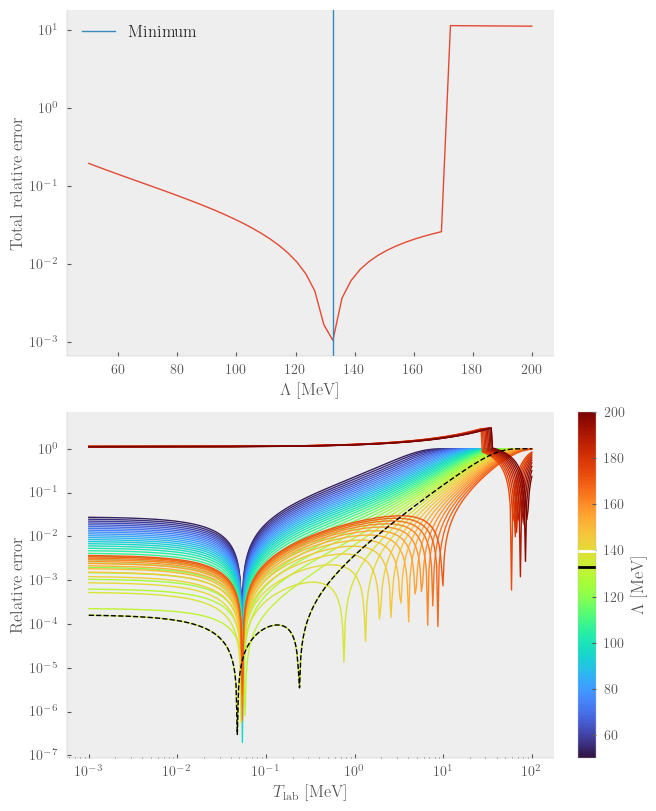

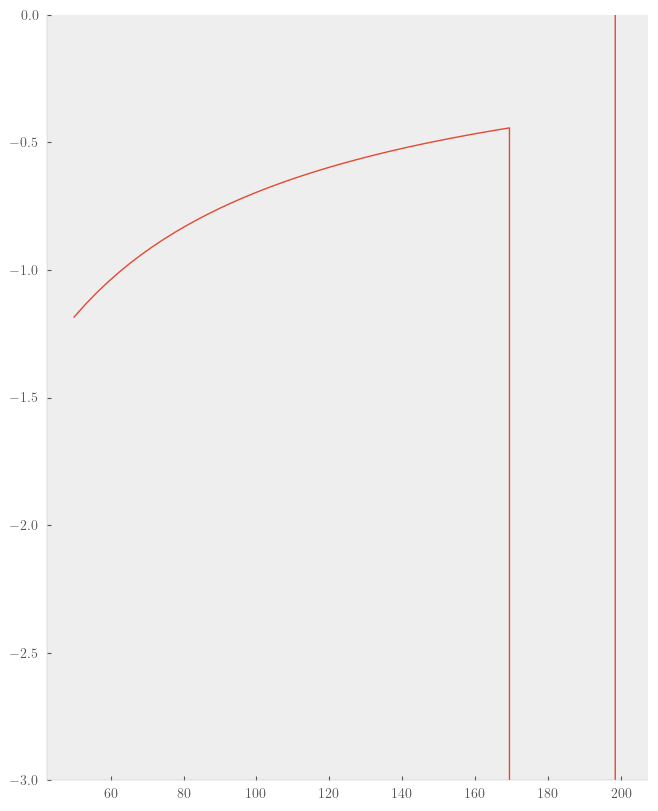

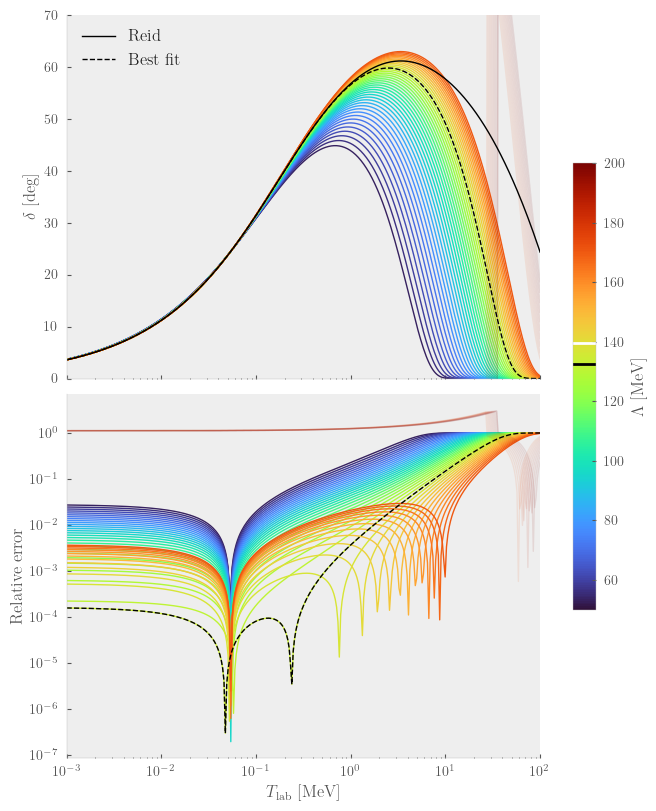

(-0.5488543662724815, -0.5488439922362082)
("{-0.548849}^{0.000005}_{0.000005}", "\\num{-0.548849 +- 0.000005}")


In [14]:
fig = plotlambdaerror(resLO);
ax = plotci(resLO, bounds=false)
ax[1].set_ylim(-3.0, 0.0)
#ax[2].set_ylim(-1.0, 0.1)
plotlambdafit(resLO);
printci(resLO)

In [15]:
start = 50
stop = 300
resNNLO = fitlambdas(NNLO, [-0.5, 0.5, -3.0, -3.0]; 
                    start, stop, length=20);

0.0%┣                                           ┫ 0/20 [00:00<00:-1, -20.0 it/s]
minlim = nothing
maxlim = nothing
5.0%┣██▏                                        ┫ 1/20 [00:18<Inf:Inf, 0.0 it/s]
minlim = nothing
maxlim = nothing
10.0%┣████▍                                       ┫ 2/20 [00:35<10:33, 0.0 it/s]
minlim = nothing
maxlim = nothing
15.0%┣██████▋                                     ┫ 3/20 [00:53<07:29, 0.0 it/s]
minlim = nothing
maxlim = nothing
20.0%┣████████▉                                   ┫ 4/20 [01:20<07:07, 0.0 it/s]
minlim = nothing
maxlim = nothing
25.0%┣███████████                                 ┫ 5/20 [01:37<06:03, 0.0 it/s]
minlim = nothing
maxlim = nothing
30.0%┣█████████████▏                              ┫ 6/20 [02:02<05:42, 0.0 it/s]
minlim = nothing
maxlim = nothing
35.0%┣███████████████▍                            ┫ 7/20 [02:29<05:24, 0.0 it/s]
minlim = nothing
maxlim = nothing
40.0%┣█████████████████▋                          ┫ 8/20 [02:50<04:51, 0.0 it/s]

N = 4
(low, high) = 

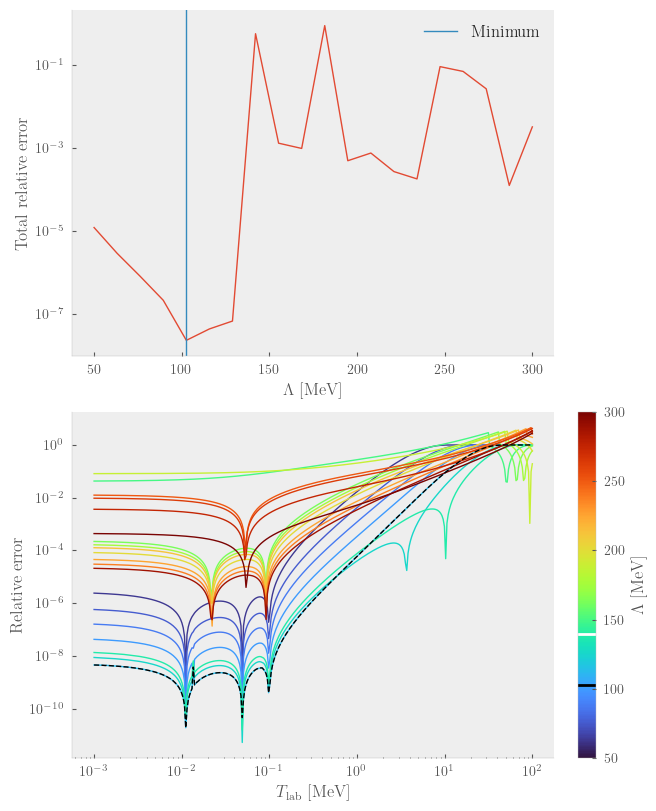

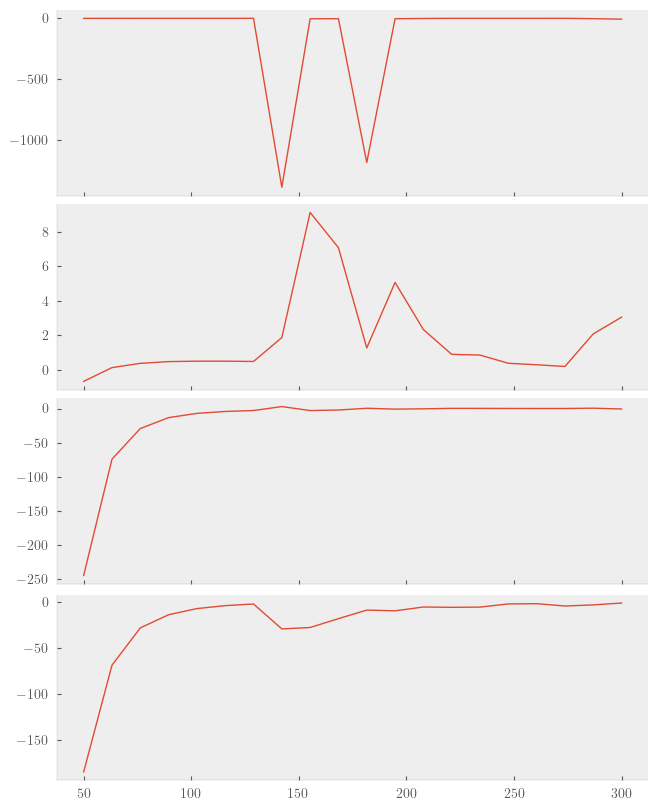

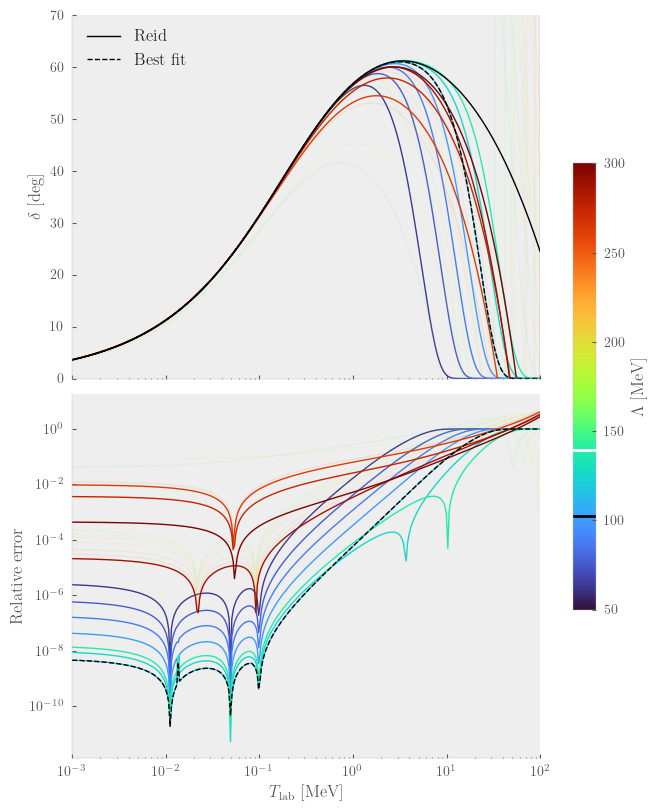

(-0.6645582915905424, -0.507108186125202)
("{-0.59}^{0.08}_{0.08}", "\\num{-0.59 +- 0.08}")
(low, high) = (0.2964315370253291, 0.6899912487330706)
("{0.5}^{0.2}_{0.2}", "\\num{0.5 +- 0.2}")
(low, high) = (-11.172841501059814, -3.0496439530343933)
("{-7.}^{4.}_{4.}", "\\num{-7. +- 4.}")
(low, high) = (-14.837260493478405, 0.7488656521417845)
("{-7.}^{8.}_{8.}", "\\num{-7. +- 8.}")


In [16]:
fig = plotlambdaerror(resNNLO);
ax = plotci(resNNLO, bounds=false)
#ax[1].set_ylim(-3.0, 0.0)
#ax[2].set_ylim(-1.0, 0.1)
plotlambdafit(resNNLO);
printci(resNNLO)

In [17]:
start = 100
stop = 300
resLOp = fitlambdas(LO, [-0.22], [-0.02]; 
    start, stop, length=100,
    minlim=[x -> min(-0.3, -1.5 + 0.2/150 *197x), -0.1], maxlim=[-0.1, 5.0]
    );

0.0%┣                                          ┫ 0/100 [00:00<00:-5, -20.0 it/s]
minlim = [-1.3666666666666667, -0.1]
maxlim = [-0.1, 5.0]
1.0%┣▍                                         ┫ 1/100 [00:01<Inf:Inf, 0.0 it/s]
minlim = [-1.3639730639730638, -0.1]
maxlim = [-0.1, 5.0]
2.0%┣▉                                           ┫ 2/100 [00:01<02:01, 0.8 it/s]
minlim = [-1.3612794612794612, -0.1]
maxlim = [-0.1, 5.0]
3.0%┣█▎                                          ┫ 3/100 [00:02<01:23, 1.2 it/s]
minlim = [-1.3585858585858586, -0.1]
maxlim = [-0.1, 5.0]
4.0%┣█▊                                          ┫ 4/100 [00:02<01:10, 1.4 it/s]
minlim = [-1.355892255892256, -0.1]
maxlim = [-0.1, 5.0]
5.0%┣██▏                                         ┫ 5/100 [00:03<01:05, 1.5 it/s]
minlim = [-1.3531986531986533, -0.1]
maxlim = [-0.1, 5.0]
6.0%┣██▋                                         ┫ 6/100 [00:03<01:01, 1.5 it/s]
minlim = [-1.3505050505050504, -0.1]
maxlim = [-0.1, 5.0]
7.0%┣███                    

60.0%┣█████████████████████████▏                ┫ 60/100 [00:33<00:22, 1.8 it/s]
minlim = [-1.205050505050505, -0.1]
maxlim = [-0.1, 5.0]
61.0%┣█████████████████████████▋                ┫ 61/100 [00:34<00:22, 1.8 it/s]
minlim = [-1.2023569023569023, -0.1]
maxlim = [-0.1, 5.0]
62.0%┣██████████████████████████                ┫ 62/100 [00:35<00:22, 1.8 it/s]
minlim = [-1.1996632996632997, -0.1]
maxlim = [-0.1, 5.0]
63.0%┣██████████████████████████▌               ┫ 63/100 [00:35<00:21, 1.8 it/s]
minlim = [-1.196969696969697, -0.1]
maxlim = [-0.1, 5.0]
64.0%┣██████████████████████████▉               ┫ 64/100 [00:36<00:21, 1.7 it/s]
minlim = [-1.1942760942760944, -0.1]
maxlim = [-0.1, 5.0]
65.0%┣███████████████████████████▎              ┫ 65/100 [00:37<00:20, 1.7 it/s]
minlim = [-1.1915824915824915, -0.1]
maxlim = [-0.1, 5.0]
66.0%┣███████████████████████████▊              ┫ 66/100 [00:38<00:20, 1.7 it/s]
minlim = [-1.1888888888888889, -0.1]
maxlim = [-0.1, 5.0]
67.0%┣███████████████████████

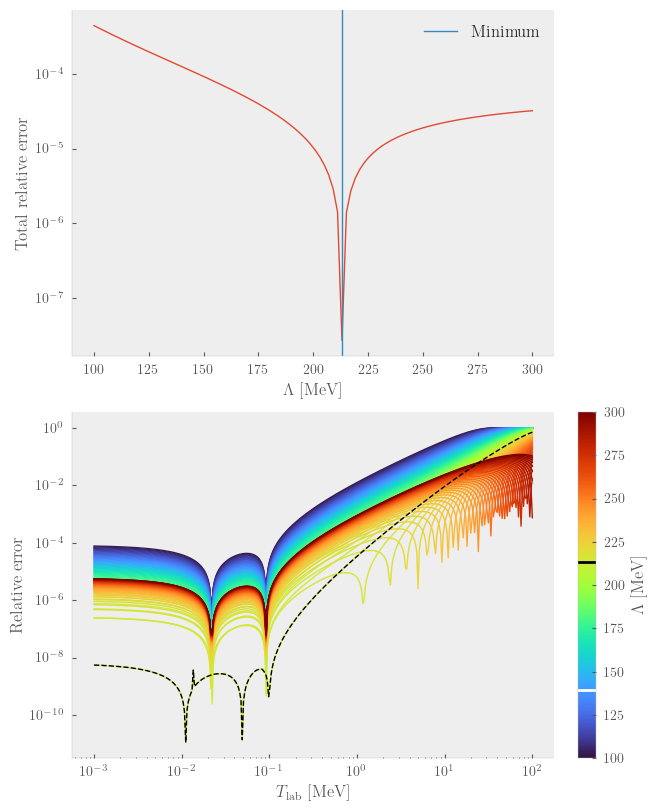

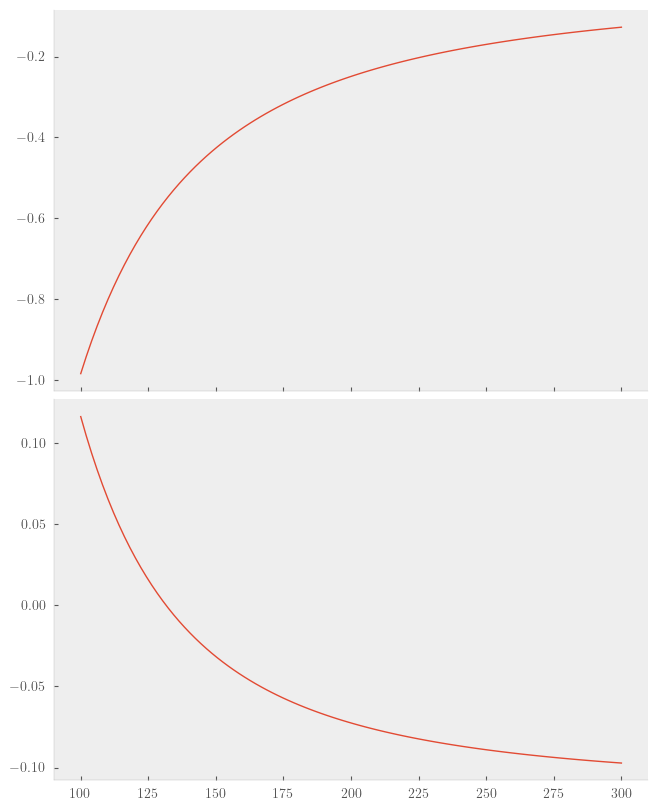

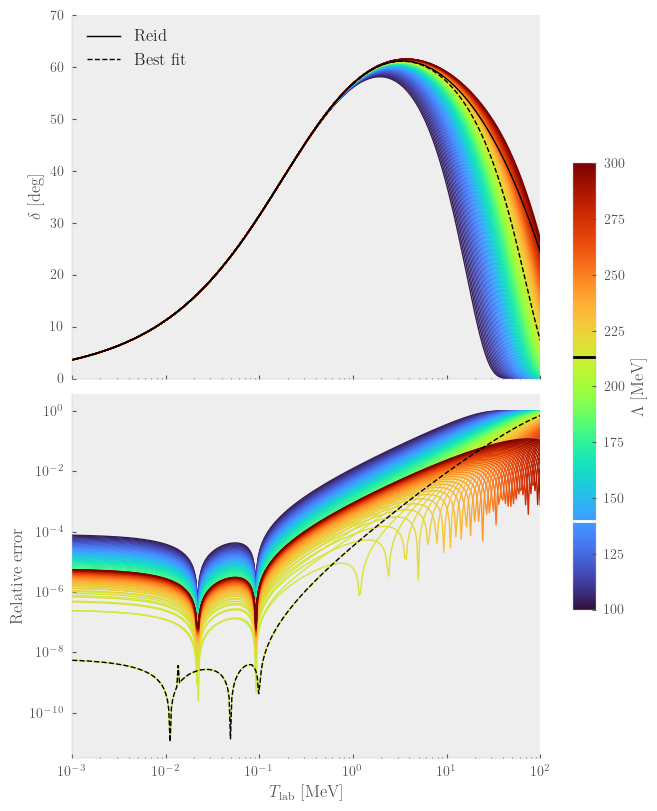

N = 2


In [130]:
fig = plotlambdaerror(resLOp);
ax = plotci(resLOp, bounds=false)
#ax[1].set_ylim(-3.0, 0.0)
#ax[2].set_ylim(-1.0, 0.1)
plotlambdafit(resLOp);

In [131]:
printci(resLOp)

(low, high) = (-0.22277112438115165, -0.22277099746990875)
("{-0.22277106}^{0.00000006}_{0.00000006}", "\\num{-0.22277106 +- 0.00000006}")
(low, high) = (-0.07819423656511743, -0.07819416632326948)
("{-0.07819420}^{0.00000004}_{0.00000004}", "\\num{-0.07819420 +- 0.00000004}")


In [18]:
start = 50
stop = 500
resNLOp = fitlambdas(NLO, [-0.22, 0.06], [-0.06]; 
                    start, stop, length=20,
    #minlim=[-0.25, 0.05, -0.08], maxlim=[-0.21, 0.08, -0.05]); # good results for lambda=300
    minlim=[-Inf, -Inf, -1.0], maxlim=[Inf, Inf, 0]);

0.0%┣                                           ┫ 0/20 [00:00<00:-1, -20.0 it/s]
minlim = [-Inf, -Inf, -1.0]
maxlim = [Inf, Inf, 0.0]
5.0%┣██▏                                        ┫ 1/20 [00:09<Inf:Inf, 0.0 it/s]
minlim = [-Inf, -Inf, -1.0]
maxlim = [Inf, Inf, 0.0]
10.0%┣████▍                                       ┫ 2/20 [00:11<03:19, 0.1 it/s]
minlim = [-Inf, -Inf, -1.0]
maxlim = [Inf, Inf, 0.0]
15.0%┣██████▋                                     ┫ 3/20 [00:17<02:28, 0.1 it/s]
minlim = [-Inf, -Inf, -1.0]
maxlim = [Inf, Inf, 0.0]
20.0%┣████████▉                                   ┫ 4/20 [00:27<02:25, 0.1 it/s]
minlim = [-Inf, -Inf, -1.0]
maxlim = [Inf, Inf, 0.0]
25.0%┣███████████                                 ┫ 5/20 [00:38<02:22, 0.1 it/s]
minlim = [-Inf, -Inf, -1.0]
maxlim = [Inf, Inf, 0.0]
30.0%┣█████████████▏                              ┫ 6/20 [00:52<02:24, 0.1 it/s]
minlim = [-Inf, -Inf, -1.0]
maxlim = [Inf, Inf, 0.0]
35.0%┣███████████████▍                            ┫ 7/20 [01:0

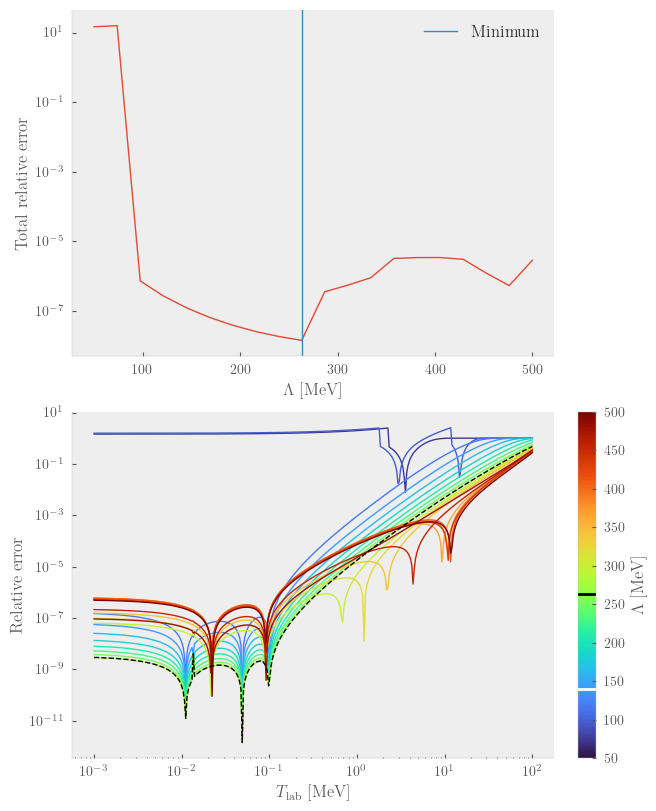

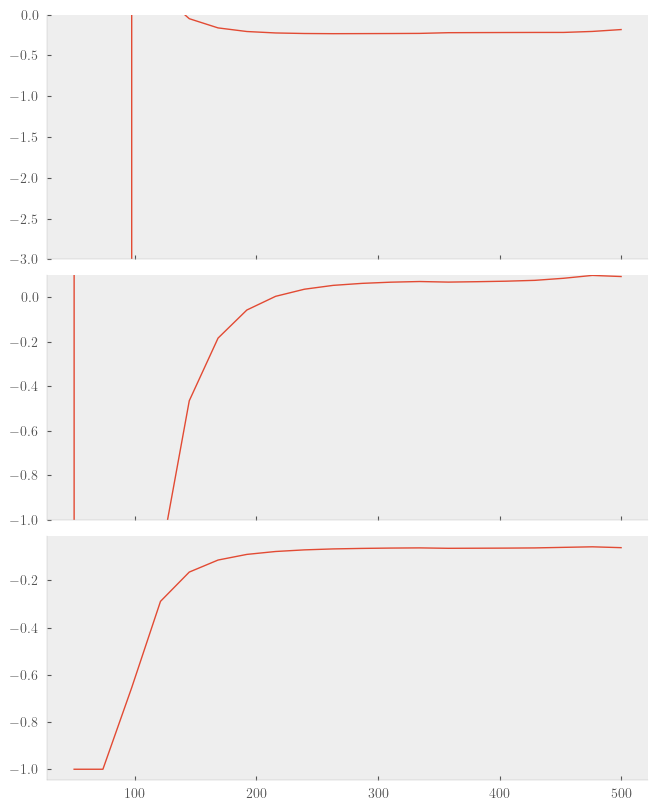

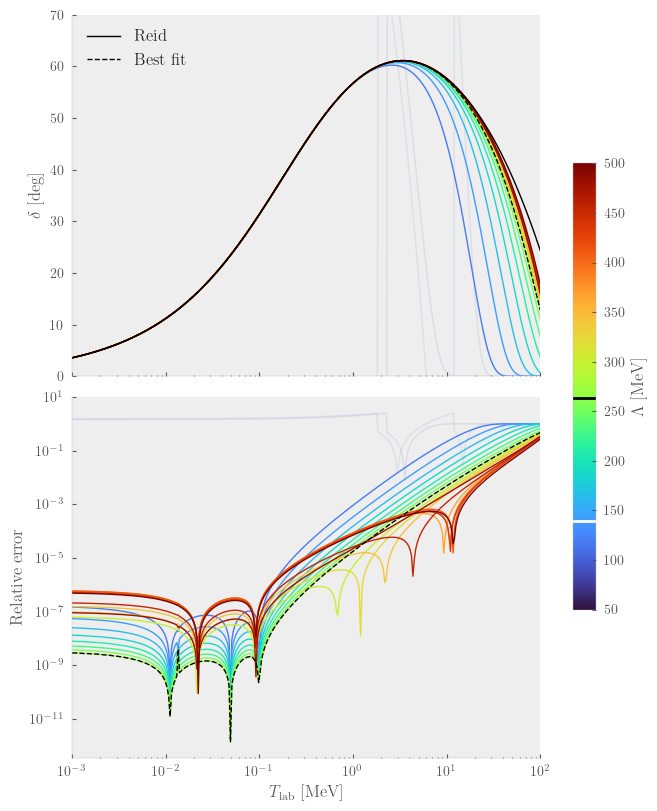

N = 3


In [195]:
fig = plotlambdaerror(resNLOp);
ax = plotci(resNLOp, bounds=false)
ax[1].set_ylim(-3.0, 0.0)
ax[2].set_ylim(-1.0, 0.1)
plotlambdafit(resNLOp);

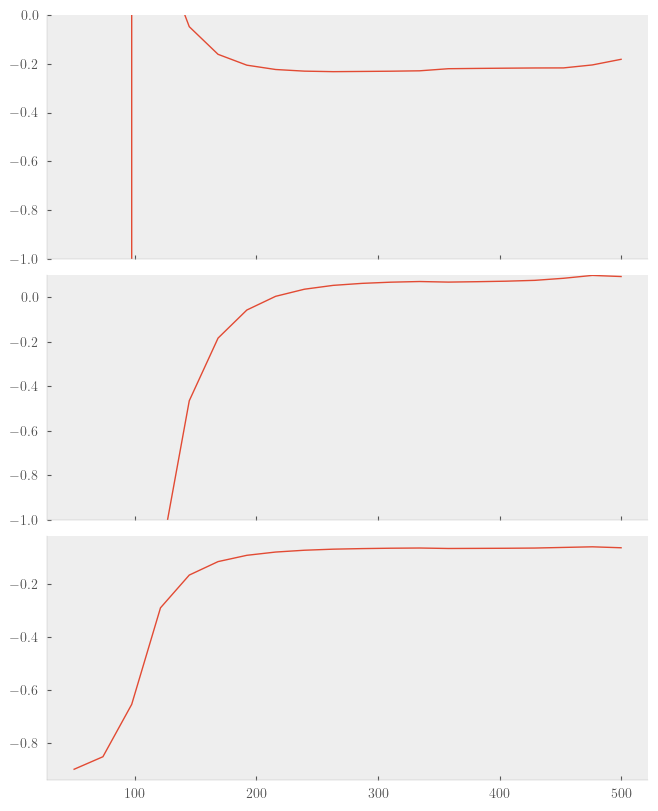

N = 3


(-1.0, 0.1)

In [68]:
ax = plotci(resNLOp, bounds=false)
ax[1].set_ylim(-1.0, 0.0)
ax[2].set_ylim(-1.0, 0.1)

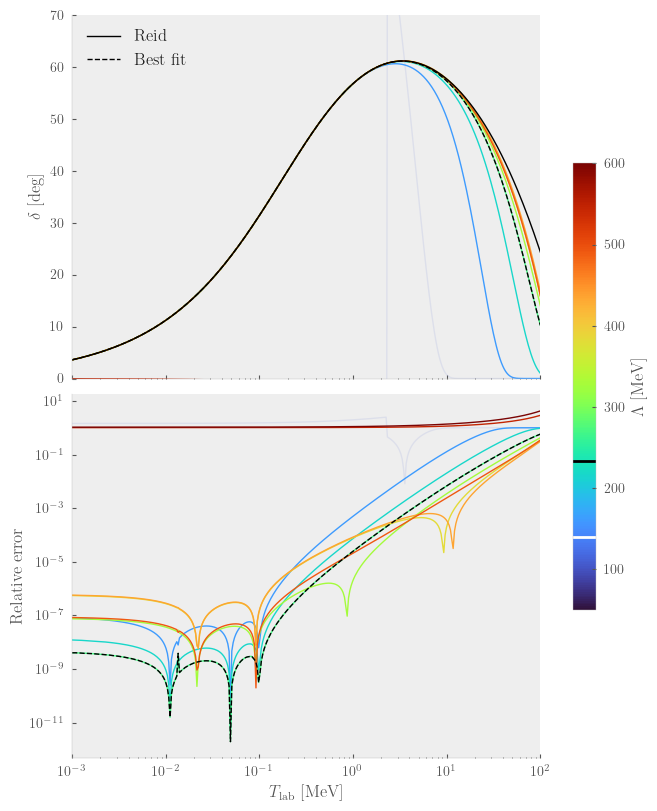

In [63]:
plotlambdafit(resNLOp);

In [19]:
start = 100
stop = 400
resNNLOp = fitlambdas(NNLO, [-0.2, 0.06, -0.1, -0.1], [-0.01];
                    #minlim=[-0.6, -0.01, -2.0, -0.6, -0.2], maxlim=[0.0, 0.1, 0.0, 1.0, -0.001],
                    #minlim=[-Inf, -Inf, -Inf, -Inf, intp((100, -0.1), (200, -0.06), atmost=-0.06)], 
                    #maxlim=[Inf, Inf, Inf, Inf, -0.001],
                    start, stop, length=20);

0.0%┣                                           ┫ 0/20 [00:00<00:-1, -20.0 it/s]
minlim = nothing
maxlim = nothing
5.0%┣██▏                                        ┫ 1/20 [00:37<Inf:Inf, 0.0 it/s]
minlim = nothing
maxlim = nothing
10.0%┣████▍                                       ┫ 2/20 [01:33<27:48, 0.0 it/s]
minlim = nothing
maxlim = nothing
15.0%┣██████▋                                     ┫ 3/20 [02:17<19:20, 0.0 it/s]
minlim = nothing
maxlim = nothing
20.0%┣████████▉                                   ┫ 4/20 [02:52<15:20, 0.0 it/s]
minlim = nothing
maxlim = nothing
25.0%┣███████████                                 ┫ 5/20 [03:26<12:52, 0.0 it/s]
minlim = nothing
maxlim = nothing
30.0%┣█████████████▏                              ┫ 6/20 [04:01<11:15, 0.0 it/s]
minlim = nothing
maxlim = nothing
35.0%┣███████████████▍                            ┫ 7/20 [04:35<09:56, 0.0 it/s]
minlim = nothing
maxlim = nothing
40.0%┣█████████████████▋                          ┫ 8/20 [05:09<08:49, 0.0 it/s]

N = 5
(low, high) = 

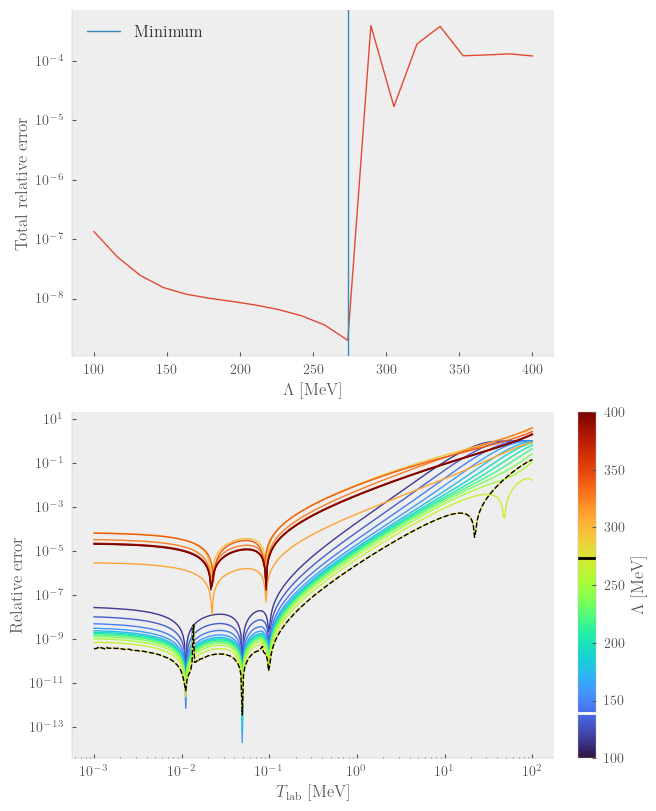

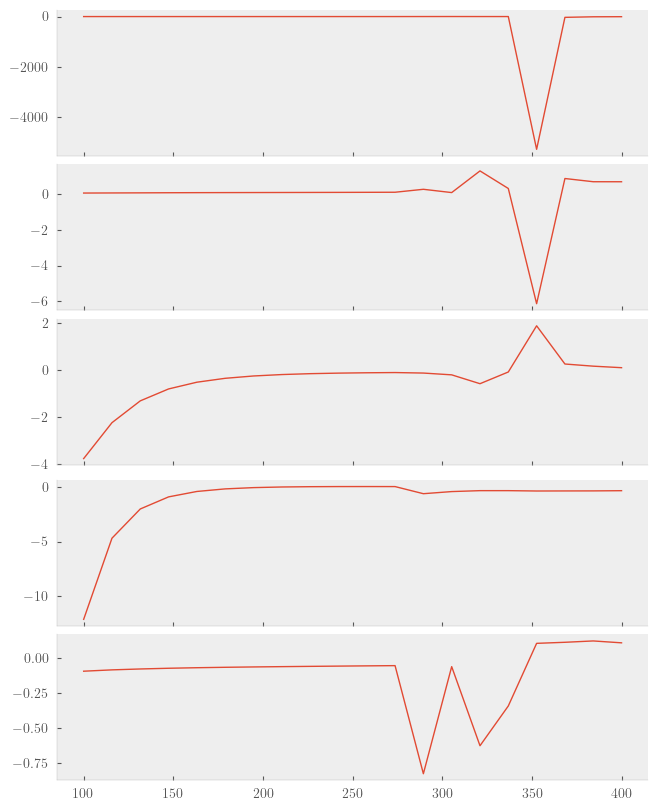

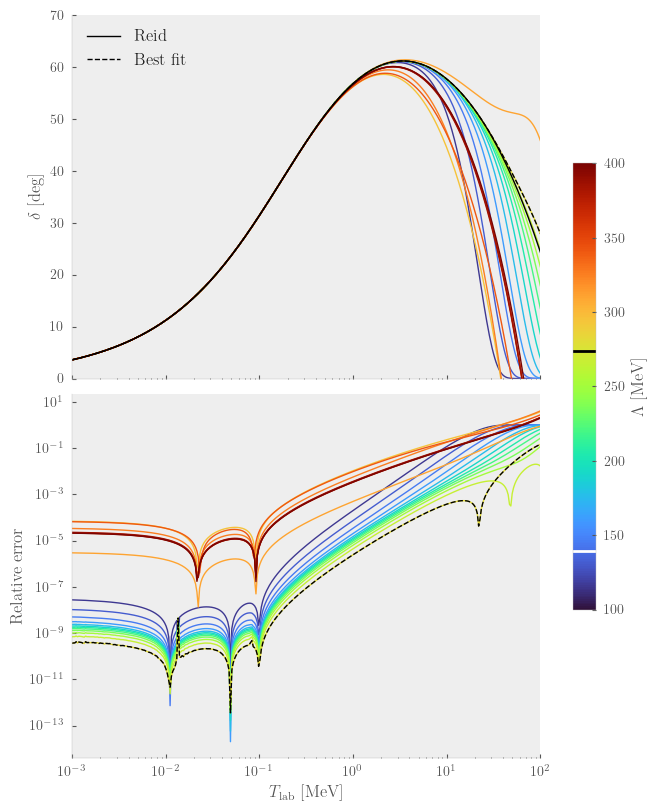

(-3.1641744939549556, 2.7641738143797254)
("{-0.}^{3.}_{3.}", "\\num{-0. +- 3.}")
(low, high) = (-1.5661419926519773, 1.7397827766630887)
("{0.}^{2.}_{2.}", "\\num{0. +- 2.}")
(low, high) = (-2.8872267725432126, 2.6972277775688607)
("{-0.}^{3.}_{3.}", "\\num{-0. +- 3.}")
(low, high) = (-6.085443127454572, 6.176104837521394)
("{0.}^{6.}_{6.}", "\\num{0. +- 6.}")
(low, high) = (-0.10413891631956815, -0.009321137969947275)
("{-0.06}^{0.05}_{0.05}", "\\num{-0.06 +- 0.05}")


In [175]:
fig = plotlambdaerror(resNNLOp);
ax = plotci(resNNLOp, bounds=false)
#ax[1].set_ylim(-3.0, 0.0)
#ax[2].set_ylim(-0.5, 0.0)
#ax[3].set_ylim(-1.0, 1)
#ax[4].set_ylim(-1.0, 1)
plotlambdafit(resNNLOp);
printci(resNNLOp)

### Selection

In [65]:
using Formatting: format

In [94]:
pushfirst!(PyVector(pyimport("sys")."path"), "")
linehelp = pyimport("linehelp")

PyObject <module 'linehelp' from '/home/erdos/gits/Spesial/project2/notebooks/linehelp.py'>

a = 1.6330513763342995
(olda, a) = (1.6330513763342995, 1.6183732258999017)
a = 2.6022680242919636
(olda, a) = (2.6022680242919636, 2.5995618093416795)
a = 2.720231158737898
(olda, a) = (2.720231158737898, 2.702701377294453)
1.6183732258999017
0.9811885834417777
0.10313956795277335


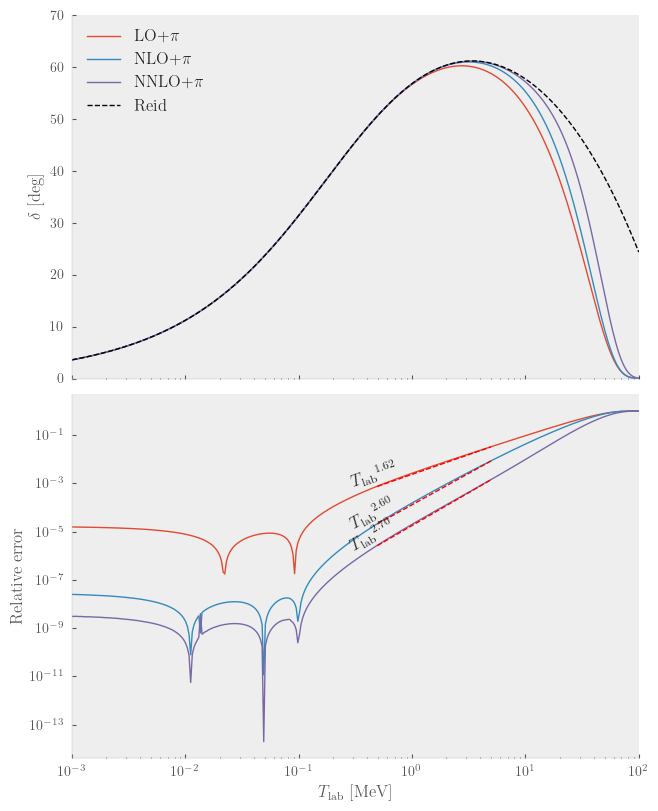

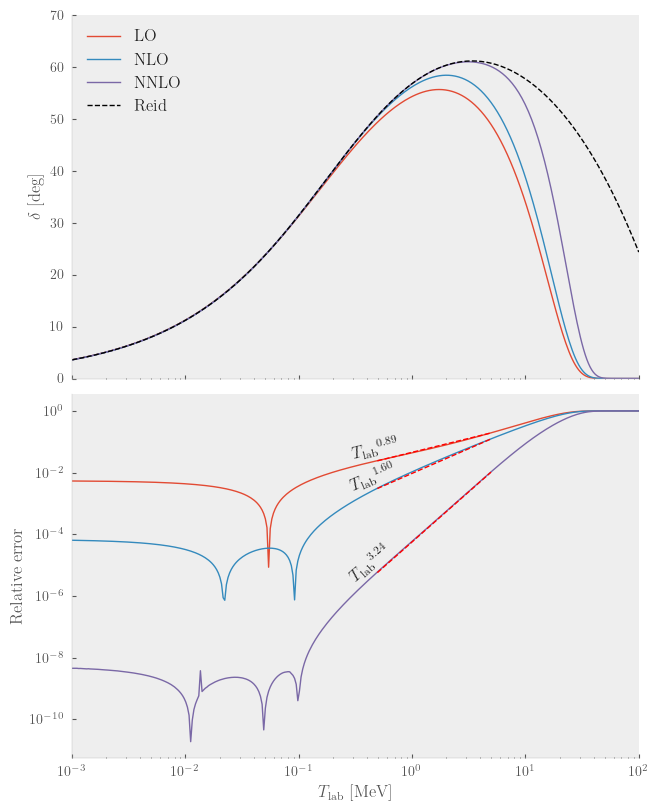

a = 0.9014455334210897
(olda, a) = (0.9014455334210897, 0.8907590783753698)
a = 1.6012817756662663
(olda, a) = (1.6012817756662663, 1.5968939739425307)
a = 3.2459114010693604
(olda, a) = (3.2459114010693604, 3.2366609870687975)
0.8907590783753698
0.7061348955671609
1.6397670131262667


In [262]:
# res = [resLO, resNLO, resNNLO, resLOp, resNLOp, resNNLOp]
fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
lambda = 150
alphas = []
for r in filter(r -> typeof(r.res[1].params) == FitParamsPion, res)
    i = argmin(@. abs(r.lambdas - lambda))
    ax[1].plot(r.E, r.V[i], label=label(r))
    ax[2].plot(r.E, r.errp[i])
    
    a, X, Y = fit(r.E, r.errp[i], .5, 5)
    line = ax[2].plot(X, Y, "r--")[1]
    olda = a
    a = fitfit(r.E, r.errp[i], .2, 10)[1]
    @show olda, a
    linehelp.line_annotate(L"T_{\mathrm{lab}}"* format(L"^{{ {:.2f} }}", a), line, X[1])
    push!(alphas, a)
end
println(alphas[1])
println(alphas[2]-alphas[1])
println(alphas[3]-alphas[2])
ax[1].plot(res[1].E, res[1].reid, "k--", label="Reid")
ax[1].set_xscale("log")
ax[1].set_ylim(0, 70)
ax[1].set_xlim(1e-3, 100)
ax[2].set_yscale("log")
ax[1].legend()
ax[2].set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
ax[1].set_ylabel(L"$\delta$ [deg]")
ax[2].set_ylabel("Relative error")
savefig(fig, "pion_lambda.pdf")

fig, ax = newfig(nrows=2, sharex=true, constrained_layout=true)
lambda = 100
alphas = []
for r in filter(r -> typeof(r.res[1].params) != FitParamsPion, res)
    i = argmin(@. abs(r.lambdas - lambda))
    ax[1].plot(r.E, r.V[i], label=label(r))
    ax[2].plot(r.E, r.errp[i])
    a, X, Y = fit(r.E, r.errp[i], .5, 5)
    line = ax[2].plot(X, Y, "r--")[1]
    olda = a
    a = fitfit(r.E, r.errp[i], .2, 10)[1]
    @show olda, a
    linehelp.line_annotate(L"T_{\mathrm{lab}}"* format(L"^{{ {:.2f} }}", a), line, X[1])
    push!(alphas, a)
end
#plotfitregion(res[1].res[1], ax[1])
println(alphas[1])
println(alphas[2]-alphas[1])
println(alphas[3]-alphas[2])
ax[1].plot(res[1].E, res[1].reid, "k--", label="Reid")
ax[1].set_xscale("log")
ax[1].set_ylim(0, 70)
ax[1].set_xlim(1e-3, 100)
ax[2].set_yscale("log")
ax[1].legend()

ax[2].set_xlabel(L"$T_{\mathrm{lab}}$ [MeV]")
ax[1].set_ylabel(L"$\delta$ [deg]")
ax[2].set_ylabel("Relative error")
savefig(fig, "pionless_lambda.pdf")

In [254]:
function fitfitfit(res, start, stop)
    i = argmax(map(x -> length(x.lambdas), res))
    rel = []
    for lambda in res[i].lambdas
        alphas = Float64[]
        for r in res
            j = index(r.lambdas, lambda)
            a, _ = fitfit(r.E, r.errp[j], start, stop)
            push!(alphas, a)
        end
        ratio = [alphas[1]]
        for j in 2:length(alphas)
            push!(ratio, alphas[j]-alphas[j-1])
        end
        push!(rel, (lambda, ratio))
    end
    @show rel
end
fitfitfit([resLOp, resNLOp, resNNLOp], 0.2, 10)

rel = Any[(100.0, [1.5762420789821947, 1.0253389775935529, 0.23164059445744822]), (102.02020202020203, [1.578748570169876, 1.0228324864058715, 0.23164059445744822]), (104.04040404040404, [1.5811253705096489, 1.0204556860660987, 0.23164059445744822]), (106.06060606060605, [1.583383530452582, 1.0181975261231655, 0.23164059445744822]), (108.08080808080808, [1.5855332538693891, 1.0160478027063584, 0.23236018834555372]), (110.1010101010101, [1.5875839925618327, 1.0158108901034821, 0.23054636225598646]), (112.12121212121211, [1.5895445289641008, 1.013850353701214, 0.23054636225598646]), (114.14141414141415, [1.5914230523552948, 1.01197183031002, 0.23054636225598646]), (116.16161616161617, [1.5932272243543786, 1.0101676583109362, 0.23054636225598646]), (118.18181818181817, [1.59496417203656, 1.008430710628755, 0.23054636225598646]), (120.20202020202021, [1.5966408853169096, 1.0067539973484052, 0.23054636225598646]), (122.22222222222221, [1.5982634922051377, 1.005131390460177, 0.23054636225598

100-element Vector{Any}:
 (100.0, [1.5762420789821947, 1.0253389775935529, 0.23164059445744822])
 (102.02020202020203, [1.578748570169876, 1.0228324864058715, 0.23164059445744822])
 (104.04040404040404, [1.5811253705096489, 1.0204556860660987, 0.23164059445744822])
 (106.06060606060605, [1.583383530452582, 1.0181975261231655, 0.23164059445744822])
 (108.08080808080808, [1.5855332538693891, 1.0160478027063584, 0.23236018834555372])
 (110.1010101010101, [1.5875839925618327, 1.0158108901034821, 0.23054636225598646])
 (112.12121212121211, [1.5895445289641008, 1.013850353701214, 0.23054636225598646])
 (114.14141414141415, [1.5914230523552948, 1.01197183031002, 0.23054636225598646])
 (116.16161616161617, [1.5932272243543786, 1.0101676583109362, 0.23054636225598646])
 (118.18181818181817, [1.59496417203656, 1.008430710628755, 0.23054636225598646])
 (120.20202020202021, [1.5966408853169096, 1.0067539973484052, 0.23054636225598646])
 (122.22222222222221, [1.5982634922051377, 1.005131390460177, 

In [59]:
function fit(E, d, e1, e2)
    e1 = log10(e1)
    e2 = log10(e2)
    X = @. log10(E)
    Y = @. log10(d)
    i = argmin(@. abs(X - e1))
    j = argmin(@. abs(X - e2))
    a = (Y[j]-Y[i])/(e2 - e1)
    @show a
    b = Y[i] - a*e1
    #fig, ax = newfig()
    #ax.plot(E, d)
    #ax.set_yscale("log")
    #ax.set_xscale("log")
    #ax.plot(E[i:j], @. 10^(a*log10(E[i:j]) + b))
    a, E[i:j], @. 10^(a*log10(E[i:j]) + b)
end
#fit(resLO.E, resLO.errp[argmin(@. (resLO.lambdas - 100))], 0.5, 5)

fit (generic function with 3 methods)

In [225]:
function fitfit(X, Y, start, stop)
    i = argmin(@. abs(X - start))
    j = argmin(@. abs(X - stop))
    x = @. log10(X[i:j])
    y = @. log10(Y[i:j])
    alphas = Float64[]
    score = Float64[]
    interval = Float64[]
    #fig, ax = newfig()
    #ax.plot(X, Y)
    for ii in 1:length(x)
        for jj in length(x):-1:(ii+50)
            a = (y[jj]-y[ii])/(x[jj]-x[ii])
            b = y[ii] - a*x[ii]
            yhat = @. a*x[ii:jj] + b
            res = sum(@. abs((y[ii:jj] - yhat)))/(jj-ii)
            push!(score, 1/res)
            push!(alphas, a)
            push!(interval, jj-ii)
            s = i+ii
            #ax.plot(10 .^x[ii:jj], 10 .^(yhat), "k", alpha=0.01)
        end
    end
    #ax.set_xscale("log")
    #ax.set_yscale("log")
    sum(alphas.*score)/sum(score), alphas, score, interval  
end

fitfit (generic function with 1 method)

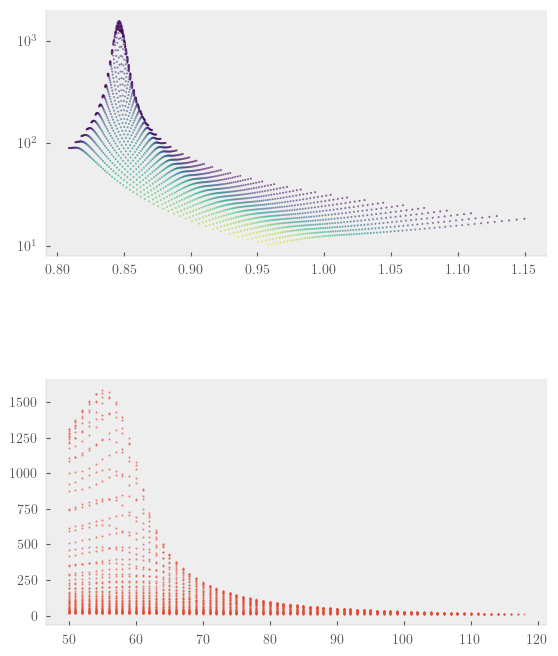

0.8570091855850513


In [226]:
fig, ax = newfig(nrows=2)
a, alphas, score, interval  = fitfit(resLO.E,resLO.errp[argmin(@. (resLO.lambdas - 100))], 0.1, 5)
ax[1].scatter(alphas, score, s=1, alpha=0.5, c=interval)
ax[1].set_yscale("log")
ax[2].scatter(interval, score, s=1, alpha=0.5)
println(a)
#println(sum(alphas.*score)/sum(score))

###### Misc

### BlackBox

In [ ]:
using BlackBoxOptim

In [ ]:
V = NNLO
λ = 0.7
erf = makeerrorfunction(V, Λ=λ)
res = bboptimize(erf; SearchRange = [(-1.0, 1.0), (-1.0, 1.0), (-2.0, 1.0)],
        Method = :adaptive_de_rand_1_bin_radiuslimited, MaxTime = 3*60.0)

In [ ]:
@show bs = best_candidate(res)
@show bf = best_fitness(res)
E, reid = computephase(Reid(), endpoint=maxE, length=N)
E, nnlo = computephase(regularize(NNLO(bs...), 0.7), endpoint=maxE, length=N)

In [ ]:
fig, ax = newfig()
ax.plot(E, reid)
ax.plot(E, nnlo)
fig, ax = newfig()
ax.plot(E, relerr(reid, nnlo))
ax.set_xscale("log")
ax.set_yscale("log")

TODO:
- Name pionic interactions _pi
- Find region for LO, NLO, NNLO, ± pions
- Generalize procedure
- 1) Compare with/without pion

### Error

In [2]:
using Plots, Interact #, Reactive

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3002517012757990155\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6823098946853438521\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3002517012757990155\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [47]:
start = 1e-3
stop = 1
C0 = slider(-1.0:0.01:1.0, value=-0.5)
C2 = slider(-3.0:0.01:3.0, value=-0.03)
lambdas = slider(1:0.5:500, value=140)
Ns = slider(5:350, value=30, label="N")
#lengths = slider(5:350, value=50)
mp = @manipulate throttle = 0.1 for C0s in C0, C2s in C2, lam in lambdas, N in Ns
    #length=50
    method = KMatrix(N)
    l = lam/197
    V = regularize(LO(C0s), l)
    E = computerange(start, stop, 350)
    #E = range(start, stop/2, length=50)
    k = energytomomentum.(E)
    d = phaseshift(k, mass, V, method)
    reid = phaseshift(k, mass, Reid(), method)
    r = @. k*cot(reid |> deg2rad)
    d = @. k*cot(d |> deg2rad)
    plot(abs.(r.-d), yscale=:log10, xscale=:log10)
    #plot(e, r, color=:black)
    #plot!(E, d, xscale=:log10, ylim=(1, 70))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 201,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/erdos/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/erdos/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/erdos/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/erdos/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/erdos/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007ff6a91f9870, Task (runnable) @0x00007ff6a91f9870), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.99\",\"-0.98\",\"-0.97\",\"-0.96\",\"-0.95\",\"-0.94\",\"-0.93\",\"-0.92\",\"-0.91\",\"-0.9\",\"-0.89\",\"-0.88\",\"-0.87\",\"-0.86\",\"-0.85\",\"-0.84\",\"-0.83\",\"-0.82\",\"-0.81\",\"-0.8\",\"-0.79\",\"-0.78\",\"-0.77\",\"-0.76\",\"-

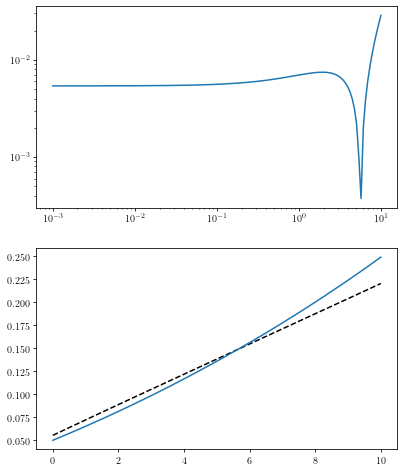

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff6721c9f10>

In [51]:
method = KMatrix(30)
l = 150/197
V = regularize(LO(-0.5), l)
start = 1e-3
stop = 10
E = computerange(start, stop, 150)
#E = range(start, stop/2, length=50)
k = energytomomentum.(E)
d = phaseshift(k, mass, V, method)
reid = phaseshift(k, mass, Reid(), method)
r = @. k*cot(reid |> deg2rad)
d = @. k*cot(d |> deg2rad)
fig, (ax1, ax2) = newfig(nrows=2)
ax1.plot(E, @. abs(r-d))
ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.plot(E, r, "k--")
ax2.plot(E, d)
#ax.set_ylim(minimum(r), 1.1maximum(r))

In [24]:

start = 1e-3
stop = 150
C0 = slider(-1.0:0.01:1.0, value=-0.5)
C2 = slider(-3.0:0.01:3.0, value=-0.03)
lambdas = slider(1:0.5:500, value=140)
Ns = slider(5:350, value=30, label="N")
#lengths = slider(5:350, value=50)
mp = @manipulate throttle = 0.1 for C0s in C0, C2s in C2, lam in lambdas, N in Ns
    #length=50
    method = KMatrix(N)
    l = lam/197
    V = regularize(NLO(C0s, C2s), l)
    E = computerange(start, stop, 350)
    #E = range(start, stop/2, length=50)
    k = energytomomentum.(E)
    d = phaseshift(k, mass, V, method)
    reid = phaseshift(k, mass, Reid(), method)
    r = reid#@. k*cot(reid |> deg2rad)
    d = d#@. k*cot(d |> deg2rad)
    @show findjump(d)
    plot(E, r, color=:black, yscale=:log10, xscale=:log10)
    #plot(e, r, color=:black)
    plot!(E, d, xscale=:log10, ylim=(1, 150))
end

findjump(d) = false


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 201,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/erdos/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/erdos/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/erdos/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/erdos/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/erdos/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f50fbee5d50, Task (runnable) @0x00007f50fbee5d50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.99\",\"-0.98\",\"-0.97\",\"-0.96\",\"-0.95\",\"-0.94\",\"-0.93\",\"-0.92\",\"-0.91\",\"-0.9\",\"-0.89\",\"-0.88\",\"-0.87\",\"-0.86\",\"-0.85\",\"-0.84\",\"-0.83\",\"-0.82\",\"-0.81\",\"-0.8\",\"-0.79\",\"-0.78\",\"-0.77\",\"-0.76\",\"-

findjump(d) = true
findjump(d) = true
findjump(d) = true
findjump(d) = true
findjump(d) = true
findjump(d) = true
findjump(d) = false
findjump(d) = false
findjump(d) = false


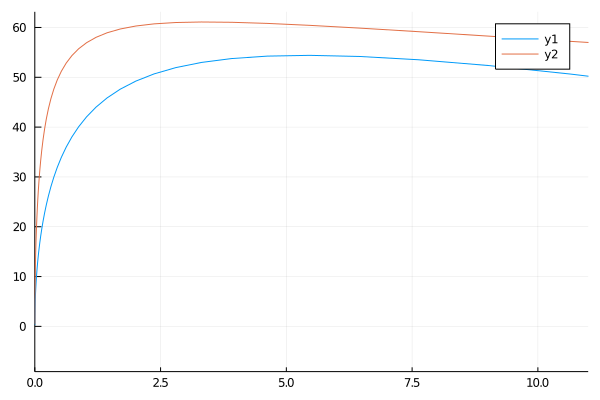

In [26]:
C0 = -0.4
C2 = -0.3
start = 1e-5
stop=150
lam=0.7
N = 30
len= 100
method = KMatrix(N)
V = regularize(NLO(C0, C2) + Pion(-0.003), lam)
E = computerange(start, stop, len) #range(start/2, stop/2, length=len)
k = .√(mass/197*E)
δ = phaseshift(k, mass, V, method)
plot(2E, δ)
δ = phaseshift(k, mass, Reid(), method)
plot!(2E, δ, xlim=(0, 11))

findjump (generic function with 1 method)

In [23]:
findjump([1, 2, -3, 3])

true

In [105]:
@show k₀ = k[argmin(@. abs(2E-6))]
A, VV = createA(k₀, mass, 1000, V);

k₀ = k[argmin(#= In[105]:1 =# @__dot__(abs(2.0e-6)))] = 0.00034789511049247197


In [106]:
@show VV[end]
#heatmap(VV, color=:turbo, zscale=:log10)
#surface(VV , color=:turbo, zscale=:log10)

VV[end] = -0.40874642398388716


-0.40874642398388716

In [107]:
using LinearAlgebra

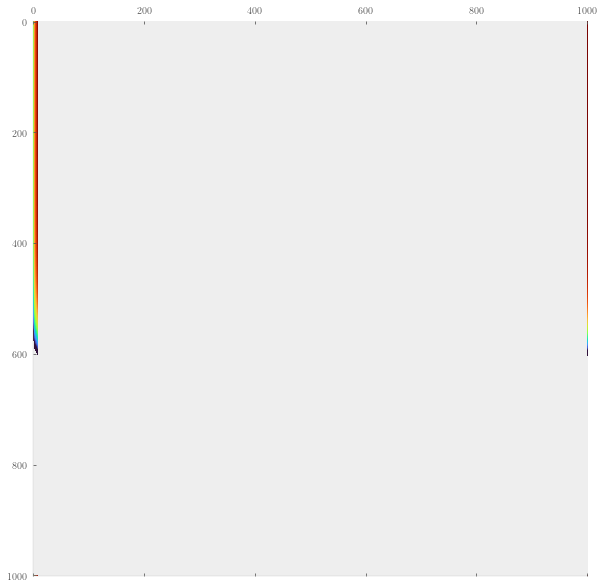

  0.091800 seconds (10 allocations: 15.291 MiB)


PyObject <matplotlib.image.AxesImage object at 0x7fb77ea03f70>

In [108]:
#heatmap(A, color=cgrad(:turbo))
#surface(A, color=:turbo)
@time S = A*A⁻¹ .- I(size(A)[1])
fig, ax = plt.subplots(figsize=(10, 10))
norm = plt.matplotlib.colors.LogNorm(vmin=minimum(S), vmax=maximum(S))
ax.matshow(S, cmap="turbo", norm=norm)

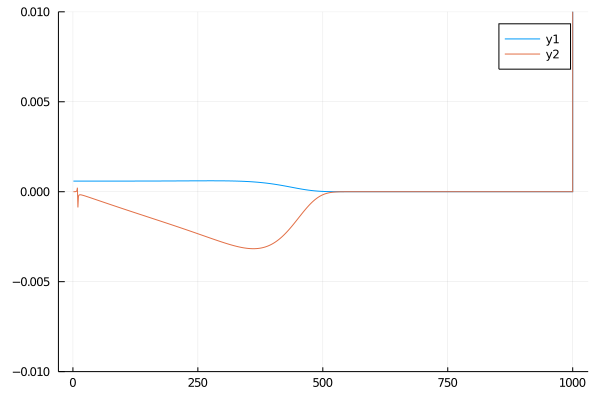

┌ Warning: /home/erdos/.julia/packages/Plots/hyS17/deps is not an existing directory, Revise is not watching
└ @ Revise /home/erdos/.julia/packages/Revise/34vmN/src/packagedef.jl:557
┌ Warning: /home/erdos/.julia/packages/Plots/hyS17/deps/SnoopCompile/precompile/linux/1.5 is not an existing directory, Revise is not watching
└ @ Revise /home/erdos/.julia/packages/Revise/34vmN/src/packagedef.jl:557
┌ Warning: /home/erdos/.julia/packages/PyCall/BcTLp/deps is not an existing directory, Revise is not watching
└ @ Revise /home/erdos/.julia/packages/Revise/34vmN/src/packagedef.jl:557
┌ Warning: /home/erdos/.julia/packages/Plots/hyS17/src/backends is not an existing directory, Revise is not watching
└ @ Revise /home/erdos/.julia/packages/Revise/34vmN/src/packagedef.jl:557
┌ Warning: /home/erdos/.julia/packages/SLEEFPirates/jGsib/src is not an existing directory, Revise is not watching
└ @ Revise /home/erdos/.julia/packages/Revise/34vmN/src/packagedef.jl:557
┌ Warning: /home/erdos/.julia/packag

In [109]:
plot(A[:, end], ylim=(-0.01, 0.01))
plot!(A[end, :])

In [75]:
A⁻¹ = inv(A);

In [76]:
#heatmap(A⁻¹ .|> symlog, color=cgrad(:turbo, scale=:log), zlim=())

In [77]:
K = A⁻¹*VV;
#heatmap(K, color=cgrad(:turbo, scale=:log), zscale=:log)
#heatmap(K, c=:turbo)

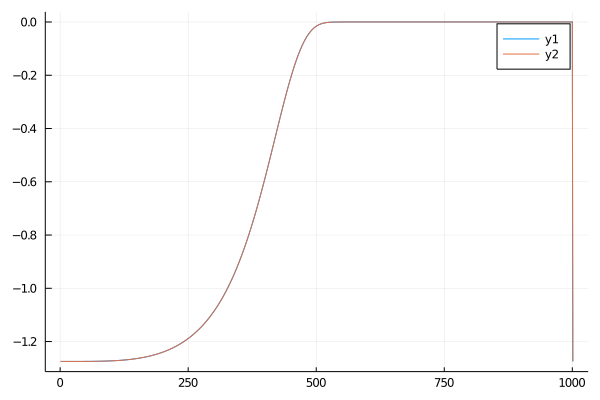

In [78]:
plot(VV[end, :])
plot!(VV[:, end])

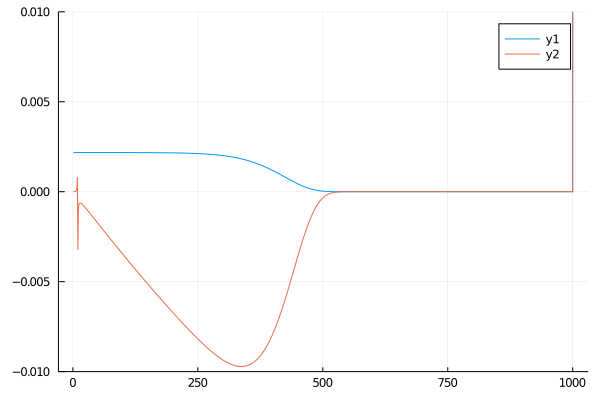

In [79]:
plot(A⁻¹[:, end], ylim=(-0.01, 0.01))
plot!(A⁻¹[end, :])

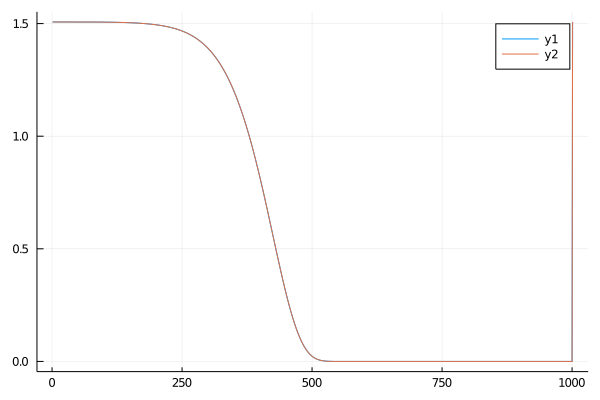

In [80]:
plot(K[end, :])
plot!(K[:, end])

In [81]:
@show Kk0 = K[end, end]
δᵢ = atan(-Kk0*mass*k₀) / pi * 180

Kk0 = K[end, end] = 1.5070616629643176


-0.14324977435309388

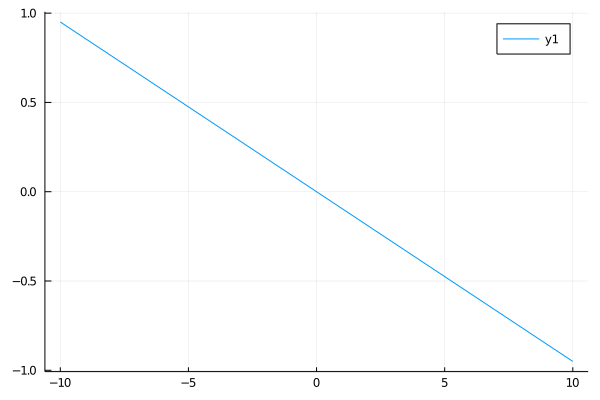

In [68]:
x = -10:0.1:10
plot(x, atan.(-x*mass*k₀)/pi*180)

In [27]:
function symlog(x)
    sign(x)*log10(sign(x)*x)
end

symlog (generic function with 1 method)

### Test

In [ ]:
int 0 inf dr r^2 j0(kr)V(x)j0(k'r)
int 0 inf inf dkdk' sin(kr)/kr

In [13]:
using HCubature

In [7]:
mass = 2*(mₙ*mₚ)/(mₙ+mₚ) /197  

4.768621711440031

In [245]:
function makefoo(r::Real)
    V = regularize(NLO(-0.54, 0.06) + Pion(0), 0.7)
    j0(k) = sin(k*r)/(k*r)
    function foo(x)
        k, k′ = x
        j0(k)*V(k, k′)*j0(k′)
    end
    foo
end

makefoo (generic function with 2 methods)

In [246]:
r = 1e-2:0.05:15
V = Float64[]
error = Float64[]
for r_ in r |> tqdm
    I, E = hcubature(makefoo(r_), [0, 0], [50, 50], maxevals=1000)
    push!(V, I)
    push!(error, E)
end

100.0%┣██████████████████████████████████████┫ 300/300 [00:01<00:00, 597.6 it/s]


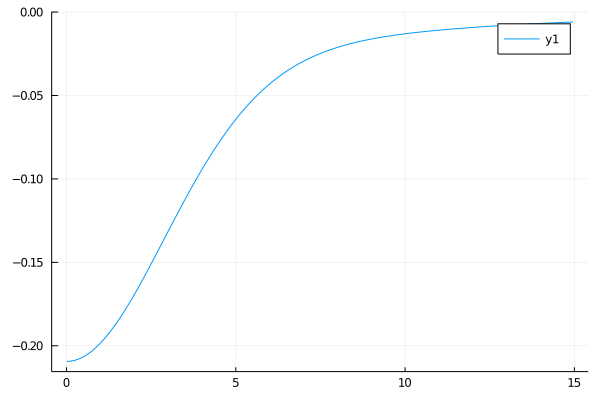

In [247]:
plot(r, V)#, ylim=(-1, 1))

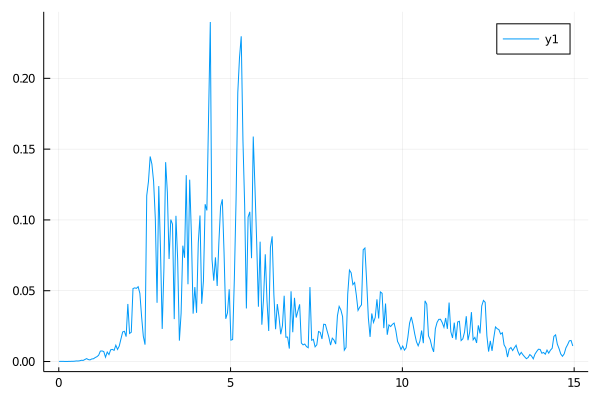

In [233]:
plot(r, error)

In [25]:
?hcubature

search: hcubature HCubature



```
hcubature(f, a, b; norm=norm, rtol=sqrt(eps), atol=0, maxevals=typemax(Int), initdiv=1)
```

Compute the n-dimensional integral of f(x), where `n == length(a) == length(b)`, over the hypercube whose corners are given by the vectors (or tuples) `a` and `b`. That is, dimension `x[i]` is integrated from `a[i]` to `b[i]`.  The return value of `hcubature` is a tuple `(I, E)` of the estimated integral `I` and an estimated error `E`.

`f` should be a function `f(x)` that takes an n-dimensional vector `x` and returns the integrand at `x`.   The integrand can be any type that supports `+`, `-`, `*` real, and `norm` functions.  For example, the integrand can be real or complex numbers, vectors, matrices, etcetera.

The integrand `f(x)` will be always be passed an `SVector{n,T}`, where `SVector` is an efficient vector type defined in the `StaticArrays` package and `T` is a floating-point type determined by promoting the endpoint `a` and `b` coordinates to a floating-point type. (Your integrand `f` should be type-stable: it should always return a value of the same type, given this type of `x`.)

The integrand will never be evaluated exactly at the boundaries of the integration volume.  (So, for example, it is possible to have an integrand that blows up at the boundaries, as long as the integral is finite, though such singularities will slow convergence.)

The integration volume is adaptively subdivided, using a cubature rule due to Genz and Malik (1980), until the estimated error `E` satisfies `E ≤ max(rtol*norm(I), atol)`, i.e. `rtol` and `atol` are the relative and absolute tolerances requested, respectively. It also stops if the number of `f` evaluations exceeds `maxevals`. If neither `atol` nor `rtol` are specified, the default `rtol` is the square root of the precision `eps(T)` of the coordinate type `T` described above. Initially, the volume is divided into `initdiv` segments along each dimension.

The error is estimated by `norm(I - I′)`, where `I′` is an alternative estimated integral (via an "embedded" lower-order cubature rule.) By default, the norm function used (for both this and the convergence test above) is `norm`, but you can pass an alternative norm by the `norm` keyword argument.  (This is especially useful when `f` returns a vector of integrands with different scalings.)
